Data Processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import zipfile
import os

In [2]:

zip_path = "PAPILA.zip"   # dataset zip file
extract_dir = "papila_dataset"    # folder to extract

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Dataset extracted to:", extract_dir)


KeyboardInterrupt: 

In [2]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load right (OD) and left (OS) eye data
od_df = pd.read_excel("papila_dataset/PapilaDB-PAPILA-17f8fa7746adb20275b5b6a0d99dc9dfe3007e9f/ClinicalData/patient_data_od.xlsx")
os_df = pd.read_excel("papila_dataset/PapilaDB-PAPILA-17f8fa7746adb20275b5b6a0d99dc9dfe3007e9f/ClinicalData/patient_data_os.xlsx")

print("OD shape:", od_df.shape)
print("OS shape:", os_df.shape)



OD shape: (246, 13)
OS shape: (246, 13)


In [4]:
print(od_df.head())
print(os_df.head())

  Unnamed: 0  Age  Gender  Diagnosis Refractive_Defect Unnamed: 5  \
0        NaN  Age  Gender  Diagnosis         dioptre_1  dioptre_2   
1         ID  NaN     NaN        NaN               NaN        NaN   
2       #002   47       0          2              0.75      -1.75   
3       #004   58       1          1               1.5      -1.75   
4       #005   89       1          1             -0.75      -1.25   

    Unnamed: 6  Phakic/Pseudophakic        IOP Unnamed: 9  Pachymetry  \
0  astigmatism  Phakic/Pseudophakic  Pneumatic    Perkins  Pachymetry   
1          NaN                  NaN        NaN        NaN         NaN   
2           90                    0         21        NaN         586   
3           85                    0        NaN         19         501   
4          101                    1         13         14         565   

   Axial_Length  VF_MD  
0  Axial_Length  VF_MD  
1           NaN    NaN  
2         23.64  -0.07  
3         23.06  -3.26  
4         23.81 -14.9

In [5]:
print("OD columns:", od_df.columns)
print("OS columns:", os_df.columns)

OD columns: Index(['Unnamed: 0', 'Age', 'Gender', 'Diagnosis', 'Refractive_Defect',
       'Unnamed: 5', 'Unnamed: 6', 'Phakic/Pseudophakic', 'IOP', 'Unnamed: 9',
       'Pachymetry', 'Axial_Length', 'VF_MD'],
      dtype='object')
OS columns: Index(['Unnamed: 0', 'Age', 'Gender', 'Diagnosis', 'Refractive_Defect',
       'Unnamed: 5', 'Unnamed: 6', 'Phakic/Pseudophakic', 'IOP', 'Unnamed: 9',
       'Pachymetry', 'Axial_Length', 'VF_MD'],
      dtype='object')


In [6]:
    
# Load OD (right eye), skip first 2 rows
od_df = pd.read_excel(
    "papila_dataset/PapilaDB-PAPILA-17f8fa7746adb20275b5b6a0d99dc9dfe3007e9f/ClinicalData/patient_data_od.xlsx", 
    skiprows=[0,2], engine="openpyxl"
)

# Load OS (left eye), skip first 2 rows
os_df = pd.read_excel(
    "papila_dataset/PapilaDB-PAPILA-17f8fa7746adb20275b5b6a0d99dc9dfe3007e9f/ClinicalData/patient_data_os.xlsx", 
    skiprows=[0,2], engine="openpyxl"
)

print("OD cleaned shape:", od_df.shape)
print("OS cleaned shape:", os_df.shape)
print(od_df.head())


OD cleaned shape: (244, 13)
OS cleaned shape: (244, 13)
  Unnamed: 0  Age  Gender  Diagnosis  dioptre_1  dioptre_2  astigmatism  \
0       #002   47       0          2       0.75      -1.75         90.0   
1       #004   58       1          1       1.50      -1.75         85.0   
2       #005   89       1          1      -0.75      -1.25        101.0   
3       #006   69       0          2       1.00      -1.50         95.0   
4       #007   22       1          2      -0.25       0.00          0.0   

   Phakic/Pseudophakic  Pneumatic  Perkins  Pachymetry  Axial_Length  VF_MD  
0                  0.0       21.0      NaN       586.0         23.64  -0.07  
1                  0.0        NaN     19.0       501.0         23.06  -3.26  
2                  1.0       13.0     14.0       565.0         23.81 -14.98  
3                  0.0       22.0      NaN       612.0         26.25  -2.07  
4                  0.0       14.0      NaN         NaN         23.39  -2.30  


In [7]:
# Rename Unnamed: 0 to Patient_ID
od_df.rename(columns={"Unnamed: 0": "Patient_ID"}, inplace=True)
os_df.rename(columns={"Unnamed: 0": "Patient_ID"}, inplace=True)

print("Right eye data (OD):")
print(od_df.head())
print ("Left eye data (OS):")
print(os_df.head())

Right eye data (OD):
  Patient_ID  Age  Gender  Diagnosis  dioptre_1  dioptre_2  astigmatism  \
0       #002   47       0          2       0.75      -1.75         90.0   
1       #004   58       1          1       1.50      -1.75         85.0   
2       #005   89       1          1      -0.75      -1.25        101.0   
3       #006   69       0          2       1.00      -1.50         95.0   
4       #007   22       1          2      -0.25       0.00          0.0   

   Phakic/Pseudophakic  Pneumatic  Perkins  Pachymetry  Axial_Length  VF_MD  
0                  0.0       21.0      NaN       586.0         23.64  -0.07  
1                  0.0        NaN     19.0       501.0         23.06  -3.26  
2                  1.0       13.0     14.0       565.0         23.81 -14.98  
3                  0.0       22.0      NaN       612.0         26.25  -2.07  
4                  0.0       14.0      NaN         NaN         23.39  -2.30  
Left eye data (OS):
  Patient_ID  Age  Gender  Diagnosis  di

In [8]:
od_df["Eye_Label"] = "OD"
os_df["Eye_Label"] = "OS"

clinical_df = pd.concat([od_df, os_df], axis=0).reset_index(drop=True)
print("Combined clinical data shape:", clinical_df.shape)
print(clinical_df.head())




Combined clinical data shape: (488, 14)
  Patient_ID  Age  Gender  Diagnosis  dioptre_1  dioptre_2  astigmatism  \
0       #002   47       0          2       0.75      -1.75         90.0   
1       #004   58       1          1       1.50      -1.75         85.0   
2       #005   89       1          1      -0.75      -1.25        101.0   
3       #006   69       0          2       1.00      -1.50         95.0   
4       #007   22       1          2      -0.25       0.00          0.0   

   Phakic/Pseudophakic  Pneumatic  Perkins  Pachymetry  Axial_Length  VF_MD  \
0                  0.0       21.0      NaN       586.0         23.64  -0.07   
1                  0.0        NaN     19.0       501.0         23.06  -3.26   
2                  1.0       13.0     14.0       565.0         23.81 -14.98   
3                  0.0       22.0      NaN       612.0         26.25  -2.07   
4                  0.0       14.0      NaN         NaN         23.39  -2.30   

  Eye_Label  
0        OD  
1     

In [9]:
# Drop the duplicate eye column
clinical_df = clinical_df.drop(columns=["Eye Label"], errors="ignore")

print("Final shape:", clinical_df.shape)
print(clinical_df.head())

Final shape: (488, 14)
  Patient_ID  Age  Gender  Diagnosis  dioptre_1  dioptre_2  astigmatism  \
0       #002   47       0          2       0.75      -1.75         90.0   
1       #004   58       1          1       1.50      -1.75         85.0   
2       #005   89       1          1      -0.75      -1.25        101.0   
3       #006   69       0          2       1.00      -1.50         95.0   
4       #007   22       1          2      -0.25       0.00          0.0   

   Phakic/Pseudophakic  Pneumatic  Perkins  Pachymetry  Axial_Length  VF_MD  \
0                  0.0       21.0      NaN       586.0         23.64  -0.07   
1                  0.0        NaN     19.0       501.0         23.06  -3.26   
2                  1.0       13.0     14.0       565.0         23.81 -14.98   
3                  0.0       22.0      NaN       612.0         26.25  -2.07   
4                  0.0       14.0      NaN         NaN         23.39  -2.30   

  Eye_Label  
0        OD  
1        OD  
2        

In [10]:
# Drop the duplicate eye column
clinical_df = clinical_df.drop(columns=["Eye"], errors="ignore")

print("Final shape:", clinical_df.shape)
print(clinical_df.head())

Final shape: (488, 14)
  Patient_ID  Age  Gender  Diagnosis  dioptre_1  dioptre_2  astigmatism  \
0       #002   47       0          2       0.75      -1.75         90.0   
1       #004   58       1          1       1.50      -1.75         85.0   
2       #005   89       1          1      -0.75      -1.25        101.0   
3       #006   69       0          2       1.00      -1.50         95.0   
4       #007   22       1          2      -0.25       0.00          0.0   

   Phakic/Pseudophakic  Pneumatic  Perkins  Pachymetry  Axial_Length  VF_MD  \
0                  0.0       21.0      NaN       586.0         23.64  -0.07   
1                  0.0        NaN     19.0       501.0         23.06  -3.26   
2                  1.0       13.0     14.0       565.0         23.81 -14.98   
3                  0.0       22.0      NaN       612.0         26.25  -2.07   
4                  0.0       14.0      NaN         NaN         23.39  -2.30   

  Eye_Label  
0        OD  
1        OD  
2        

In [11]:
print(clinical_df.head())

  Patient_ID  Age  Gender  Diagnosis  dioptre_1  dioptre_2  astigmatism  \
0       #002   47       0          2       0.75      -1.75         90.0   
1       #004   58       1          1       1.50      -1.75         85.0   
2       #005   89       1          1      -0.75      -1.25        101.0   
3       #006   69       0          2       1.00      -1.50         95.0   
4       #007   22       1          2      -0.25       0.00          0.0   

   Phakic/Pseudophakic  Pneumatic  Perkins  Pachymetry  Axial_Length  VF_MD  \
0                  0.0       21.0      NaN       586.0         23.64  -0.07   
1                  0.0        NaN     19.0       501.0         23.06  -3.26   
2                  1.0       13.0     14.0       565.0         23.81 -14.98   
3                  0.0       22.0      NaN       612.0         26.25  -2.07   
4                  0.0       14.0      NaN         NaN         23.39  -2.30   

  Eye_Label  
0        OD  
1        OD  
2        OD  
3        OD  
4   

In [12]:
print (clinical_df.columns)

Index(['Patient_ID', 'Age', 'Gender', 'Diagnosis', 'dioptre_1', 'dioptre_2',
       'astigmatism', 'Phakic/Pseudophakic', 'Pneumatic', 'Perkins',
       'Pachymetry', 'Axial_Length', 'VF_MD', 'Eye_Label'],
      dtype='object')


In [13]:
import glob, os

# Get all images
image_paths = glob.glob("papila_dataset/PapilaDB-PAPILA-17f8fa7746adb20275b5b6a0d99dc9dfe3007e9f/FundusImages/*.jpg")

# Make dataframe of images
image_df = pd.DataFrame({
    "Patient_ID": [os.path.basename(p)[3:6] for p in image_paths],  
    "Eye_Label": [os.path.basename(p)[6:8] for p in image_paths],          
    "Image_Path": image_paths
})

# Merge with clinical data
multimodal_df = pd.merge(clinical_df, image_df, on=["Patient_ID","Eye_Label"], how="inner")

print("Final multimodal dataset shape:", multimodal_df.shape)



Final multimodal dataset shape: (0, 15)


In [14]:
print(image_df.head())

  Patient_ID Eye_Label                                         Image_Path
0        210        OD  papila_dataset/PapilaDB-PAPILA-17f8fa7746adb20...
1        002        OS  papila_dataset/PapilaDB-PAPILA-17f8fa7746adb20...
2        266        OS  papila_dataset/PapilaDB-PAPILA-17f8fa7746adb20...
3        051        OS  papila_dataset/PapilaDB-PAPILA-17f8fa7746adb20...
4        179        OD  papila_dataset/PapilaDB-PAPILA-17f8fa7746adb20...


In [15]:
clinical_df["Patient_ID"] = clinical_df["Patient_ID"].str.replace("#", "")


In [16]:
multimodal_df = pd.merge(clinical_df, image_df, on=["Patient_ID","Eye_Label"], how="inner")
print(multimodal_df.head(10))


  Patient_ID  Age  Gender  Diagnosis  dioptre_1  dioptre_2  astigmatism  \
0        002   47       0          2       0.75      -1.75         90.0   
1        004   58       1          1       1.50      -1.75         85.0   
2        005   89       1          1      -0.75      -1.25        101.0   
3        006   69       0          2       1.00      -1.50         95.0   
4        007   22       1          2      -0.25       0.00          0.0   
5        008   67       1          2        NaN      -0.75         20.0   
6        009   79       0          2       0.75      -1.50         95.0   
7        010   72       1          1       2.25      -1.50        105.0   
8        013   70       1          1       3.00      -1.00         65.0   
9        014   60       1          1       0.25      -0.50        155.0   

   Phakic/Pseudophakic  Pneumatic  Perkins  Pachymetry  Axial_Length  VF_MD  \
0                  0.0       21.0      NaN       586.0         23.64  -0.07   
1               

In [17]:
missing_percent = multimodal_df.isna().mean() * 100
print(missing_percent.sort_values(ascending=False))


Perkins                73.770492
VF_MD                  66.393443
Pneumatic              18.852459
dioptre_1               5.327869
Pachymetry              2.868852
Phakic/Pseudophakic     2.049180
Axial_Length            1.844262
astigmatism             1.639344
dioptre_2               1.639344
Age                     0.000000
Gender                  0.000000
Diagnosis               0.000000
Patient_ID              0.000000
Eye_Label               0.000000
Image_Path              0.000000
dtype: float64


In [18]:
# Drop high-missing features
multimodal_df= multimodal_df.drop(columns=["Perkins", "VF_MD"])

# Fill missing values in the rest
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")  
cols_to_impute = ["Pneumatic", "dioptre_1", "dioptre_2", 
                  "astigmatism", "Pachymetry", "Phakic/Pseudophakic", "Axial_Length"]

multimodal_df[cols_to_impute] = imputer.fit_transform(multimodal_df[cols_to_impute])

print("Cleaned dataset shape:", multimodal_df.shape)
print(multimodal_df.head(600))


Cleaned dataset shape: (488, 13)
    Patient_ID  Age  Gender  Diagnosis  dioptre_1  dioptre_2  astigmatism  \
0          002   47       0          2       0.75      -1.75         90.0   
1          004   58       1          1       1.50      -1.75         85.0   
2          005   89       1          1      -0.75      -1.25        101.0   
3          006   69       0          2       1.00      -1.50         95.0   
4          007   22       1          2      -0.25       0.00          0.0   
..         ...  ...     ...        ...        ...        ...          ...   
483        289   64       0          0       0.75      -1.50         93.0   
484        290   75       1          0       0.25      -0.25        160.0   
485        291   55       0          0       1.50      -1.25         76.0   
486        292   56       1          0       1.25      -0.75         79.0   
487        293   39       1          0      -0.75      -0.25        110.0   

     Phakic/Pseudophakic  Pneumatic  Pachy

In [19]:
print(multimodal_df["Diagnosis"].value_counts())


Diagnosis
0    333
1     87
2     68
Name: count, dtype: int64


In [21]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [20]:
missing_percent = multimodal_df.isna().mean() * 100
print(missing_percent.sort_values(ascending=False))


Patient_ID             0.0
Age                    0.0
Gender                 0.0
Diagnosis              0.0
dioptre_1              0.0
dioptre_2              0.0
astigmatism            0.0
Phakic/Pseudophakic    0.0
Pneumatic              0.0
Pachymetry             0.0
Axial_Length           0.0
Eye_Label              0.0
Image_Path             0.0
dtype: float64


In [21]:
multimodal_df.head()

Patient_ID  Age  Gender  Diagnosis  dioptre_1  dioptre_2  astigmatism  \
0        002   47       0          2       0.75      -1.75         90.0   
1        004   58       1          1       1.50      -1.75         85.0   
2        005   89       1          1      -0.75      -1.25        101.0   
3        006   69       0          2       1.00      -1.50         95.0   
4        007   22       1          2      -0.25       0.00          0.0   

   Phakic/Pseudophakic  Pneumatic  Pachymetry  Axial_Length Eye_Label  \
0                  0.0       21.0       586.0         23.64        OD   
1                  0.0       16.0       501.0         23.06        OD   
2                  1.0       13.0       565.0         23.81        OD   
3                  0.0       22.0       612.0         26.25        OD   
4                  0.0       14.0       535.0         23.39        OD   

                                          Image_Path  
0  papila_dataset/PapilaDB-PAPILA-17f8fa7746adb20...  
1  papila_dataset/PapilaDB-PAPILA-17f8fa7746adb20...  
2  papila_dataset/PapilaDB-PAPILA-17f8fa7746adb20...  
3  papila_dataset/PapilaDB-PAPILA-17f8fa7746adb20...  
4  papila_dataset/PapilaDB-PAPILA-17f8fa7746adb20...

In [22]:
multimodal_df.shape

(488, 13)

In [23]:
# Map 1 and 2 to 1 (glaucoma), 0 stays 0 (healthy)
multimodal_df["Diagnosis"] = multimodal_df["Diagnosis"].map({
    0: 0,   # healthy
    1: 1,   # suspect → glaucoma
    2: 1    # glaucoma
})


In [24]:
print(multimodal_df["Diagnosis"].value_counts())


Diagnosis
0    333
1    155
Name: count, dtype: int64


In [25]:
import os
os.makedirs("data", exist_ok=True)

output_path = "data/multimodal_data.csv"
multimodal_df.to_csv(output_path, index=False)

In [28]:
# multimodal_df["Diagnosis"] = multimodal_df["Diagnosis"].map({1: 0, 2: 1})


Dataset Preparation for Training

In [29]:
# from sklearn.model_selection import train_test_split

# # First: 70% train, 30% temp
# train_df, temp_df = train_test_split(
#     multimodal_df,
#     test_size=0.3,
#     stratify=multimodal_df["Diagnosis"],  
#     random_state=42
# )

# # Then: split temp (30%) into 20% val and 10% test
# val_df, test_df = train_test_split(
#     temp_df,
#     test_size=0.33,  # 0.33 * 0.3 ≈ 0.10 of total
#     stratify=temp_df["Diagnosis"],
#     random_state=42
# )

# print("Train:", len(train_df), " Val:", len(val_df), " Test:", len(test_df))


Diffusion Model

In [30]:
# train_df.iloc[-1, -1]


Create a PyTorch Dataset class

Dataset class for training DDPM

In [31]:
pip install diffusers[torch]


Note: you may need to restart the kernel to use updated packages.


In [32]:
# from diffusers import DDPMPipeline
# import os

# # Create output folder
# os.makedirs("synthetic_fundus", exist_ok=True)

# # Switch to evaluation mode
# model.eval()

# # Create pipeline from trained model
# pipeline = DDPMPipeline(unet=model, scheduler=noise_scheduler).to(device)

# # Number of images to generate
# num_images = 10

# # Sampling loop
# for i in range(num_images):
#     with torch.no_grad():
#         output = pipeline(num_inference_steps=1000) 
#         image = output.images[0]
#         image.save(f"synthetic_fundus/gen_{i}.png")

# print(f"{num_images} synthetic fundus images saved in /synthetic_fundus/")


In [26]:
import torch
torch.cuda.empty_cache()


In [27]:
print(torch.cuda.is_available())

True


In [35]:
# # --- Imports ---
# import os
# import torch
# import numpy as np
# import cv2
# from PIL import Image
# from torch.utils.data import Dataset, DataLoader
# import torch.nn.functional as F
# import torchvision.transforms as T
# from torchvision.utils import save_image
# from diffusers import UNet2DModel, DDPMScheduler
# from torch.cuda.amp import GradScaler, autocast
# from skimage.exposure import match_histograms

# # ========== 0) Reproducibility ==========
# def set_seed(seed=42):
#     torch.manual_seed(seed)
#     np.random.seed(seed)
#     if torch.cuda.is_available():
#         torch.cuda.manual_seed_all(seed)
# set_seed(42)

# # ========== 1) Color normalize (histogram matching) ==========
# def color_normalize(pil_img, ref_img):
#     img = np.array(pil_img)
#     ref = np.array(ref_img)
#     matched = match_histograms(img, ref, channel_axis=-1)
#     return Image.fromarray(matched.astype(np.uint8))

# # ========== 2) CLAHE (mild) ==========
# def apply_clahe(pil_img, clip=1.5, grid=8):
#     img_cv = np.array(pil_img)
#     lab = cv2.cvtColor(img_cv, cv2.COLOR_RGB2LAB)
#     l, a, b = cv2.split(lab)
#     clahe = cv2.createCLAHE(clipLimit=clip, tileGridSize=(grid, grid))
#     cl = clahe.apply(l)
#     merged = cv2.merge((cl, a, b))
#     enhanced_img = cv2.cvtColor(merged, cv2.COLOR_LAB2RGB)
#     return Image.fromarray(enhanced_img)

# # ========== 3) Dataset ==========
# class PapilaDataset(Dataset):
#     def __init__(self, dataframe, transform=None,
#                  use_clahe=True, use_hist_match=True, ref_img=None):
#         self.df = dataframe.reset_index(drop=True)
#         self.transform = transform
#         self.use_clahe = use_clahe
#         self.use_hist_match = use_hist_match
#         self.ref_img = ref_img

#     def __len__(self):
#         return len(self.df)

#     def __getitem__(self, idx):
#         row = self.df.iloc[idx]
#         img = Image.open(row["Image_Path"]).convert("RGB")

#         if self.use_clahe:
#             img = apply_clahe(img, clip=1.5, grid=8)

#         if self.use_hist_match and self.ref_img is not None:
#             img = color_normalize(img, self.ref_img)

#         if self.transform:
#             img = self.transform(img)
#         return img

# # ========== 4) Transforms ==========
# transform = T.Compose([
#     T.Resize(160),
#     T.CenterCrop(128),
#     T.ToTensor(),
#     T.Normalize([0.5]*3, [0.5]*3)
# ])

# # ========== 5) Data ==========
# REFERENCE_PATH = "papila_dataset/PapilaDB-PAPILA-17f8fa7746adb20275b5b6a0d99dc9dfe3007e9f/FundusImages/RET033OS.jpg"
# assert os.path.exists(REFERENCE_PATH), "Set REFERENCE_PATH to a valid fundus image!"
# ref_img = Image.open(REFERENCE_PATH).convert("RGB")

# train_dataset = PapilaDataset(
#     train_df,
#     transform=transform,
#     use_clahe=True,
#     use_hist_match=True,
#     ref_img=ref_img
# )
# train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=0)

# # ========== 6) Model ==========
# model = UNet2DModel(
#     sample_size=128, in_channels=3, out_channels=3,
#     layers_per_block=2,
#     block_out_channels=(64, 128, 128),
#     down_block_types=("DownBlock2D", "AttnDownBlock2D", "DownBlock2D"),
#     up_block_types=("UpBlock2D", "AttnUpBlock2D", "UpBlock2D"),
# )
# model.gradient_checkpointing = True

# # ========== 7) EMA ==========
# class EMA:
#     def __init__(self, model, decay=0.999, device="cpu"):
#         self.decay = decay
#         self.device = device
#         self.shadow = {k: v.detach().clone().to(device)
#                        for k, v in model.state_dict().items()}

#     @torch.no_grad()
#     def update(self, model):
#         for k, v in model.state_dict().items():
#             self.shadow[k] = self.shadow[k].to(v.device)
#             self.shadow[k].mul_(self.decay).add_(v.detach(), alpha=1.0 - self.decay)

#     @torch.no_grad()
#     def copy_to(self, model):
#         model.load_state_dict(self.shadow, strict=True)




# # ========== 8) Setup ==========
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# noise_scheduler = DDPMScheduler(
#     num_train_timesteps=1000,
#     beta_schedule="squaredcos_cap_v2",
#     prediction_type="epsilon"
# )

# optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
# scaler = GradScaler()

# os.makedirs("checkpoints", exist_ok=True)
# os.makedirs("samples", exist_ok=True)

# def unnormalize(x):
#     return (x * 0.5 + 0.5).clamp(0, 1)

# # ========== 9) Sampling ==========
# @torch.no_grad()
# def sample_grid(cur_model, epoch, num=9, use_ema=True):
#     cur_model.eval()
#     tmp = UNet2DModel(**cur_model.config)
#     tmp.load_state_dict(cur_model.state_dict(), strict=True)
#     tmp.to(device)

#     if use_ema:
#         ema.copy_to(tmp)

#     img = torch.randn((num, 3, 128, 128), device=device)
#     for t in reversed(range(noise_scheduler.num_train_timesteps)):
#         t_batch = torch.full((num,), t, device=device, dtype=torch.long)
#         with autocast():
#             eps = tmp(img, t_batch).sample
#         img = noise_scheduler.step(eps, t, img).prev_sample

#     img = unnormalize(img)
#     save_image(img, f"samples/gen_epoch{epoch}.png", nrow=3)
#     print(f"Saved: samples/gen_epoch{epoch}.png")

# # ========== 10) Training ==========
# def train_diffusion(cur_model, loader, epochs=180, sample_every=10):
#     cur_model.train()
#     global_step = 0

#     for epoch in range(1, epochs+1):
#         for batch in loader:
#             clean = batch.to(device, non_blocking=True)

#             noise = torch.randn_like(clean)
#             t = torch.randint(0, noise_scheduler.config.num_train_timesteps,
#                               (clean.size(0),), device=device).long()
#             noisy = noise_scheduler.add_noise(clean, noise, t)

#             with autocast():
#                 pred = cur_model(noisy, t).sample
#                 loss = F.mse_loss(pred, noise)

#             optimizer.zero_grad(set_to_none=True)
#             scaler.scale(loss).backward()
#             torch.nn.utils.clip_grad_norm_(cur_model.parameters(), 1.0)
#             scaler.step(optimizer)
#             scaler.update()

#             ema.update(cur_model)
#             global_step += 1

#         print(f"Epoch {epoch}/{epochs}  |  loss: {loss.item():.4f}")

#         # save both normal and EMA weights
#         torch.save(cur_model.state_dict(), f"checkpoints/ddpm_epoch{epoch}.pt")
#         torch.save(ema.shadow, f"checkpoints/ddpm_epoch{epoch}_ema.pt")

#         if epoch % sample_every == 0:
#             sample_grid(cur_model, epoch, num=9, use_ema=True)

# # ========== 11) Run ==========
# if __name__ == "__main__":
#     train_diffusion(model, train_loader, epochs=180, sample_every=10)


In [36]:
# # --- Sampling (Reverse Diffusion) ---
# os.makedirs("synthetic_fundus", exist_ok=True)
# model.eval()

# pipeline = DDPMPipeline(unet=model, scheduler=noise_scheduler).to(device)

# num_images = 10
# for i in range(num_images):
#     with torch.no_grad():
#         output = pipeline(num_inference_steps=250)
#         image = output.images[0]
#         image.save(f"synthetic_fundus/gen_{i}.png")

# print(f"{num_images} synthetic fundus images saved in /synthetic_fundus/")


In [37]:
from PIL import Image
Image.open(multimodal_df.iloc[0]["Image_Path"]).show()


In [38]:
pip install transformers accelerate safetensors


Opening in existing browser session.
Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install transformers accelerate safetensors


Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install diffusers==0.24.0 transformers accelerate safetensors


Note: you may need to restart the kernel to use updated packages.


In [41]:
import sys
print(sys.executable)

/home/s25afsha/venvs/linuxlab/bin/python


In [42]:
# !unzip sample.zip -d glaucoma_imgs


In [43]:
multimodal_df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Diagnosis', 'dioptre_1', 'dioptre_2',
       'astigmatism', 'Phakic/Pseudophakic', 'Pneumatic', 'Pachymetry',
       'Axial_Length', 'Eye_Label', 'Image_Path'],
      dtype='object')

In [44]:
# import os
# import cv2
# import numpy as np
# from PIL import Image
# import torchvision.transforms as T
# from tqdm import tqdm
# import pandas as pd

# # =========================
# # INPUT: PAPILA glaucoma paths
# # =========================
# glaucoma_df = multimodal_df[multimodal_df["Diagnosis"] == 1].copy()
# input_paths = glaucoma_df["Image_Path"].tolist()

# # =========================
# # OUTPUT FOLDER
# # =========================
# out_dir = "augmented_glaucoma"
# os.makedirs(out_dir, exist_ok=True)

# # =========================
# # AUGMENTATION PIPELINE
# # =========================
# augment = T.Compose([
#     T.RandomRotation(40),
#     T.RandomHorizontalFlip(),
#     T.RandomVerticalFlip(),
#     # T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.05),
#     T.RandomResizedCrop(256, scale=(0.85, 1.0)),
#     # T.GaussianBlur(kernel_size=7, sigma=(0.2, 2.0)),
#     T.ToTensor()
# ])

# NUM_AUG = 8  # number of augmented images per original

# count = 0
# for path in tqdm(input_paths):
#     img = Image.open(path).convert("RGB")

#     for i in range(NUM_AUG):
#         out = augment(img)
#         out = T.functional.to_pil_image(out)

#         save_path = os.path.join(out_dir, f"aug_{count}.png")
#         out.save(save_path)
#         count += 1

# print("Generated augmented images:", count)

# # save dataframe for diffusion model
# pd.DataFrame({"Image_Path": sorted(os.listdir(out_dir))}).to_csv(
#     "augmented_glaucoma_list.csv", index=False
# )


In [45]:
# # ============================================================
# # PART A — CREATE CLEAN, CROPPED, AUGMENTED GLAUCOMA IMAGES
# # ============================================================
# import os
# import math
# import random
# import cv2
# import numpy as np
# from PIL import Image

# import torch
# import torchvision.transforms as T
# from tqdm import tqdm
# import pandas as pd

# # ------------ CONFIG ------------
# IMG_SIZE = 128
# NUM_AUG = 8          # how many augmented images per original
# SEED = 42

# torch.manual_seed(SEED)
# np.random.seed(SEED)
# random.seed(SEED)

# OUT_DIR = "augmented_glaucoma"
# os.makedirs(OUT_DIR, exist_ok=True)

# # --------- 1. FUNDUS CROP (on ORIGINAL PAPILA IMAGES) ---------
# def crop_fundus(pil_img):
#     """
#     High-quality fundus extractor:
#     - Convert to HSV
#     - Mask using saturation channel (fundus is high saturation)
#     - Find largest connected component
#     - Crop tight circle
#     - Pad → square → resize
#     """

#     img = np.array(pil_img)
#     h, w = img.shape[:2]

#     # HSV gives best contrast for retina vs background
#     hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#     H, S, V = cv2.split(hsv)

#     # fundus is strongly saturated ⇒ threshold on S channel
#     _, mask = cv2.threshold(S, 30, 255, cv2.THRESH_BINARY)

#     # Morph closing to fill gaps
#     mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((25,25), np.uint8))

#     # Find connected components
#     cnts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     if len(cnts) == 0:
#         # fallback: center crop 80%
#         side = int(min(h, w) * 0.8)
#         x1 = (w - side)//2
#         y1 = (h - side)//2
#         crop = img[y1:y1+side, x1:x1+side]
#         crop = cv2.resize(crop, (IMG_SIZE, IMG_SIZE))
#         return Image.fromarray(crop)

#     # largest saturated region = fundus
#     cnt = max(cnts, key=cv2.contourArea)
#     (cx, cy), r = cv2.minEnclosingCircle(cnt)
#     cx, cy, r = int(cx), int(cy), int(r)

#     # crop square around circle
#     x1 = max(cx - r, 0)
#     y1 = max(cy - r, 0)
#     x2 = min(cx + r, w)
#     y2 = min(cy + r, h)
#     crop = img[y1:y2, x1:x2]

#     # pad to square
#     hh, ww = crop.shape[:2]
#     side = max(hh, ww)
#     sq = np.zeros((side, side, 3), dtype=img.dtype)
#     sq[(side-hh)//2:(side-hh)//2+hh,
#        (side-ww)//2:(side-ww)//2+ww] = crop

#     sq = cv2.resize(sq, (IMG_SIZE, IMG_SIZE))
#     return Image.fromarray(sq)


# # --------- 2. GET PAPILA GLAUCOMA PATHS ---------
# # multimodal_df must already exist in your notebook
# glaucoma_df = multimodal_df[multimodal_df["Diagnosis"] == 1].copy()
# input_paths = glaucoma_df["Image_Path"].tolist()
# print("Original glaucoma images:", len(input_paths))

# # --------- 3. AUGMENTATION PIPELINE (LIGHT) ---------
# augment = T.Compose([
#     T.Resize((IMG_SIZE, IMG_SIZE)),
#     T.RandomHorizontalFlip(),
#     T.RandomVerticalFlip(),
#     T.RandomRotation(35),
#     T.ToTensor()
# ])

# saved_paths = []
# count = 0

# for path in tqdm(input_paths, desc="Augmenting"):
#     img = Image.open(path).convert("RGB")

#     # crop fundus once at the beginning
#     img = crop_fundus(img)

#     for i in range(NUM_AUG):
#         out = augment(img)
#         out = T.functional.to_pil_image(out)

#         save_path = os.path.join(OUT_DIR, f"aug_{count}.png")
#         out.save(save_path)
#         saved_paths.append(save_path)
#         count += 1

# print("Total augmented images saved:", count)

# pd.DataFrame({"Image_Path": saved_paths}).to_csv(
#     "augmented_glaucoma_list.csv", index=False
# )
# print("Saved augmented_glaucoma_list.csv")

# # ============================================================
# # PART B — TRAIN DDPM ON augmented_glaucoma
# # ============================================================
# import torch.nn as nn
# import torch.nn.functional as F
# from torch.utils.data import Dataset, DataLoader, random_split
# import torchvision.transforms as T
# from torchvision.utils import save_image

# # ------------ TRAINING CONFIG ------------
# DATA_CSV      = "augmented_glaucoma_list.csv"
# IMG_SIZE      = 128
# BATCH_SIZE    = 8
# EPOCHS        = 800
# LR            = 2e-4
# NUM_STEPS     = 1000
# PREVIEW_EVERY = 20
# VAL_SPLIT     = 0.1
# TEST_SPLIT    = 0.1
# SEED          = 42

# torch.manual_seed(SEED)
# np.random.seed(SEED)
# random.seed(SEED)

# os.makedirs("samples_final", exist_ok=True)
# os.makedirs("checkpoints_final", exist_ok=True)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print("Using device:", device)

# # --------- 1. LOAD AUGMENTED PATHS ---------
# df_aug = pd.read_csv(DATA_CSV)
# all_paths = df_aug["Image_Path"].tolist()
# print("Total augmented images for diffusion:", len(all_paths))

# # --------- 2. DATASET & SPLITS ---------
# class FundusDataset(Dataset):
#     def __init__(self, paths, transform=None):
#         self.paths = paths
#         self.transform = transform

#     def __len__(self):
#         return len(self.paths)

#     def __getitem__(self, idx):
#         img = Image.open(self.paths[idx]).convert("RGB")
#         if self.transform:
#             img = self.transform(img)
#         return img

# base_transform = T.Compose([
#     T.Resize((IMG_SIZE, IMG_SIZE)),
#     T.ToTensor(),
#     T.Normalize([0.5]*3, [0.5]*3)  # [-1,1]
# ])

# n_total = len(all_paths)
# n_val  = int(n_total * VAL_SPLIT)
# n_test = int(n_total * TEST_SPLIT)
# n_train = n_total - n_val - n_test

# indices = list(range(n_total))
# random.shuffle(indices)
# train_idx = indices[:n_train]
# val_idx   = indices[n_train:n_train+n_val]
# test_idx  = indices[n_train+n_val:]

# train_paths = [all_paths[i] for i in train_idx]
# val_paths   = [all_paths[i] for i in val_idx]
# test_paths  = [all_paths[i] for i in test_idx]

# print(f"Train: {len(train_paths)} | Val: {len(val_paths)} | Test: {len(test_paths)}")

# train_dataset = FundusDataset(train_paths, transform=base_transform)
# val_dataset   = FundusDataset(val_paths,   transform=base_transform)
# test_dataset  = FundusDataset(test_paths,  transform=base_transform)

# train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE,
#                           shuffle=True, drop_last=True)
# val_loader   = DataLoader(val_dataset,   batch_size=BATCH_SIZE,
#                           shuffle=False, drop_last=False)
# test_loader  = DataLoader(test_dataset,  batch_size=BATCH_SIZE,
#                           shuffle=False, drop_last=False)

# # quick sanity check
# imgs_debug = next(iter(train_loader))
# save_image((imgs_debug * 0.5 + 0.5).clamp(0,1),
#            "samples_final/_debug_training_batch.png", nrow=4)
# print("Saved debug batch: samples_final/_debug_training_batch.png")

# # --------- 3. TIME EMBEDDING ---------
# def time_embedding(t, dim):
#     device = t.device
#     half = dim // 2
#     freqs = torch.exp(-math.log(10000) * torch.arange(half, device=device) / (half - 1))
#     args = t.float().unsqueeze(1) * freqs.unsqueeze(0)
#     emb = torch.cat([torch.sin(args), torch.cos(args)], dim=1)
#     return emb

# # --------- 4. UNET (with correct time channels) ---------
# class UNet(nn.Module):
#     def __init__(self, time_dim=128):
#         super().__init__()
#         self.time_dim = time_dim

#         self.time_mlp = nn.Sequential(
#             nn.Linear(time_dim, 512),
#             nn.ReLU(),
#             nn.Linear(512, 512)
#         )

#         def block(in_c, out_c):
#             return nn.Sequential(
#                 nn.Conv2d(in_c, out_c, 3, padding=1), nn.ReLU(inplace=True),
#                 nn.Conv2d(out_c, out_c, 3, padding=1), nn.ReLU(inplace=True),
#             )

#         self.c1 = block(3,   64)
#         self.c2 = block(64,  128)
#         self.c3 = block(128, 256)
#         self.c4 = block(256, 512)

#         self.down = nn.MaxPool2d(2)
#         self.bottleneck = block(512, 512)

#         self.u3 = nn.ConvTranspose2d(512, 256, 2, stride=2)
#         self.c5 = block(256 + 256, 256)

#         self.u2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
#         self.c6 = block(128 + 128, 128)

#         self.u1 = nn.ConvTranspose2d(128, 64, 2, stride=2)
#         self.c7 = block(64 + 64, 64)

#         self.out = nn.Conv2d(64, 3, 1)

#     def forward(self, x, t):
#         t_emb = time_embedding(t, self.time_dim)
#         t_emb = self.time_mlp(t_emb)[:, :, None, None]  # (B,512,1,1)

#         c1 = self.c1(x)
#         c2 = self.c2(self.down(c1))
#         c3 = self.c3(self.down(c2))
#         c4 = self.c4(self.down(c3))

#         b = self.bottleneck(c4 + t_emb)

#         u3 = self.u3(b)
#         u3 = self.c5(torch.cat([u3, c3], dim=1))

#         u2 = self.u2(u3)
#         u2 = self.c6(torch.cat([u2, c2], dim=1))

#         u1 = self.u1(u2)
#         u1 = self.c7(torch.cat([u1, c1], dim=1))

#         return self.out(u1)

# model = UNet(time_dim=128).to(device)

# # --------- 5. DIFFUSION SETUP (cosine schedule) ---------
# def cosine_beta_schedule(T, s=0.008):
#     steps = T + 1
#     x = torch.linspace(0, T, steps, dtype=torch.float32)
#     alphas_cumprod = torch.cos(((x / T) + s) / (1 + s) * math.pi * 0.5) ** 2
#     alphas_cumprod = alphas_cumprod / alphas_cumprod[0]
#     betas = 1 - (alphas_cumprod[1:] / alphas_cumprod[:-1])
#     return torch.clamp(betas, 1e-8, 0.999)

# betas = cosine_beta_schedule(NUM_STEPS).to(device)
# alphas = 1.0 - betas
# alphas_cum = torch.cumprod(alphas, dim=0)

# def q_sample(x0, t, noise):
#     sqrt_ac = torch.sqrt(alphas_cum[t])[:, None, None, None]
#     sqrt_1m = torch.sqrt(1 - alphas_cum[t])[:, None, None, None]
#     return sqrt_ac * x0 + sqrt_1m * noise

# @torch.no_grad()
# def p_sample(model_for_sample, x, t):
#     beta = betas[t].view(-1,1,1,1)
#     alpha = alphas[t].view(-1,1,1,1)
#     alpha_c = alphas_cum[t].view(-1,1,1,1)

#     eps = model_for_sample(x, t)
#     mean = (x - (beta / torch.sqrt(1 - alpha_c)) * eps) / torch.sqrt(alpha)

#     if (t == 0).all():
#         return mean
#     noise = torch.randn_like(x)
#     return mean + torch.sqrt(beta) * noise

# def unnorm(x):
#     return (x*0.5 + 0.5).clamp(0,1)

# # --------- 6. EMA ---------
# class EMA:
#     def __init__(self, model, decay=0.999):
#         self.decay = decay
#         self.shadow = {k: v.clone().detach() for k, v in model.state_dict().items()}

#     @torch.no_grad()
#     def update(self, model):
#         for k, v in model.state_dict().items():
#             self.shadow[k].mul_(self.decay).add_(v, alpha=1.0 - self.decay)

#     @torch.no_grad()
#     def copy_to(self, model):
#         model.load_state_dict(self.shadow, strict=True)

# ema = EMA(model, decay=0.999)
# ema_model = UNet(time_dim=128).to(device)
# ema.copy_to(ema_model)

# # --------- 7. TRAINING LOOP ---------
# opt = torch.optim.AdamW(model.parameters(), lr=LR)

# for epoch in range(1, EPOCHS+1):
#     model.train()
#     train_loss = 0.0

#     for imgs in train_loader:
#         imgs = imgs.to(device)
#         noise = torch.randn_like(imgs)
#         t = torch.randint(0, NUM_STEPS, (imgs.size(0),), device=device)

#         x_t = q_sample(imgs, t, noise)
#         pred = model(x_t, t)

#         loss = F.mse_loss(pred, noise)

#         opt.zero_grad()
#         loss.backward()
#         opt.step()
#         ema.update(model)

#         train_loss += loss.item()

#     train_loss /= len(train_loader)

#     # validation
#     model.eval()
#     val_loss = 0.0
#     with torch.no_grad():
#         for imgs in val_loader:
#             imgs = imgs.to(device)
#             noise = torch.randn_like(imgs)
#             t = torch.randint(0, NUM_STEPS, (imgs.size(0),), device=device)
#             x_t = q_sample(imgs, t, noise)
#             pred = model(x_t, t)
#             val_loss += F.mse_loss(pred, noise).item()

#     if len(val_loader) > 0:
#         val_loss /= len(val_loader)

#     print(f"Epoch {epoch}/{EPOCHS} | train {train_loss:.4f} | val {val_loss:.4f}")

#     # sampling preview
#     if epoch % PREVIEW_EVERY == 0:
#         ema.copy_to(ema_model)
#         ema_model.eval()
#         with torch.no_grad():
#             x = torch.randn((9, 3, IMG_SIZE, IMG_SIZE), device=device)
#             for ti in reversed(range(NUM_STEPS)):
#                 tt = torch.full((9,), ti, device=device, dtype=torch.long)
#                 x = p_sample(ema_model, x, tt)

#             x = unnorm(x)
#             save_image(x, f"samples_final/epoch_{epoch}.png", nrow=3)
#             print(f"Saved samples_final/epoch_{epoch}.png")

# # save final EMA model
# ema.copy_to(ema_model)
# torch.save(ema_model.state_dict(), "checkpoints_final/glaucoma_ddpm_ema.pt")
# print("DONE; model saved to checkpoints_final/glaucoma_ddpm_ema.pt")


In [46]:
# import os
# import math
# import random
# import cv2
# import numpy as np
# import pandas as pd
# from PIL import Image

# import torch
# import torchvision.transforms as T

# # ============================================================
# # CONFIG
# # ============================================================
# # multimodal_df must already exist in memory
# # and contain at least: "Image_Path", "Diagnosis" + clinical columns

# OUTPUT_DIR = "augmented_multimodal"   # where all augmented images will be saved
# N_BASE_AUG_PER_IMG = 1                # how many augmented copies for every image
# N_EXTRA_GLAUCOMA_AUG_PER_IMG = 1      # extra glaucoma-only augmentations per glaucoma image

# IMG_SIZE = 256                        # crop size before diffusion
# SEED = 42

# os.makedirs(OUTPUT_DIR, exist_ok=True)

# random.seed(SEED)
# np.random.seed(SEED)
# torch.manual_seed(SEED)

# # ============================================================
# # 1. ROBUST FUNDUS CROP (GOOD INPUTS FOR DIFFUSION)
# # ============================================================
# def crop_fundus(pil_img):
#     """
#     High-quality fundus extractor:
#     - Uses HSV saturation to detect the retina
#     - Finds the largest connected component (fundus)
#     - Crops a square region around it
#     - Pads to square & resizes to IMG_SIZE
#     """
#     img = np.array(pil_img)
#     h, w = img.shape[:2]

#     hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#     H, S, V = cv2.split(hsv)

#     # Retina is saturated; threshold on S
#     _, mask = cv2.threshold(S, 30, 255, cv2.THRESH_BINARY)

#     mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((25, 25), np.uint8))

#     cnts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     if len(cnts) == 0:
#         # Fallback: center crop 80% of the image
#         side = int(min(h, w) * 0.8)
#         x1 = (w - side) // 2
#         y1 = (h - side) // 2
#         crop = img[y1:y1+side, x1:x1+side]
#     else:
#         cnt = max(cnts, key=cv2.contourArea)
#         (cx, cy), r = cv2.minEnclosingCircle(cnt)
#         cx, cy, r = int(cx), int(cy), int(r)

#         x1 = max(cx - r, 0)
#         y1 = max(cy - r, 0)
#         x2 = min(cx + r, w)
#         y2 = min(cy + r, h)
#         crop = img[y1:y2, x1:x2]

#         # if weird tiny crop, fallback to center
#         if crop.shape[0] < 30 or crop.shape[1] < 30:
#             side = int(min(h, w) * 0.8)
#             x1 = (w - side) // 2
#             y1 = (h - side) // 2
#             crop = img[y1:y1+side, x1:x1+side]

#     # pad to square
#     hh, ww = crop.shape[:2]
#     side = max(hh, ww)
#     sq = np.zeros((side, side, 3), dtype=img.dtype)
#     y_off = (side - hh) // 2
#     x_off = (side - ww) // 2
#     sq[y_off:y_off+hh, x_off:x_off+ww] = crop

#     sq = cv2.resize(sq, (IMG_SIZE, IMG_SIZE))
#     return Image.fromarray(sq)

# # ============================================================
# # 2. AUGMENTATION PIPELINES
# # ============================================================

# # Base augmentation used for everyone
# base_aug = T.Compose([
#     T.RandomRotation(40),
#     T.RandomHorizontalFlip(),
#     T.RandomVerticalFlip(),
#     T.RandomResizedCrop(size=IMG_SIZE, scale=(0.9, 1.0)),
#     # light color jitter (optional, uncomment if needed)
#     # T.ColorJitter(brightness=0.15, contrast=0.15, saturation=0.1, hue=0.03),
# ])

# # You can use same or slightly stronger aug for glaucoma,
# # here we keep it same for simplicity
# glaucoma_aug = base_aug

# to_tensor = T.ToTensor()
# to_pil    = T.ToPILImage()

# # ============================================================
# # 3. OFFLINE AUGMENTATION: WHOLE DATASET ONCE
# #    + EXTRA AUG FOR GLAUCOMA ONLY
# # ============================================================

# all_rows = []   # will hold original + augmented metadata rows

# # --- 3.1. Add original rows unchanged ---
# for idx, row in multimodal_df.iterrows():
#     all_rows.append(row.copy())

# # --- 3.2. Augment EVERY image N_BASE_AUG_PER_IMG times ---
# aug_counter = 0

# for idx, row in multimodal_df.iterrows():
#     img_path = row["Image_Path"]
#     try:
#         img = Image.open(img_path).convert("RGB")
#     except Exception as e:
#         print(f"[WARN] Could not open {img_path}: {e}")
#         continue

#     img = crop_fundus(img)

#     for k in range(N_BASE_AUG_PER_IMG):
#         aug_img = base_aug(img)
#         # ensure tensor -> PIL (if aug_img is already PIL, this is safe)
#         if isinstance(aug_img, torch.Tensor):
#             aug_img = to_pil(aug_img)

#         base_name = os.path.splitext(os.path.basename(img_path))[0]
#         new_name = f"{base_name}_augBase_{k}_{aug_counter}.png"
#         new_path = os.path.join(OUTPUT_DIR, new_name)
#         aug_img.save(new_path)

#         new_row = row.copy()
#         new_row["Image_Path"] = new_path
#         new_row["Aug_Source"] = "base_all"
#         all_rows.append(new_row)

#         aug_counter += 1

# print(f"Base augmentations done. Total new images: {aug_counter}")

# # --- 3.3. EXTRA AUGMENTATION ONLY FOR GLAUCOMA (Diagnosis == 1) ---
# extra_counter = 0
# glaucoma_df = multimodal_df[multimodal_df["Diagnosis"] == 1]

# for idx, row in glaucoma_df.iterrows():
#     img_path = row["Image_Path"]
#     try:
#         img = Image.open(img_path).convert("RGB")
#     except Exception as e:
#         print(f"[WARN] Could not open {img_path}: {e}")
#         continue

#     img = crop_fundus(img)

#     for k in range(N_EXTRA_GLAUCOMA_AUG_PER_IMG):
#         aug_img = glaucoma_aug(img)
#         if isinstance(aug_img, torch.Tensor):
#             aug_img = to_pil(aug_img)

#         base_name = os.path.splitext(os.path.basename(img_path))[0]
#         new_name = f"{base_name}_augGl_{k}_{extra_counter}.png"
#         new_path = os.path.join(OUTPUT_DIR, new_name)
#         aug_img.save(new_path)

#         new_row = row.copy()
#         new_row["Image_Path"] = new_path
#         new_row["Aug_Source"] = "extra_glaucoma"
#         all_rows.append(new_row)

#         extra_counter += 1

# print(f"Extra glaucoma augmentations done. New glaucoma images: {extra_counter}")

# # ============================================================
# # 4. BUILD FINAL MULTIMODAL DATAFRAME (IMAGES + CLINICAL DATA)
# # ============================================================

# aug_multimodal_df = pd.DataFrame(all_rows).reset_index(drop=True)

# # (Optional) shuffle rows
# aug_multimodal_df = aug_multimodal_df.sample(frac=1.0, random_state=SEED).reset_index(drop=True)

# print("Final dataset size:")
# print("  Original:", len(multimodal_df))
# print("  Augmented total:", len(aug_multimodal_df))

# # Save to disk
# aug_multimodal_df.to_csv("multimodal_augmented_balanced.csv", index=False)
# print("Saved augmented dataframe to multimodal_augmented_balanced.csv")
# print(f"All augmented images are under: {OUTPUT_DIR}")


In [47]:
# import os
# import cv2
# import math
# import random
# import numpy as np
# import pandas as pd
# from PIL import Image

# import torch
# import torchvision.transforms as T

# # ============================================================
# # CONFIG
# # ============================================================
# OUTPUT_DIR = "augmented_glaucoma_only"
# os.makedirs(OUTPUT_DIR, exist_ok=True)

# IMG_SIZE = 256
# N_AUG_PER_GLAUCOMA = 20     # number of augmentations per glaucoma image
# SEED = 42

# torch.manual_seed(SEED)
# np.random.seed(SEED)
# random.seed(SEED)

# # ============================================================
# # LOAD ONLY GLAUCOMA PATIENTS
# # multimodal_df must already exist in your notebook
# # ============================================================
# glaucoma_rows = multimodal_df[multimodal_df["Diagnosis"] == 1].copy()

# print("Total glaucoma patients:", len(glaucoma_rows))

# # ============================================================
# # ROBUST FUNDUS CROP (NO FAILURE)
# # ============================================================
# def crop_fundus(pil_img):
#     img = np.array(pil_img)
#     h, w = img.shape[:2]

#     # HSV segmentation (robust for fundus)
#     hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#     H, S, V = cv2.split(hsv)

#     # threshold on saturation to find circular region
#     _, mask = cv2.threshold(S, 30, 255, cv2.THRESH_BINARY)

#     mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((25,25), np.uint8))
#     cnts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     if len(cnts) == 0:
#         side = int(min(h, w) * 0.8)
#         x1 = (w - side) // 2
#         y1 = (h - side) // 2
#         crop = img[y1:y1 + side, x1:x1 + side]
#     else:
#         cnt = max(cnts, key=cv2.contourArea)
#         (cx, cy), r = cv2.minEnclosingCircle(cnt)
#         cx, cy, r = int(cx), int(cy), int(r)

#         x1 = max(cx - r, 0)
#         y1 = max(cy - r, 0)
#         x2 = min(cx + r, w)
#         y2 = min(cy + r, h)
#         crop = img[y1:y2, x1:x2]

#     # pad to square
#     h2, w2 = crop.shape[:2]
#     side = max(h2, w2)
#     sq = np.zeros((side, side, 3), dtype=img.dtype)
#     y_off = (side - h2) // 2
#     x_off = (side - w2) // 2
#     sq[y_off:y_off + h2, x_off:x_off + w2] = crop

#     sq = cv2.resize(sq, (IMG_SIZE, IMG_SIZE))
#     return Image.fromarray(sq)

# # ============================================================
# # AUGMENTATION PIPELINE
# # ============================================================
# augment = T.Compose([
#     T.RandomRotation(30),
#     T.RandomHorizontalFlip(),
#     T.RandomVerticalFlip(),
#     T.RandomResizedCrop(IMG_SIZE, scale=(0.85, 1.0))
# ])

# to_tensor = T.ToTensor()
# to_pil = T.ToPILImage()

# # ============================================================
# # MAIN AUGMENTATION LOOP (ONLY GLAUCOMA)
# # ============================================================
# augmented_rows = []
# counter = 0

# for idx, row in glaucoma_rows.iterrows():

#     img_path = row["Image_Path"]

#     try:
#         img = Image.open(img_path).convert("RGB")
#     except:
#         print("Could not open:", img_path)
#         continue

#     # Crop fundus
#     img = crop_fundus(img)

#     # Generate augmentations
#     for k in range(N_AUG_PER_GLAUCOMA):

#         aug_img = augment(img)
#         if isinstance(aug_img, torch.Tensor):
#             aug_img = to_pil(aug_img)

#         # save augmented image
#         base = os.path.splitext(os.path.basename(img_path))[0]
#         new_name = f"{base}_AUG_{k}_{counter}.png"
#         new_path = os.path.join(OUTPUT_DIR, new_name)
#         aug_img.save(new_path)

#         # copy clinical row
#         new_row = row.copy()
#         new_row["Image_Path"] = new_path
#         new_row["Augmented"] = True

#         augmented_rows.append(new_row)
#         counter += 1

# print("Generated augmented glaucoma images:", counter)

# # ============================================================
# # BUILD FINAL DATAFRAME
# # ============================================================
# glaucoma_rows["Augmented"] = False  # original images

# final_df = pd.concat([glaucoma_rows, pd.DataFrame(augmented_rows)],
#                      ignore_index=True)

# final_df = final_df.sample(frac=1.0, random_state=SEED).reset_index(drop=True)

# print("Final dataset size:", len(final_df))

# # save
# final_df.to_csv("glaucoma_augmented_full.csv", index=False)
# print("Saved → glaucoma_augmented_full.csv")
# print(f"Augmented images saved in: {OUTPUT_DIR}")


In [48]:
# import os
# import cv2
# import math
# import random
# import numpy as np
# import pandas as pd
# from PIL import Image

# import torch
# import torchvision.transforms as T

# # ============================================================
# # CONFIG
# # ============================================================
# OUTPUT_DIR = "glaucoma_cropped_aug"
# os.makedirs(OUTPUT_DIR, exist_ok=True)

# IMG_SIZE = 256              # crop size for saved images
# N_AUG_PER_GLAUCOMA = 5      # light augmentation
# SEED = 42

# torch.manual_seed(SEED)
# np.random.seed(SEED)
# random.seed(SEED)

# # ============================================================
# # LOAD ONLY GLAUCOMA PATIENTS
# # multimodal_df must already exist with columns:
# #   "Diagnosis" (1 = glaucoma), "Image_Path", ...
# # ============================================================
# glaucoma_rows = multimodal_df[multimodal_df["Diagnosis"] == 1].copy()
# print("Total glaucoma patients (rows):", len(glaucoma_rows))

# # ============================================================
# # ROBUST FUNDUS CROP
# # ============================================================
# def crop_fundus(pil_img, out_size=IMG_SIZE):
#     img = np.array(pil_img)
#     h, w = img.shape[:2]

#     hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#     H, S, V = cv2.split(hsv)

#     _, mask = cv2.threshold(S, 30, 255, cv2.THRESH_BINARY)
#     mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((25, 25), np.uint8))
#     cnts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     if len(cnts) == 0:
#         side = int(min(h, w) * 0.8)
#         x1 = (w - side) // 2
#         y1 = (h - side) // 2
#         crop = img[y1:y1 + side, x1:x1 + side]
#     else:
#         cnt = max(cnts, key=cv2.contourArea)
#         (cx, cy), r = cv2.minEnclosingCircle(cnt)
#         cx, cy, r = int(cx), int(cy), int(r)
#         x1 = max(cx - r, 0)
#         y1 = max(cy - r, 0)
#         x2 = min(cx + r, w)
#         y2 = min(cy + r, h)
#         crop = img[y1:y2, x1:x2]

#     h2, w2 = crop.shape[:2]
#     side = max(h2, w2)
#     sq = np.zeros((side, side, 3), dtype=img.dtype)
#     y_off = (side - h2) // 2
#     x_off = (side - w2) // 2
#     sq[y_off:y_off + h2, x_off:x_off + w2] = crop

#     sq = cv2.resize(sq, (out_size, out_size))
#     return Image.fromarray(sq)

# # ============================================================
# # LIGHT AUGMENTATION (no RandomResizedCrop)
# # ============================================================
# augment = T.Compose([
#     T.RandomRotation(15),
#     T.RandomHorizontalFlip(p=0.5),
# ])

# to_tensor = T.ToTensor()
# to_pil = T.ToPILImage()

# # ============================================================
# # MAIN LOOP
# # ============================================================
# augmented_rows = []
# counter = 0

# for idx, row in glaucoma_rows.iterrows():
#     img_path = row["Image_Path"]

#     try:
#         img = Image.open(img_path).convert("RGB")
#     except Exception as e:
#         print("Could not open:", img_path, "error:", e)
#         continue

#     crop_img = crop_fundus(img, out_size=IMG_SIZE)
#     base = os.path.splitext(os.path.basename(img_path))[0]

#     # save cropped original
#     base_crop_name = f"{base}_CROP_{counter}.png"
#     base_crop_path = os.path.join(OUTPUT_DIR, base_crop_name)
#     crop_img.save(base_crop_path)

#     new_row = row.copy()
#     new_row["Image_Path"] = base_crop_path
#     new_row["Augmented"] = False
#     augmented_rows.append(new_row)
#     counter += 1

#     # augmentations
#     for k in range(N_AUG_PER_GLAUCOMA):
#         aug_img = augment(crop_img)
#         if isinstance(aug_img, torch.Tensor):
#             aug_img = to_pil(aug_img)

#         new_name = f"{base}_AUG_{k}_{counter}.png"
#         new_path = os.path.join(OUTPUT_DIR, new_name)
#         aug_img.save(new_path)

#         aug_row = row.copy()
#         aug_row["Image_Path"] = new_path
#         aug_row["Augmented"] = True
#         augmented_rows.append(aug_row)
#         counter += 1

# print("Total saved cropped+augmented glaucoma images:", counter)

# final_df = pd.DataFrame(augmented_rows)
# final_df = final_df.sample(frac=1.0, random_state=SEED).reset_index(drop=True)
# print("Final dataset size:", len(final_df))

# final_df.to_csv("glaucoma_augmented_full.csv", index=False)
# print("Saved → glaucoma_augmented_full.csv")
# print(f"Images saved in: {OUTPUT_DIR}")


In [49]:
# import os
# import math
# import random
# import numpy as np
# import pandas as pd
# from PIL import Image

# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from torch.utils.data import Dataset, DataLoader
# import torchvision.transforms as T
# from torchvision.utils import save_image

# # ============================================================
# # 0. CONFIG
# # ============================================================
# CSV_PATH      = "glaucoma_augmented_full.csv"
# IMG_SIZE      = 128
# BATCH_SIZE    = 8
# EPOCHS        = 400
# LR            = 1e-4
# NUM_STEPS     = 200
# PREVIEW_EVERY = 20
# VAL_SPLIT     = 0.1
# TEST_SPLIT    = 0.1
# SEED          = 42

# torch.manual_seed(SEED)
# np.random.seed(SEED)
# random.seed(SEED)

# os.makedirs("samples_multimodal", exist_ok=True)
# os.makedirs("checkpoints_multimodal", exist_ok=True)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print("Using device:", device)

# # ============================================================
# # 1. LOAD DATAFRAME
# # ============================================================
# df = pd.read_csv(CSV_PATH)

# img_root = "glaucoma_cropped_aug"

# def make_path(p):
#     p = str(p)
#     if os.path.exists(p):
#         return p
#     return os.path.join(img_root, os.path.basename(p))

# df["Image_Path"] = df["Image_Path"].apply(make_path)
# df = df[df["Image_Path"].apply(os.path.exists)].reset_index(drop=True)
# print("Rows with existing images:", len(df))

# # ============================================================
# # 2. DATASET
# # ============================================================
# class FundusDataset(Dataset):
#     def __init__(self, df, transform=None):
#         self.df = df.reset_index(drop=True)
#         self.transform = transform

#     def __len__(self):
#         return len(self.df)

#     def __getitem__(self, idx):
#         row = self.df.iloc[idx]
#         img = Image.open(row["Image_Path"]).convert("RGB")
#         if self.transform:
#             img = self.transform(img)
#         else:
#             img = T.ToTensor()(img)
#         return img

# base_transform = T.Compose([
#     T.Resize((IMG_SIZE, IMG_SIZE)),
#     T.ToTensor(),
#     T.Normalize([0.5]*3, [0.5]*3),
# ])

# n_total = len(df)
# n_val   = int(n_total * VAL_SPLIT)
# n_test  = int(n_total * TEST_SPLIT)
# n_train = n_total - n_val - n_test

# indices = list(range(n_total))
# random.shuffle(indices)
# train_idx = indices[:n_train]
# val_idx   = indices[n_train:n_train+n_val]
# test_idx  = indices[n_train+n_val:]

# def subset_df(df, idxs):
#     return df.iloc[idxs].reset_index(drop=True)

# df_train = subset_df(df, train_idx)
# df_val   = subset_df(df, val_idx)
# df_test  = subset_df(df, test_idx)

# train_set = FundusDataset(df_train, base_transform)
# val_set   = FundusDataset(df_val,   base_transform)
# test_set  = FundusDataset(df_test,  base_transform)

# train_loader = DataLoader(train_set, batch_size=BATCH_SIZE,
#                           shuffle=True, drop_last=True)
# val_loader   = DataLoader(val_set,   batch_size=BATCH_SIZE,
#                           shuffle=False, drop_last=False)
# test_loader  = DataLoader(test_set,  batch_size=BATCH_SIZE,
#                           shuffle=False, drop_last=False)

# print(f"Train: {len(train_set)} | Val: {len(val_set)} | Test: {len(test_set)}")

# imgs_debug = next(iter(train_loader))
# save_image((imgs_debug*0.5+0.5).clamp(0,1),
#            "samples_multimodal/_debug_train_batch.png", nrow=4)
# print("Saved samples_multimodal/_debug_train_batch.png")

# # ============================================================
# # 3. TIME EMBEDDING
# # ============================================================
# def sinusoidal_time_embedding(t, dim):
#     device = t.device
#     half = dim // 2
#     freqs = torch.exp(-math.log(10000.0) *
#                       torch.arange(half, device=device) / (half - 1))
#     args = t.float().unsqueeze(1) * freqs.unsqueeze(0)
#     emb = torch.cat([torch.sin(args), torch.cos(args)], dim=1)
#     if dim % 2 == 1:
#         emb = F.pad(emb, (0,1))
#     return emb

# # ============================================================
# # 4. UNET WITH FIXED RESBLOCK
# # ============================================================
# class ResBlock(nn.Module):
#     def __init__(self, in_channels, out_channels, time_dim):
#         super().__init__()
#         self.time_dim = time_dim

#         # conv → norm → act pattern, norms on out_channels
#         groups = 8 if out_channels % 8 == 0 else 1

#         self.conv1 = nn.Conv2d(in_channels, out_channels, 3, padding=1)
#         self.norm1 = nn.GroupNorm(groups, out_channels)
#         self.act1  = nn.SiLU()

#         self.conv2 = nn.Conv2d(out_channels, out_channels, 3, padding=1)
#         self.norm2 = nn.GroupNorm(groups, out_channels)
#         self.act2  = nn.SiLU()

#         self.time_mlp = nn.Linear(time_dim, out_channels)

#         self.res_conv = nn.Conv2d(in_channels, out_channels, 1) \
#                         if in_channels != out_channels else nn.Identity()

#     def forward(self, x, t_emb):
#         h = self.conv1(x)
#         h = self.norm1(h)
#         h = self.act1(h)

#         # inject time
#         time_term = self.time_mlp(t_emb)[:, :, None, None]
#         h = h + time_term

#         h = self.conv2(h)
#         h = self.norm2(h)
#         h = self.act2(h)

#         return h + self.res_conv(x)

# class SimpleUNet(nn.Module):
#     def __init__(self, time_dim=256, in_channels=3, base_channels=64):
#         super().__init__()
#         self.time_dim = time_dim

#         self.time_mlp = nn.Sequential(
#             nn.Linear(time_dim, time_dim),
#             nn.SiLU(),
#             nn.Linear(time_dim, time_dim),
#         )

#         # encoder
#         self.rb1 = ResBlock(in_channels,     base_channels,     time_dim)  # 3→64
#         self.rb2 = ResBlock(base_channels,   base_channels*2,   time_dim)  # 64→128
#         self.rb3 = ResBlock(base_channels*2, base_channels*4,   time_dim)  # 128→256

#         self.down = nn.MaxPool2d(2)

#         # bottleneck
#         self.rb4 = ResBlock(base_channels*4, base_channels*4,   time_dim)  # 256→256

#         # decoder
#         self.up1 = nn.ConvTranspose2d(base_channels*4, base_channels*4, 2, stride=2)
#         self.rb5 = ResBlock(base_channels*4 + base_channels*4,
#                             base_channels*4, time_dim)

#         self.up2 = nn.ConvTranspose2d(base_channels*4, base_channels*2, 2, stride=2)
#         self.rb6 = ResBlock(base_channels*2 + base_channels*2,
#                             base_channels*2, time_dim)

#         self.up3 = nn.ConvTranspose2d(base_channels*2, base_channels, 2, stride=2)
#         self.rb7 = ResBlock(base_channels + base_channels,
#                             base_channels, time_dim)

#         self.out_conv = nn.Conv2d(base_channels, in_channels, 1)

#     def forward(self, x, t):
#         t_emb = sinusoidal_time_embedding(t, self.time_dim)
#         t_emb = self.time_mlp(t_emb)

#         x1 = self.rb1(x, t_emb)                # (B,64,128,128)
#         x2 = self.rb2(self.down(x1), t_emb)    # (B,128,64,64)
#         x3 = self.rb3(self.down(x2), t_emb)    # (B,256,32,32)

#         b  = self.rb4(self.down(x3), t_emb)    # (B,256,16,16)

#         u1 = self.up1(b)                       # (B,256,32,32)
#         u1 = torch.cat([u1, x3], dim=1)
#         u1 = self.rb5(u1, t_emb)

#         u2 = self.up2(u1)                      # (B,128,64,64)
#         u2 = torch.cat([u2, x2], dim=1)
#         u2 = self.rb6(u2, t_emb)

#         u3 = self.up3(u2)                      # (B,64,128,128)
#         u3 = torch.cat([u3, x1], dim=1)
#         u3 = self.rb7(u3, t_emb)

#         out = self.out_conv(u3)
#         return out

# model = SimpleUNet(time_dim=256, in_channels=3, base_channels=64).to(device)
# print("Model parameters:",
#       sum(p.numel() for p in model.parameters()) / 1e6, "M")

# # ============================================================
# # 5. DIFFUSION SCHEDULE
# # ============================================================
# def cosine_beta_schedule(T, s=0.008):
#     steps = T + 1
#     x = torch.linspace(0, T, steps, dtype=torch.float32)
#     alphas_cumprod = torch.cos(((x / T) + s) / (1 + s) * math.pi * 0.5) ** 2
#     alphas_cumprod = alphas_cumprod / alphas_cumprod[0]
#     betas = 1 - (alphas_cumprod[1:] / alphas_cumprod[:-1])
#     return torch.clamp(betas, 1e-8, 0.999)

# betas = cosine_beta_schedule(NUM_STEPS).to(device)
# alphas = 1.0 - betas
# alphas_cum = torch.cumprod(alphas, dim=0)

# def q_sample(x0, t, noise):
#     sqrt_ac = torch.sqrt(alphas_cum[t])[:, None, None, None]
#     sqrt_1m = torch.sqrt(1.0 - alphas_cum[t])[:, None, None, None]
#     return sqrt_ac * x0 + sqrt_1m * noise

# @torch.no_grad()
# def p_sample(model_for_sample, x, t):
#     beta    = betas[t].view(-1, 1, 1, 1)
#     alpha   = alphas[t].view(-1, 1, 1, 1)
#     alpha_c = alphas_cum[t].view(-1, 1, 1, 1)

#     eps = model_for_sample(x, t)
#     mean = (x - (beta / torch.sqrt(1.0 - alpha_c)) * eps) / torch.sqrt(alpha)

#     if (t == 0).all():
#         return mean
#     noise = torch.randn_like(x)
#     return mean + torch.sqrt(beta) * noise

# def unnorm(x):
#     return (x * 0.5 + 0.5).clamp(0, 1)

# # ============================================================
# # 6. EMA
# # ============================================================
# class EMA:
#     def __init__(self, model, decay=0.999):
#         self.decay = decay
#         self.shadow = {k: v.clone().detach()
#                        for k, v in model.state_dict().items()}

#     @torch.no_grad()
#     def update(self, model):
#         for k, v in model.state_dict().items():
#             self.shadow[k].mul_(self.decay).add_(v, alpha=1.0 - self.decay)

#     @torch.no_grad()
#     def copy_to(self, model):
#         model.load_state_dict(self.shadow, strict=True)

# ema = EMA(model, decay=0.999)
# ema_model = SimpleUNet(time_dim=256, in_channels=3, base_channels=64).to(device)
# ema.copy_to(ema_model)

# # ============================================================
# # 7. TRAINING LOOP
# # ============================================================
# opt = torch.optim.AdamW(model.parameters(), lr=LR)

# for epoch in range(1, EPOCHS + 1):
#     model.train()
#     train_loss = 0.0

#     for imgs in train_loader:
#         imgs = imgs.to(device)
#         noise = torch.randn_like(imgs)
#         t = torch.randint(0, NUM_STEPS, (imgs.size(0),),
#                           device=device, dtype=torch.long)

#         x_t = q_sample(imgs, t, noise)
#         pred_noise = model(x_t, t)
#         loss = F.mse_loss(pred_noise, noise)

#         opt.zero_grad()
#         loss.backward()
#         opt.step()
#         ema.update(model)

#         train_loss += loss.item()

#     train_loss /= len(train_loader)

#     model.eval()
#     val_loss = 0.0
#     with torch.no_grad():
#         for imgs in val_loader:
#             imgs = imgs.to(device)
#             noise = torch.randn_like(imgs)
#             t = torch.randint(0, NUM_STEPS, (imgs.size(0),),
#                               device=device, dtype=torch.long)
#             x_t = q_sample(imgs, t, noise)
#             pred_noise = model(x_t, t)
#             val_loss += F.mse_loss(pred_noise, noise).item()

#     if len(val_loader) > 0:
#         val_loss /= len(val_loader)

#     print(f"Epoch {epoch}/{EPOCHS} | train {train_loss:.4f} | val {val_loss:.4f}")

#     if epoch % PREVIEW_EVERY == 0:
#         ema.copy_to(ema_model)
#         ema_model.eval()
#         with torch.no_grad():
#             n_samples = 9
#             x = torch.randn((n_samples, 3, IMG_SIZE, IMG_SIZE), device=device)
#             for ti in reversed(range(NUM_STEPS)):
#                 tt = torch.full((n_samples,), ti, device=device, dtype=torch.long)
#                 x = p_sample(ema_model, x, tt)
#             x = unnorm(x)
#             save_image(x, f"samples_multimodal/epoch_{epoch}.png", nrow=3)
#             print(f"Saved samples_multimodal/epoch_{epoch}.png")

# ema.copy_to(ema_model)
# torch.save(ema_model.state_dict(),
#            "checkpoints_multimodal/glaucoma_ddpm_uncond_ema.pt")
# print("DONE; saved to checkpoints_multimodal/glaucoma_ddpm_uncond_ema.pt")


In [50]:
import os
import cv2
import random
import numpy as np
import pandas as pd
from PIL import Image

import torch
import torchvision.transforms as T

# ===================== CONFIG =====================
OUTPUT_DIR = "glaucoma_cropped_aug"
os.makedirs(OUTPUT_DIR, exist_ok=True)

IMG_SIZE = 256              # crop size for saved images
N_AUG_PER_GLAUCOMA = 5      # light augmentation
SEED = 42

torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# multimodal_df must exist with at least: Diagnosis, Image_Path, + clinical cols
glaucoma_rows = multimodal_df[multimodal_df["Diagnosis"] == 1].copy()
print("Total glaucoma rows:", len(glaucoma_rows))


# ===================== FUNDUS CROP =====================
def crop_fundus(pil_img, out_size=IMG_SIZE):
    img = np.array(pil_img)
    h, w = img.shape[:2]

    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    _, S, _ = cv2.split(hsv)

    _, mask = cv2.threshold(S, 30, 255, cv2.THRESH_BINARY)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((25, 25), np.uint8))
    cnts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(cnts) == 0:
        side = int(min(h, w) * 0.8)
        x1 = (w - side) // 2
        y1 = (h - side) // 2
        crop = img[y1:y1 + side, x1:x1 + side]
    else:
        cnt = max(cnts, key=cv2.contourArea)
        (cx, cy), r = cv2.minEnclosingCircle(cnt)
        cx, cy, r = int(cx), int(cy), int(r)
        x1 = max(cx - r, 0)
        y1 = max(cy - r, 0)
        x2 = min(cx + r, w)
        y2 = min(cy + r, h)
        crop = img[y1:y2, x1:x2]

    h2, w2 = crop.shape[:2]
    side = max(h2, w2)
    sq = np.zeros((side, side, 3), dtype=img.dtype)
    y_off = (side - h2) // 2
    x_off = (side - w2) // 2
    sq[y_off:y_off + h2, x_off:x_off + w2] = crop

    sq = cv2.resize(sq, (out_size, out_size))
    return Image.fromarray(sq)


# ===================== LIGHT AUG =====================
augment = T.Compose([
    T.RandomRotation(15),
    T.RandomHorizontalFlip(p=0.5),
])

augmented_rows = []
counter = 0

for _, row in glaucoma_rows.iterrows():
    img_path = row["Image_Path"]
    try:
        img = Image.open(img_path).convert("RGB")
    except Exception as e:
        print("Could not open:", img_path, "->", e)
        continue

    crop_img = crop_fundus(img, out_size=IMG_SIZE)
    base = os.path.splitext(os.path.basename(img_path))[0]

    # save cropped original
    crop_name = f"{base}_CROP_{counter}.png"
    crop_path = os.path.join(OUTPUT_DIR, crop_name)
    crop_img.save(crop_path)

    new_row = row.copy()
    new_row["Image_Path"] = crop_path
    new_row["Augmented"] = False
    augmented_rows.append(new_row)
    counter += 1

    # save augmentations
    for k in range(N_AUG_PER_GLAUCOMA):
        aug_img = augment(crop_img)
        aug_name = f"{base}_AUG_{k}_{counter}.png"
        aug_path = os.path.join(OUTPUT_DIR, aug_name)
        aug_img.save(aug_path)

        aug_row = row.copy()
        aug_row["Image_Path"] = aug_path
        aug_row["Augmented"] = True
        augmented_rows.append(aug_row)
        counter += 1

print("Total saved images:", counter)

final_df = pd.DataFrame(augmented_rows)
final_df = final_df.sample(frac=1.0, random_state=SEED).reset_index(drop=True)
print("Final dataset size:", len(final_df))

final_df.to_csv("glaucoma_augmented_full.csv", index=False)
print("Saved → glaucoma_augmented_full.csv")
print("Images directory:", OUTPUT_DIR)


Total glaucoma rows: 155
Total saved images: 930
Final dataset size: 930
Saved → glaucoma_augmented_full.csv
Images directory: glaucoma_cropped_aug


In [90]:
import os
import math
import random
import numpy as np
import pandas as pd
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
from torchvision.utils import save_image
import cv2

# ================== GLOBAL CONFIG ==================
SEED = 42
IMG_SIZE = 128          # diffusion image size
N_AUG_PER_GLAUCOMA = 5  # how many augmented copies per image
NUM_STEPS = 200         # diffusion steps
LR = 1e-4
EPOCHS_CLIN = 400
EPOCHS_IMG  = 400
BATCH_CLIN  = 64
BATCH_IMG   = 8

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


In [91]:
GLAUCOMA_IMG_DIR = "glaucoma_cropped_aug"
os.makedirs(GLAUCOMA_IMG_DIR, exist_ok=True)

# keep only glaucoma rows
glaucoma_rows = multimodal_df[multimodal_df["Diagnosis"] == 1].copy()
print("Total glaucoma rows:", len(glaucoma_rows))

def crop_fundus(pil_img, out_size=256):
    img = np.array(pil_img)
    h, w = img.shape[:2]

    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    _, S, _ = cv2.split(hsv)

    _, mask = cv2.threshold(S, 30, 255, cv2.THRESH_BINARY)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((25, 25), np.uint8))
    cnts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(cnts) == 0:
        side = int(min(h, w) * 0.8)
        x1 = (w - side) // 2
        y1 = (h - side) // 2
        crop = img[y1:y1 + side, x1:x1 + side]
    else:
        cnt = max(cnts, key=cv2.contourArea)
        (cx, cy), r = cv2.minEnclosingCircle(cnt)
        cx, cy, r = int(cx), int(cy), int(r)
        x1 = max(cx - r, 0)
        y1 = max(cy - r, 0)
        x2 = min(cx + r, w)
        y2 = min(cy + r, h)
        crop = img[y1:y2, x1:x2]

    h2, w2 = crop.shape[:2]
    side = max(h2, w2)
    sq = np.zeros((side, side, 3), dtype=img.dtype)
    y_off = (side - h2) // 2
    x_off = (side - w2) // 2
    sq[y_off:y_off + h2, x_off:x_off + w2] = crop
    sq = cv2.resize(sq, (out_size, out_size))
    return Image.fromarray(sq)

augment = T.Compose([
    T.RandomRotation(15),
    T.RandomHorizontalFlip(p=0.5),
])

aug_rows = []
counter = 0

for _, row in glaucoma_rows.iterrows():
    img_path = row["Image_Path"]
    try:
        img = Image.open(img_path).convert("RGB")
    except Exception as e:
        print("Could not open:", img_path, "->", e)
        continue

    crop_img = crop_fundus(img, out_size=IMG_SIZE)
    base = os.path.splitext(os.path.basename(img_path))[0]

    # original crop
    crop_name = f"{base}_CROP_{counter}.png"
    crop_path = os.path.join(GLAUCOMA_IMG_DIR, crop_name)
    crop_img.save(crop_path)

    base_row = row.copy()
    base_row["Image_Path"] = crop_path
    base_row["Augmented"] = False
    aug_rows.append(base_row)
    counter += 1

    # augmentations
    for k in range(N_AUG_PER_GLAUCOMA):
        aug_img = augment(crop_img)
        aug_name = f"{base}_AUG_{k}_{counter}.png"
        aug_path = os.path.join(GLAUCOMA_IMG_DIR, aug_name)
        aug_img.save(aug_path)

        aug_row = row.copy()
        aug_row["Image_Path"] = aug_path
        aug_row["Augmented"] = True
        aug_rows.append(aug_row)
        counter += 1

print("Total saved images:", counter)

final_df = pd.DataFrame(aug_rows).sample(frac=1.0, random_state=SEED).reset_index(drop=True)
final_df.to_csv("glaucoma_augmented_full.csv", index=False)
print("Saved glaucoma_augmented_full.csv with", len(final_df), "rows.")


Total glaucoma rows: 155
Total saved images: 930
Saved glaucoma_augmented_full.csv with 930 rows.


In [92]:
CSV_PATH = "glaucoma_augmented_full.csv"
df = pd.read_csv(CSV_PATH)

def make_path(p):
    p = str(p)
    if os.path.exists(p):
        return p
    return os.path.join(GLAUCOMA_IMG_DIR, os.path.basename(p))

df["Image_Path"] = df["Image_Path"].apply(make_path)
df = df[df["Image_Path"].apply(os.path.exists)].reset_index(drop=True)
print("Rows with existing images:", len(df))

# ---- define clinical columns ----
NUMERIC_COLS = [
    "Age", "dioptre_1", "dioptre_2", "astigmatism",
    "Pneumatic", "Pachymetry", "Axial_Length"
]

CAT_COLS = [
    "Gender",
    "Phakic/Pseudophakic",
    "Eye_Label",
    "Diagnosis"
]

for col in NUMERIC_COLS:
    if col not in df.columns:
        df[col] = 0.0

for col in CAT_COLS:
    if col not in df.columns:
        df[col] = "UNK"

# categorical encoders
cat_maps = {}
for col in CAT_COLS:
    cats = sorted(df[col].fillna("UNK").unique().tolist())
    cat_maps[col] = {c: i for i, c in enumerate(cats)}
    print(f"{col} categories:", cat_maps[col])

def encode_cat(row):
    vec = []
    for col in CAT_COLS:
        cats = cat_maps[col]
        v = row.get(col, "UNK")
        if pd.isna(v):
            v = "UNK"
        idx = cats.get(v, 0)
        one = [0.0] * len(cats)
        one[idx] = 1.0
        vec.extend(one)
    return np.array(vec, dtype=np.float32)

num_means = df[NUMERIC_COLS].mean()
num_stds  = df[NUMERIC_COLS].std().replace(0, 1.0)
num_mins  = df[NUMERIC_COLS].min()
num_maxs  = df[NUMERIC_COLS].max()

def encode_numeric(row):
    vals = (row[NUMERIC_COLS] - num_means) / num_stds
    return vals.to_numpy(dtype=np.float32)

clinical_vectors = []
for _, row in df.iterrows():
    num_part = encode_numeric(row)
    cat_part = encode_cat(row)
    clin = np.concatenate([num_part, cat_part], axis=0)
    clinical_vectors.append(clin)

clinical_vectors = np.stack(clinical_vectors, axis=0)
CLINICAL_DIM = clinical_vectors.shape[1]
print("CLINICAL_DIM:", CLINICAL_DIM)

# train/val/test split (indices saved so both models use same split)
VAL_SPLIT = 0.1


n_total = len(df)
n_val   = int(n_total * VAL_SPLIT)
n_train = n_total - n_val 

indices = list(range(n_total))
random.shuffle(indices)
train_idx = indices[:n_train]
val_idx   = indices[n_train:n_train+n_val]
test_idx  = indices[n_train+n_val:]

def subset(df, clin, idxs):
    df_sub = df.iloc[idxs].reset_index(drop=True)
    clin_sub = clin[idxs]
    return df_sub, clin_sub

df_train, clin_train = subset(df, clinical_vectors, train_idx)
df_val,   clin_val   = subset(df, clinical_vectors, val_idx)
df_test,  clin_test  = subset(df, clinical_vectors, test_idx)

os.makedirs("checkpoints_clinical", exist_ok=True)
meta = {
    "NUMERIC_COLS": NUMERIC_COLS,
    "CAT_COLS": CAT_COLS,
    "cat_maps": cat_maps,
    "num_means": num_means.to_dict(),
    "num_stds": num_stds.to_dict(),
    "num_mins": num_mins.to_dict(),
    "num_maxs": num_maxs.to_dict(),
    "CLINICAL_DIM": int(CLINICAL_DIM),
}
pd.to_pickle(meta, "checkpoints_clinical/clinical_meta.pkl")
print("Saved checkpoints_clinical/clinical_meta.pkl")


Rows with existing images: 930
Gender categories: {0: 0, 1: 1}
Phakic/Pseudophakic categories: {0.0: 0, 1.0: 1}
Eye_Label categories: {'OD': 0, 'OS': 1}
Diagnosis categories: {1: 0}
CLINICAL_DIM: 14
Saved checkpoints_clinical/clinical_meta.pkl


In [93]:
def cosine_beta_schedule(T, s=0.008):
    steps = T + 1
    x = torch.linspace(0, T, steps, dtype=torch.float32)
    alphas_cumprod = torch.cos(((x/T) + s)/(1+s)*math.pi*0.5)**2
    alphas_cumprod = alphas_cumprod / alphas_cumprod[0]
    betas = 1 - (alphas_cumprod[1:]/alphas_cumprod[:-1])
    return torch.clamp(betas, 1e-8, 0.999)

betas = cosine_beta_schedule(NUM_STEPS).to(device)
alphas = 1.0 - betas
alphas_cum = torch.cumprod(alphas, dim=0)

def time_embedding(t, dim):
    device_t = t.device
    half = dim // 2
    freqs = torch.exp(-math.log(10000.0) *
                      torch.arange(half, device=device_t) / (half - 1))
    args = t.float().unsqueeze(1) * freqs.unsqueeze(0)
    emb = torch.cat([torch.sin(args), torch.cos(args)], dim=1)
    if dim % 2 == 1:
        emb = F.pad(emb, (0,1))
    return emb

class EMA:
    def __init__(self, model, decay=0.999):
        self.decay = decay
        self.shadow = {k: v.clone().detach()
                       for k, v in model.state_dict().items()}

    @torch.no_grad()
    def update(self, model):
        for k, v in model.state_dict().items():
            self.shadow[k].mul_(self.decay).add_(v, alpha=1.0 - self.decay)

    @torch.no_grad()
    def copy_to(self, model):
        model.load_state_dict(self.shadow, strict=True)


In [97]:
class ClinicalDataset(Dataset):
    def __init__(self, mat):
        self.mat = mat.astype(np.float32)

    def __len__(self):
        return self.mat.shape[0]

    def __getitem__(self, idx):
        return torch.from_numpy(self.mat[idx])

train_loader_clin = DataLoader(ClinicalDataset(clin_train),
                               batch_size=BATCH_CLIN, shuffle=True, drop_last=True)
val_loader_clin   = DataLoader(ClinicalDataset(clin_val),
                               batch_size=BATCH_CLIN, shuffle=False, drop_last=False)

class ClinicalDiffusionModel(nn.Module):
    def __init__(self, clin_dim, time_dim=128, hidden_dim=256):
        super().__init__()
        self.clin_dim = clin_dim
        self.time_dim = time_dim

        self.time_mlp = nn.Sequential(
            nn.Linear(time_dim, hidden_dim),
            nn.SiLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.SiLU(),
        )

        self.net = nn.Sequential(
            nn.Linear(clin_dim + hidden_dim, hidden_dim),
            nn.SiLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.SiLU(),
            nn.Linear(hidden_dim, clin_dim),
        )

    def forward(self, x, t):
        t_emb = time_embedding(t, self.time_dim)
        t_emb = self.time_mlp(t_emb)
        h = torch.cat([x, t_emb], dim=1)
        return self.net(h)

clin_model = ClinicalDiffusionModel(CLINICAL_DIM).to(device)
print("Clinical model params:",
      sum(p.numel() for p in clin_model.parameters())/1e6, "M")

def q_sample_vec(x0, t, noise):
    sqrt_ac = torch.sqrt(alphas_cum[t])[:, None]
    sqrt_1m = torch.sqrt(1.0 - alphas_cum[t])[:, None]
    return sqrt_ac * x0 + sqrt_1m * noise

@torch.no_grad()
def p_sample_vec(model_for_sample, x, t):
    beta    = betas[t][:, None]
    alpha   = alphas[t][:, None]
    alpha_c = alphas_cum[t][:, None]

    eps = model_for_sample(x, t)
    mean = (x - (beta / torch.sqrt(1.0 - alpha_c)) * eps) / torch.sqrt(alpha)

    if (t == 0).all():
        return mean
    noise = torch.randn_like(x)
    return mean + torch.sqrt(beta) * noise

ema_clin = EMA(clin_model, decay=0.999)
ema_clin_model = ClinicalDiffusionModel(CLINICAL_DIM).to(device)
ema_clin.copy_to(ema_clin_model)

opt_clin = torch.optim.AdamW(clin_model.parameters(), lr=LR)

for epoch in range(1, EPOCHS_CLIN+1):
    clin_model.train()
    train_loss = 0.0
    for x in train_loader_clin:
        x = x.to(device)
        noise = torch.randn_like(x)
        t = torch.randint(0, NUM_STEPS, (x.size(0),),
                          device=device, dtype=torch.long)
        x_t = q_sample_vec(x, t, noise)
        eps_pred = clin_model(x_t, t)
        loss = F.mse_loss(eps_pred, noise)

        opt_clin.zero_grad()
        loss.backward()
        opt_clin.step()
        ema_clin.update(clin_model)
        train_loss += loss.item()
    train_loss /= len(train_loader_clin)

    clin_model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for x in val_loader_clin:
            x = x.to(device)
            noise = torch.randn_like(x)
            t = torch.randint(0, NUM_STEPS, (x.size(0),),
                              device=device, dtype=torch.long)
            x_t = q_sample_vec(x, t, noise)
            eps_pred = clin_model(x_t, t)
            val_loss += F.mse_loss(eps_pred, noise).item()
    val_loss /= len(val_loader_clin)
    print(f"[CLIN] Epoch {epoch}/{EPOCHS_CLIN}  train {train_loss:.4f}  val {val_loss:.4f}")

ema_clin.copy_to(ema_clin_model)
torch.save(ema_clin_model.state_dict(),
           "checkpoints_clinical/clinical_ddpm_ema.pt")
print("Saved checkpoints_clinical/clinical_ddpm_ema.pt")


Clinical model params: 0.237582 M
[CLIN] Epoch 1/400  train 0.9938  val 0.9838
[CLIN] Epoch 2/400  train 0.9628  val 0.9866
[CLIN] Epoch 3/400  train 0.9773  val 1.0024
[CLIN] Epoch 4/400  train 0.9765  val 1.0083
[CLIN] Epoch 5/400  train 0.9648  val 0.9336
[CLIN] Epoch 6/400  train 0.9572  val 0.9995
[CLIN] Epoch 7/400  train 0.9443  val 0.8673
[CLIN] Epoch 8/400  train 0.9139  val 0.9084
[CLIN] Epoch 9/400  train 0.9101  val 0.9019
[CLIN] Epoch 10/400  train 0.8674  val 0.8683
[CLIN] Epoch 11/400  train 0.8118  val 0.7357
[CLIN] Epoch 12/400  train 0.7302  val 0.6776
[CLIN] Epoch 13/400  train 0.6481  val 0.6078
[CLIN] Epoch 14/400  train 0.6036  val 0.5638
[CLIN] Epoch 15/400  train 0.5777  val 0.5595
[CLIN] Epoch 16/400  train 0.5331  val 0.5660
[CLIN] Epoch 17/400  train 0.5396  val 0.5597
[CLIN] Epoch 18/400  train 0.5213  val 0.5119
[CLIN] Epoch 19/400  train 0.5209  val 0.4657
[CLIN] Epoch 20/400  train 0.5053  val 0.4482
[CLIN] Epoch 21/400  train 0.4812  val 0.5073
[CLIN] Ep

In [99]:
os.makedirs("samples_joint", exist_ok=True)

class MultiModalFundus(Dataset):
    def __init__(self, df, clin_vecs, transform=None):
        self.df = df.reset_index(drop=True)
        self.clin = clin_vecs.astype(np.float32)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img = Image.open(row["Image_Path"]).convert("RGB")
        if self.transform:
            img_t = self.transform(img)
        else:
            img_t = T.ToTensor()(img)
        clin_t = torch.from_numpy(self.clin[idx])
        return img_t, clin_t

base_transform = T.Compose([
    T.Resize((IMG_SIZE, IMG_SIZE)),
    T.ToTensor(),
    T.Normalize([0.5]*3, [0.5]*3),
])

train_set_img = MultiModalFundus(df_train, clin_train, base_transform)
val_set_img   = MultiModalFundus(df_val,   clin_val,   base_transform)


print(f"Train images: {len(train_set_img)} | Val: {len(val_set_img)}")

train_loader_img = DataLoader(train_set_img, batch_size=BATCH_IMG,
                              shuffle=True, drop_last=True)
val_loader_img   = DataLoader(val_set_img, batch_size=BATCH_IMG,
                              shuffle=False, drop_last=False)

# quick debug
imgs_debug, _ = next(iter(train_loader_img))
save_image((imgs_debug*0.5+0.5).clamp(0,1),
           "samples_joint/_debug_train_images.png", nrow=4)
print("Saved samples_joint/_debug_train_images.png")

class ResBlockImg(nn.Module):
    def __init__(self, in_channels, out_channels, cond_dim):
        super().__init__()
        groups = 8 if out_channels % 8 == 0 else 1

        self.conv1 = nn.Conv2d(in_channels, out_channels, 3, padding=1)
        self.norm1 = nn.GroupNorm(groups, out_channels)
        self.act1  = nn.SiLU()

        self.conv2 = nn.Conv2d(out_channels, out_channels, 3, padding=1)
        self.norm2 = nn.GroupNorm(groups, out_channels)
        self.act2  = nn.SiLU()

        self.cond_mlp = nn.Linear(cond_dim, out_channels)
        self.res_conv = nn.Conv2d(in_channels, out_channels, 1) \
                        if in_channels != out_channels else nn.Identity()

    def forward(self, x, cond_emb):
        h = self.conv1(x)
        h = self.norm1(h)
        h = self.act1(h)

        cond_term = self.cond_mlp(cond_emb)[:, :, None, None]
        h = h + cond_term

        h = self.conv2(h)
        h = self.norm2(h)
        h = self.act2(h)

        return h + self.res_conv(x)

class CondUNet(nn.Module):
    def __init__(self, time_dim=256, clin_dim=CLINICAL_DIM,
                 in_channels=3, base_channels=64):
        super().__init__()
        self.time_dim = time_dim
        self.clin_dim = clin_dim
        cond_dim = time_dim

        self.time_mlp = nn.Sequential(
            nn.Linear(time_dim, time_dim),
            nn.SiLU(),
            nn.Linear(time_dim, time_dim),
        )

        self.clin_mlp = nn.Sequential(
            nn.Linear(clin_dim, time_dim),
            nn.SiLU(),
            nn.Linear(time_dim, time_dim),
        )

        self.rb1 = ResBlockImg(in_channels,     base_channels,     cond_dim)
        self.rb2 = ResBlockImg(base_channels,   base_channels*2,   cond_dim)
        self.rb3 = ResBlockImg(base_channels*2, base_channels*4,   cond_dim)

        self.down = nn.MaxPool2d(2)

        self.rb4 = ResBlockImg(base_channels*4, base_channels*4,   cond_dim)

        self.up1 = nn.ConvTranspose2d(base_channels*4, base_channels*4, 2, stride=2)
        self.rb5 = ResBlockImg(base_channels*4 + base_channels*4,
                               base_channels*4, cond_dim)

        self.up2 = nn.ConvTranspose2d(base_channels*4, base_channels*2, 2, stride=2)
        self.rb6 = ResBlockImg(base_channels*2 + base_channels*2,
                               base_channels*2, cond_dim)

        self.up3 = nn.ConvTranspose2d(base_channels*2, base_channels, 2, stride=2)
        self.rb7 = ResBlockImg(base_channels + base_channels,
                               base_channels, cond_dim)

        self.out_conv = nn.Conv2d(base_channels, in_channels, 1)

    def forward(self, x, t, clin):
        t_emb = time_embedding(t, self.time_dim)
        t_emb = self.time_mlp(t_emb)

        clin = clin.to(t_emb.dtype)
        c_emb = self.clin_mlp(clin)

        cond = t_emb + c_emb

        x1 = self.rb1(x, cond)
        x2 = self.rb2(self.down(x1), cond)
        x3 = self.rb3(self.down(x2), cond)

        b  = self.rb4(self.down(x3), cond)

        u1 = self.up1(b)
        u1 = torch.cat([u1, x3], dim=1)
        u1 = self.rb5(u1, cond)

        u2 = self.up2(u1)
        u2 = torch.cat([u2, x2], dim=1)
        u2 = self.rb6(u2, cond)

        u3 = self.up3(u2)
        u3 = torch.cat([u3, x1], dim=1)
        u3 = self.rb7(u3, cond)

        out = self.out_conv(u3)
        return out

img_model = CondUNet(time_dim=256, clin_dim=CLINICAL_DIM,
                     in_channels=3, base_channels=96).to(device)
print("Image model params:",
      sum(p.numel() for p in img_model.parameters())/1e6, "M")

def q_sample_img(x0, t, noise):
    sqrt_ac = torch.sqrt(alphas_cum[t])[:, None, None, None]
    sqrt_1m = torch.sqrt(1.0 - alphas_cum[t])[:, None, None, None]
    return sqrt_ac * x0 + sqrt_1m * noise

@torch.no_grad()
def p_sample_img(model_for_sample, x, clin, t):
    beta    = betas[t][:, None, None, None]
    alpha   = alphas[t][:, None, None, None]
    alpha_c = alphas_cum[t][:, None, None, None]

    eps = model_for_sample(x, t, clin)
    mean = (x - (beta / torch.sqrt(1.0 - alpha_c)) * eps) / torch.sqrt(alpha)
    if (t == 0).all():
        return mean
    noise = torch.randn_like(x)
    return mean + torch.sqrt(beta) * noise

def unnorm_img(x):
    return (x*0.5 + 0.5).clamp(0,1)

ema_img = EMA(img_model, decay=0.999)
ema_img_model = CondUNet(time_dim=256, clin_dim=CLINICAL_DIM,
                         in_channels=3, base_channels=96).to(device)
ema_img.copy_to(ema_img_model)

opt_img = torch.optim.AdamW(img_model.parameters(), lr=LR)

for epoch in range(1, EPOCHS_IMG+1):
    img_model.train()
    train_loss = 0.0
    for imgs, clin in train_loader_img:
        imgs = imgs.to(device)
        clin = clin.to(device)

        noise = torch.randn_like(imgs)
        t = torch.randint(0, NUM_STEPS, (imgs.size(0),),
                          device=device, dtype=torch.long)
        x_t = q_sample_img(imgs, t, noise)
        eps_pred = img_model(x_t, t, clin)
        loss = F.mse_loss(eps_pred, noise)

        opt_img.zero_grad()
        loss.backward()
        opt_img.step()
        ema_img.update(img_model)
        train_loss += loss.item()
    train_loss /= len(train_loader_img)

    img_model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for imgs, clin in val_loader_img:
            imgs = imgs.to(device)
            clin = clin.to(device)
            noise = torch.randn_like(imgs)
            t = torch.randint(0, NUM_STEPS, (imgs.size(0),),
                              device=device, dtype=torch.long)
            x_t = q_sample_img(imgs, t, noise)
            eps_pred = img_model(x_t, t, clin)
            val_loss += F.mse_loss(eps_pred, noise).item()
    val_loss /= len(val_loader_img)

    print(f"[IMG] Epoch {epoch}/{EPOCHS_IMG}  train {train_loss:.4f}  val {val_loss:.4f}")

    if epoch % 20 == 0:
        ema_img.copy_to(ema_img_model)
        ema_img_model.eval()
        with torch.no_grad():
            if len(clin_val) >= 9:
                sample_clin = torch.from_numpy(clin_val[:9]).to(device)
            else:
                sample_clin = torch.from_numpy(clin_train[:9]).to(device)

            x = torch.randn((sample_clin.size(0), 3, IMG_SIZE, IMG_SIZE), device=device)
            for ti in reversed(range(NUM_STEPS)):
                tt = torch.full((x.size(0),), ti, device=device, dtype=torch.long)
                x = p_sample_img(ema_img_model, x, sample_clin, tt)

            x = unnorm_img(x)
            save_image(x, f"samples_joint/img_epoch_{epoch}.png", nrow=3)
            print("Saved samples_joint/img_epoch_", epoch)

os.makedirs("checkpoints_image", exist_ok=True)
ema_img.copy_to(ema_img_model)
torch.save(ema_img_model.state_dict(),
           "checkpoints_image/glaucoma_image_ddpm_cond_ema.pt")
print("Saved checkpoints_image/glaucoma_image_ddpm_cond_ema.pt")


Train images: 837 | Val: 93
Saved samples_joint/_debug_train_images.png
Image model params: 12.549507 M
[IMG] Epoch 1/400  train 0.1994  val 0.0642
[IMG] Epoch 2/400  train 0.0622  val 0.0446
[IMG] Epoch 3/400  train 0.0511  val 0.0497
[IMG] Epoch 4/400  train 0.0352  val 0.0343
[IMG] Epoch 5/400  train 0.0360  val 0.0325
[IMG] Epoch 6/400  train 0.0235  val 0.0252
[IMG] Epoch 7/400  train 0.0289  val 0.0192
[IMG] Epoch 8/400  train 0.0237  val 0.0234
[IMG] Epoch 9/400  train 0.0243  val 0.0225
[IMG] Epoch 10/400  train 0.0187  val 0.0211
[IMG] Epoch 11/400  train 0.0215  val 0.0272
[IMG] Epoch 12/400  train 0.0215  val 0.0137
[IMG] Epoch 13/400  train 0.0166  val 0.0159
[IMG] Epoch 14/400  train 0.0190  val 0.0292
[IMG] Epoch 15/400  train 0.0176  val 0.0164
[IMG] Epoch 16/400  train 0.0169  val 0.0314
[IMG] Epoch 17/400  train 0.0188  val 0.0204
[IMG] Epoch 18/400  train 0.0152  val 0.0125
[IMG] Epoch 19/400  train 0.0189  val 0.0232
[IMG] Epoch 20/400  train 0.0168  val 0.0192
Saved

In [100]:
# load meta
meta = pd.read_pickle("checkpoints_clinical/clinical_meta.pkl")
NUMERIC_COLS = meta["NUMERIC_COLS"]
CAT_COLS     = meta["CAT_COLS"]
cat_maps     = meta["cat_maps"]
num_means    = meta["num_means"]
num_stds     = meta["num_stds"]
num_mins     = meta["num_mins"]
num_maxs     = meta["num_maxs"]
CLINICAL_DIM = meta["CLINICAL_DIM"]

def decode_clinical_vectors(clin_t, clip_z=4.0):
    """
    clin_t: (N, CLINICAL_DIM) tensor in encoded space (z-scores + one-hot)
    returns: DataFrame with NUMERIC_COLS + CAT_COLS, values in realistic ranges.
    """
    clin = clin_t.detach().cpu().numpy()
    N, D = clin.shape

    cat_sizes = [len(cat_maps[col]) for col in CAT_COLS]
    num_dim = len(NUMERIC_COLS)
    cat_dim = sum(cat_sizes)

    num_part = clin[:, :num_dim]
    cat_part = clin[:, num_dim:num_dim+cat_dim]

    # numeric: clip z-scores, de-normalize, clip to real min/max
    num_part_clipped = np.clip(num_part, -clip_z, clip_z)
    num_df = {}
    for i, col in enumerate(NUMERIC_COLS):
        mean = num_means[col]
        std  = num_stds[col]
        vals = num_part_clipped[:, i] * std + mean
        vals = np.clip(vals, num_mins[col], num_maxs[col])
        num_df[col] = vals

    # categoricals: argmax each one-hot block
    cat_df = {}
    start = 0
    for col, size in zip(CAT_COLS, cat_sizes):
        sub = cat_part[:, start:start+size]
        idxs = sub.argmax(axis=1)
        inv_map = {v: k for k, v in cat_maps[col].items()}
        cat_df[col] = [inv_map[int(i)] for i in idxs]
        start += size

    all_df = {**num_df, **cat_df}
    return pd.DataFrame(all_df)


In [102]:
# reload EMA models (if starting a new session)
ema_clin_model = ClinicalDiffusionModel(CLINICAL_DIM).to(device)
ema_clin_model.load_state_dict(
    torch.load("checkpoints_clinical/clinical_ddpm_ema.pt", map_location=device)
)
ema_clin_model.eval()

ema_img_model = CondUNet(time_dim=256, clin_dim=CLINICAL_DIM,
                         in_channels=3, base_channels=96).to(device)
ema_img_model.load_state_dict(
    torch.load("checkpoints_image/glaucoma_image_ddpm_cond_ema.pt",
               map_location=device)
)
ema_img_model.eval()

@torch.no_grad()
def sample_clinical(n_samples):
    x = torch.randn((n_samples, CLINICAL_DIM), device=device)
    for ti in reversed(range(NUM_STEPS)):
        t = torch.full((n_samples,), ti, device=device, dtype=torch.long)
        x = p_sample_vec(ema_clin_model, x, t)
    return x

@torch.no_grad()
def sample_images_given_clin(clin_vecs):
    B = clin_vecs.size(0)
    x = torch.randn((B, 3, IMG_SIZE, IMG_SIZE), device=device)
    for ti in reversed(range(NUM_STEPS)):
        t = torch.full((B,), ti, device=device, dtype=torch.long)
        x = p_sample_img(ema_img_model, x, clin_vecs, t)
    return unnorm_img(x)


In [108]:
# os.makedirs("samples_pairs", exist_ok=True)

# n_samples = 16

# # 1) synthetic clinical (encoded)
# clin_synth = sample_clinical(n_samples)
# print("clin_synth shape:", clin_synth.shape)

# # 2) synthetic images conditioned on those clinical vectors
# imgs_synth = sample_images_given_clin(clin_synth)
# print("imgs_synth shape:", imgs_synth.shape)

# # 3) save ONLY images as grid
# save_image(imgs_synth, "samples_pairs/synthetic_images_only.png", nrow=4)
# print("Saved samples_pairs/synthetic_images_only.png")

# # 4) decode clinical vectors to readable values
# df_clin_synth = decode_clinical_vectors(clin_synth)
# df_clin_synth.to_csv("samples_pairs/synthetic_clinical.csv", index=False)
# print("Saved samples_pairs/synthetic_clinical.csv")
# display(df_clin_synth.head())


In [121]:
import os
import numpy as np
import torch
from torchvision.utils import save_image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

os.makedirs("synthetic_glaucoma/imgs", exist_ok=True)

# how many synthetic images you want in total
n_samples = 2000          # total
BATCH_GEN = 16           # how many to generate at a time (try 8, 16 or 32)

# 1) choose REAL encoded clinical vectors from your train glaucoma set
real_clin = clin_train   # numpy array, shape (N_real, CLINICAL_DIM)

# randomly sample indices with replacement
idx = np.random.choice(len(real_clin), size=n_samples, replace=True)
clin_for_synth = torch.from_numpy(real_clin[idx])   # keep on CPU for now

# 2) generate and save in small batches
for start in range(0, n_samples, BATCH_GEN):
    end = min(start + BATCH_GEN, n_samples)
    clin_batch = clin_for_synth[start:end].to(device)        # move only this batch to GPU

    # generate images for this batch
    imgs_batch = sample_images_given_clin(clin_batch)        # or ddim_sample_img(...)

    # save each image
    for i in range(imgs_batch.size(0)):
        global_i = start + i
        path = f"synthetic_glaucoma/imgs/synth_{global_i:04d}.png"
        save_image(imgs_batch[i:i+1], path)

    # free some GPU memory between batches (optional but helps)
    del clin_batch, imgs_batch
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

print("Saved synthetic images in synthetic_glaucoma/imgs/")

# 3) decode ALL clinical vectors (they're still on CPU)
df_clin_synth = decode_clinical_vectors(clin_for_synth)

# add Image_Path for each sample
df_clin_synth["Image_Path"] = [
    f"synthetic_glaucoma/imgs/synth_{i:04d}.png" for i in range(n_samples)
]

df_clin_synth.to_csv("synthetic_glaucoma/synthetic_glaucoma_pairs.csv", index=False)
print("Saved clinical CSV → synthetic_glaucoma/synthetic_glaucoma_pairs.csv")
df_clin_synth.head()


Saved synthetic images in synthetic_glaucoma/imgs/
Saved clinical CSV → synthetic_glaucoma/synthetic_glaucoma_pairs.csv


Age  dioptre_1  dioptre_2  astigmatism  Pneumatic  Pachymetry  \
0  63.0      -2.25      -0.25         75.0       16.0       606.0   
1  89.0      -0.75      -1.25        101.0       13.0       565.0   
2  67.0      -0.25      -2.00        120.0       10.0       540.0   
3  78.0       0.75      -0.50        109.0       18.0       527.0   
4  61.0       2.00      -0.75         90.0       14.0       508.0   

   Axial_Length  Gender  Phakic/Pseudophakic Eye_Label  Diagnosis  \
0     23.960001       0                  1.0        OD          1   
1     23.810001       1                  1.0        OD          1   
2     23.890001       0                  1.0        OS          1   
3     22.260000       1                  1.0        OD          1   
4     24.310001       0                  1.0        OD          1   

                               Image_Path  
0  synthetic_glaucoma/imgs/synth_0000.png  
1  synthetic_glaucoma/imgs/synth_0001.png  
2  synthetic_glaucoma/imgs/synth_0002.png  
3  synthetic_glaucoma/imgs/synth_0003.png  
4  synthetic_glaucoma/imgs/synth_0004.png

In [ ]:
real_df = multimodal_df.copy()  # must contain both Diagnosis=0 and 1
print(real_df["Diagnosis"].value_counts())


In [110]:
# from torchvision.utils import make_grid
# from PIL import Image
# import matplotlib.pyplot as plt
# import glob

# paths = sorted(glob.glob("synthetic_glaucoma/imgs/*.png"))[:64]  # first 64
# imgs = [T.ToTensor()(Image.open(p).convert("RGB")) for p in paths]
# grid = make_grid(imgs, nrow=8)
# plt.imshow(grid.permute(1, 2, 0))
# plt.axis("off")
# plt.show()


In [134]:
import os
import numpy as np
import torch
from torchvision.utils import save_image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

os.makedirs("synthetic_glaucoma/imgs", exist_ok=True)

# how many synthetic images you want in total
n_samples = 3000          # total
BATCH_GEN = 16           # how many to generate at a time (try 8, 16 or 32)

# 1) choose REAL encoded clinical vectors from your train glaucoma set
real_clin = clin_train   # numpy array, shape (N_real, CLINICAL_DIM)

# randomly sample indices with replacement
idx = np.random.choice(len(real_clin), size=n_samples, replace=True)
clin_for_synth = torch.from_numpy(real_clin[idx])   # keep on CPU for now

# 2) generate and save in small batches
for start in range(0, n_samples, BATCH_GEN):
    end = min(start + BATCH_GEN, n_samples)
    clin_batch = clin_for_synth[start:end].to(device)        # move only this batch to GPU

    # generate images for this batch
    imgs_batch = sample_images_given_clin(clin_batch)        # or ddim_sample_img(...)

    # save each image
    for i in range(imgs_batch.size(0)):
        global_i = start + i
        path = f"synthetic_glaucoma/imgs/synth_{global_i:04d}.png"
        save_image(imgs_batch[i:i+1], path)

    # free some GPU memory between batches (optional but helps)
    del clin_batch, imgs_batch
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

print("Saved synthetic images in synthetic_glaucoma/imgs/")

# 3) decode ALL clinical vectors (they're still on CPU)
df_clin_synth = decode_clinical_vectors(clin_for_synth)

# add Image_Path for each sample
df_clin_synth["Image_Path"] = [
    f"synthetic_glaucoma/imgs/synth_{i:04d}.png" for i in range(n_samples)
]

df_clin_synth.to_csv("synthetic_glaucoma/synthetic_glaucoma_pairs.csv", index=False)
print("Saved clinical CSV → synthetic_glaucoma/synthetic_glaucoma_pairs.csv")
df_clin_synth.head()


Saved synthetic images in synthetic_glaucoma/imgs/
Saved clinical CSV → synthetic_glaucoma/synthetic_glaucoma_pairs.csv


Age  dioptre_1  dioptre_2  astigmatism  Pneumatic  Pachymetry  \
0  60.0      -0.25      -0.50    80.000000       16.0       525.0   
1  53.0       0.75      -0.50   100.000000       16.0       530.0   
2  60.0       1.75      -1.25   100.000000       16.0       508.0   
3  69.0       1.50      -0.50     4.999992       19.0       568.0   
4  80.0       1.50      -1.00    90.000000       16.0       551.0   

   Axial_Length  Gender  Phakic/Pseudophakic Eye_Label  Diagnosis  \
0     25.600000       1                  1.0        OD          1   
1     23.560001       1                  1.0        OS          1   
2     23.840000       1                  1.0        OS          1   
3     23.750000       0                  0.0        OS          1   
4     22.340000       1                  1.0        OS          1   

                               Image_Path  
0  synthetic_glaucoma/imgs/synth_0000.png  
1  synthetic_glaucoma/imgs/synth_0001.png  
2  synthetic_glaucoma/imgs/synth_0002.png  
3  synthetic_glaucoma/imgs/synth_0003.png  
4  synthetic_glaucoma/imgs/synth_0004.png

In [135]:
import cv2
import numpy as np

def sharpness_score(pil_img):
    """
    Returns a scalar: low = blurry/flat, high = sharp/with edges.
    """
    arr = np.array(pil_img)              # H×W×3
    gray = cv2.cvtColor(arr, cv2.COLOR_RGB2GRAY)
    # variance of Laplacian (classic blur metric)
    return cv2.Laplacian(gray, cv2.CV_64F).var()


In [36]:
# import os
# import pandas as pd
# from PIL import Image
# import torchvision.transforms as T

# csv_path = "synthetic_glaucoma/synthetic_glaucoma_pairs.csv"
# df = pd.read_csv(csv_path)

# to_tensor = T.ToTensor()

# means = []
# stds = []
# sharps = []
# keep_flags = []

# for i, row in df.iterrows():
#     img_path = row["Image_Path"]  # e.g. synthetic_glaucoma/imgs/synth_0000.png

#     if not os.path.exists(img_path):
#         print("Missing:", img_path)
#         means.append(None)
#         stds.append(None)
#         sharps.append(None)
#         keep_flags.append(False)
#         continue

#     img = Image.open(img_path).convert("RGB")
#     x = to_tensor(img)  # [3,H,W] in [0,1]

#     m = x.mean().item()   # brightness
#     s = x.std().item()    # contrast
#     sh = sharpness_score(img)  # new: sharpness

#     means.append(m)
#     stds.append(s)
#     sharps.append(sh)

#     # ---------- TUNE THESE THRESHOLDS ----------
#     # brightness: not too dark, not too bright
#     # contrast: need some texture
#     # sharpness: reject very blended/flat images
#     is_ok = (0.22 < m < 0.72) and (s > 0.09) and (sh > 8.0)

#     keep_flags.append(is_ok)

# df["mean_intensity"] = means
# df["std_intensity"] = stds
# df["sharpness"] = sharps
# df["Keep"] = keep_flags

# print("Total images:", len(df))
# print("Good images to keep:", df["Keep"].sum())
# print("Bad images to drop:", (~df["Keep"]).sum())

import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import torchvision.transforms as T

# ------------------------------------------------
# 1. Define sharpness function (variance of Laplacian)
# ------------------------------------------------
def sharpness_score(pil_img, resize_to=128):
    """
    Compute a simple sharpness / texture score:
    variance of Laplacian on grayscale image.
    Higher = more texture / vessels, lower = flat blob.
    """
    img_np = np.array(pil_img)              # RGB
    gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
    gray = cv2.resize(gray, (resize_to, resize_to))
    lap = cv2.Laplacian(gray, cv2.CV_64F)
    return float(lap.var())

# ------------------------------------------------
# 2. Load CSV and iterate over images
# ------------------------------------------------
csv_path = "synthetic_glaucoma/synthetic_glaucoma_pairs.csv"
df = pd.read_csv(csv_path)

to_tensor = T.ToTensor()

means = []
stds = []
sharps = []
keep_flags = []

for i, row in df.iterrows():
    img_path = row["Image_Path"]  # e.g. synthetic_glaucoma/imgs/synth_0000.png

    if not os.path.exists(img_path):
        print("Missing:", img_path)
        means.append(np.nan)
        stds.append(np.nan)
        sharps.append(np.nan)
        keep_flags.append(False)
        continue

    img = Image.open(img_path).convert("RGB")
    x = to_tensor(img)  # [3,H,W] in [0,1]

    m = x.mean().item()    # brightness
    s = x.std().item()     # contrast
    sh = sharpness_score(img)  # sharpness/texture

    means.append(m)
    stds.append(s)
    sharps.append(sh)

    # ---------- TUNE THESE THRESHOLDS IF NEEDED ----------
    # brightness: not too dark, not burned
    # contrast: need some variation
    # sharpness: reject very flat / blended images
    is_ok = (0.22 < m < 0.72) and (s > 0.09) and (sh > 8.0)

    keep_flags.append(is_ok)

df["mean_intensity"] = means
df["std_intensity"]  = stds
df["sharpness"]      = sharps
df["Keep"]           = keep_flags

print("Total images:", len(df))
print("Good images to keep:", int(df["Keep"].sum()))
print("Bad images to drop:", int((~df["Keep"]).sum()))

# ------------------------------------------------
# 3. Save only good synthetic images to a new CSV
# ------------------------------------------------
df_good = df[df["Keep"]].reset_index(drop=True)
out_csv = "synthetic_glaucoma/synthetic_glaucoma_pairs_good.csv"
df_good.to_csv(out_csv, index=False)
print("Saved filtered synthetic CSV →", out_csv)



Total images: 3000
Good images to keep: 1159
Bad images to drop: 1841
Saved filtered synthetic CSV → synthetic_glaucoma/synthetic_glaucoma_pairs_good.csv


In [39]:
df_keep = df[df["Keep"]].reset_index(drop=True)
out_csv = "synthetic_glaucoma/synthetic_glaucoma_pairs_good.csv"
df_keep.to_csv(out_csv, index=False)
print(f"Kept {len(df_keep)} images → saved to {out_csv}")

# optional: delete bad images
delete_bad = False  # set to True if you really want to remove them
if delete_bad:
    bad_paths = df[~df["Keep"]]["Image_Path"].tolist()
    for p in bad_paths:
        if os.path.exists(p):
            os.remove(p)
    print("Deleted", len(bad_paths), "bad images from disk.")


Kept 1159 images → saved to synthetic_glaucoma/synthetic_glaucoma_pairs_good.csv


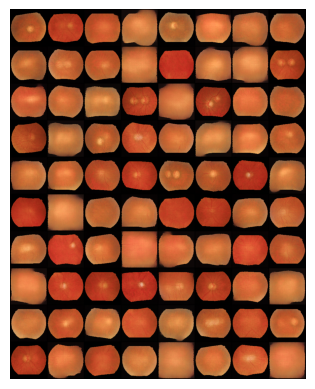

In [51]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

sample_paths = df_keep["Image_Path"].tolist()[:80]
imgs = [to_tensor(Image.open(p).convert("RGB")) for p in sample_paths]
grid = make_grid(imgs, nrow=8)
plt.imshow(grid.permute(1, 2, 0))
plt.axis("off")
plt.show()



Model Building

In [241]:
real_df = multimodal_df.copy()  # must contain both Diagnosis=0 and 1
real_df=pd.concat([real_df,real_df])
print(real_df["Diagnosis"].value_counts())


Diagnosis
0    666
1    310
Name: count, dtype: int64


In [242]:
import pandas as pd

df = pd.read_csv("synthetic_glaucoma/synthetic_glaucoma_pairs.csv")
print(df.columns)
# should include: mean_intensity, std_intensity, sharpness


Index(['Age', 'dioptre_1', 'dioptre_2', 'astigmatism', 'Pneumatic',
       'Pachymetry', 'Axial_Length', 'Gender', 'Phakic/Pseudophakic',
       'Eye_Label', 'Diagnosis', 'Image_Path'],
      dtype='object')


In [244]:
syn_df  = pd.read_csv("synthetic_glaucoma/synthetic_glaucoma_pairs_good.csv") 
print(syn_df["Diagnosis"].value_counts())

Diagnosis
1    1159
Name: count, dtype: int64


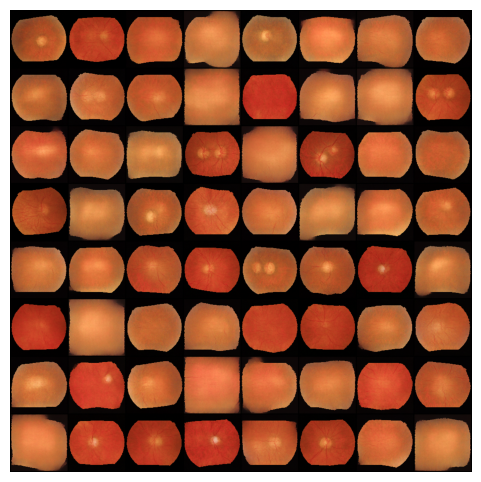

In [245]:
import torchvision.transforms as T
from torchvision.utils import make_grid
from PIL import Image
import torch
import matplotlib.pyplot as plt

vis_tf = T.Compose([
    T.Resize((128, 128)),
    T.ToTensor()
])

df_strict = pd.read_csv("synthetic_glaucoma/synthetic_glaucoma_pairs_good.csv")

paths = df_strict["Image_Path"].tolist()[:64]
imgs = [vis_tf(Image.open(p).convert("RGB")) for p in paths]
grid = make_grid(torch.stack(imgs), nrow=8)
plt.figure(figsize=(6, 6))
plt.imshow(grid.permute(1, 2, 0))
plt.axis("off")
plt.show()


In [246]:
import pandas as pd

syn_full = pd.read_csv("synthetic_glaucoma/synthetic_glaucoma_pairs.csv")
print(syn_full.columns)
# must contain: 'Image_Path', 'mean_intensity', 'std_intensity', 'sharpness'


Index(['Age', 'dioptre_1', 'dioptre_2', 'astigmatism', 'Pneumatic',
       'Pachymetry', 'Axial_Length', 'Gender', 'Phakic/Pseudophakic',
       'Eye_Label', 'Diagnosis', 'Image_Path'],
      dtype='object')


In [247]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import torchvision.transforms as T

# -----------------------------
# 1. Load your synthetic CSV
# -----------------------------
csv_path = "synthetic_glaucoma/synthetic_glaucoma_pairs.csv"
df = pd.read_csv(csv_path)
print("Columns in original df:", df.columns)

to_tensor = T.ToTensor()

# -----------------------------
# 2. Define sharpness function
# -----------------------------
def sharpness_score(pil_img, resize_to=128):
    """
    Variance of Laplacian on grayscale image.
    Higher = more texture/vessels, lower = flat blob.
    """
    img_np = np.array(pil_img)  # RGB
    gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
    gray = cv2.resize(gray, (resize_to, resize_to))
    lap = cv2.Laplacian(gray, cv2.CV_64F)
    return float(lap.var())

# -----------------------------
# 3. Compute metrics per image
# -----------------------------
means = []
stds  = []
sharps = []

for i, row in df.iterrows():
    img_path = row["Image_Path"]

    if not os.path.exists(img_path):
        print("Missing:", img_path)
        means.append(np.nan)
        stds.append(np.nan)
        sharps.append(np.nan)
        continue

    img = Image.open(img_path).convert("RGB")
    x = to_tensor(img)              # [3,H,W] in [0,1]
    m = x.mean().item()             # brightness
    s = x.std().item()              # contrast
    sh = sharpness_score(img)       # texture

    means.append(m)
    stds.append(s)
    sharps.append(sh)

df["mean_intensity"] = means
df["std_intensity"]  = stds
df["sharpness"]      = sharps

print("Added columns:", ["mean_intensity", "std_intensity", "sharpness"])

# -----------------------------
# 4. Build quality score & keep best
# -----------------------------
# replace NaNs with 0 so they go to the bottom
df["std_intensity"] = df["std_intensity"].fillna(0.0)
df["sharpness"]     = df["sharpness"].fillna(0.0)

# simple quality score = sharpness × contrast
df["quality"] = df["sharpness"] * df["std_intensity"]

# sort by quality: best first
df_sorted = df.sort_values("quality", ascending=False)

# keep top N best synthetic images (you only need 152 later,
# so 300–400 is safe and strict)
N_GOOD = 400
df_best = df_sorted.head(N_GOOD).reset_index(drop=True)

print("Total synthetic:", len(df))
print("Top-quality synthetic kept:", len(df_best))

out_csv = "synthetic_glaucoma/synthetic_glaucoma_pairs_topquality.csv"
df_best.to_csv(out_csv, index=False)
print("Saved filtered synthetic CSV →", out_csv)


Columns in original df: Index(['Age', 'dioptre_1', 'dioptre_2', 'astigmatism', 'Pneumatic',
       'Pachymetry', 'Axial_Length', 'Gender', 'Phakic/Pseudophakic',
       'Eye_Label', 'Diagnosis', 'Image_Path'],
      dtype='object')
Added columns: ['mean_intensity', 'std_intensity', 'sharpness']
Total synthetic: 3000
Top-quality synthetic kept: 400
Saved filtered synthetic CSV → synthetic_glaucoma/synthetic_glaucoma_pairs_topquality.csv


In [248]:
syn_df = pd.read_csv("synthetic_glaucoma/synthetic_glaucoma_pairs_topquality.csv")


In [249]:
import random
SEED = 42
random.seed(SEED)

real_only = real_df.reset_index(drop=True)
indices = list(range(len(real_only)))
random.shuffle(indices)

n_total = len(real_only)
n_test = int(0.1 * n_total)
n_val  = int(0.2 * n_total)
n_train_real = n_total - n_val - n_test

train_real_idx = indices[:n_train_real]
val_idx        = indices[n_train_real:n_train_real+n_val]
test_idx       = indices[n_train_real+n_val:]

train_real_df = real_only.iloc[train_real_idx].reset_index(drop=True)
val_df        = real_only.iloc[val_idx].reset_index(drop=True)
test_df       = real_only.iloc[test_idx].reset_index(drop=True)

print("Real TRAIN counts:")
print(train_real_df["Diagnosis"].value_counts())
print("VAL counts:")
print(val_df["Diagnosis"].value_counts())
print("TEST counts:")
print(test_df["Diagnosis"].value_counts())


# import random
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split

# SEED = 42
# random.seed(SEED)
# np.random.seed(SEED)

# # ------------------------------------------------------------
# # real_df: your real data (healthy + glaucoma, no synthetic)
# # syn_df : your synthetic glaucoma dataframe
# # ------------------------------------------------------------
# real_only = real_df.reset_index(drop=True)

# print("Total REAL samples:", len(real_only))
# print("REAL Diagnosis counts:")
# print(real_only["Diagnosis"].value_counts())

# y = real_only["Diagnosis"].values

# # ============================================================
# # 1) STRATIFIED TEST SPLIT (10% → test)
# # ============================================================
# test_size = 0.10    # 10% test
# trainval_df, test_df = train_test_split(
#     real_only,
#     test_size=test_size,
#     stratify=y,
#     random_state=SEED
# )

# print("\nTEST (REAL ONLY) counts:")
# print(test_df["Diagnosis"].value_counts())
# print("Test size:", len(test_df))

# # ============================================================
# # 2) STRATIFIED TRAIN / VAL SPLIT on remaining 90%
# #    we want ~70% train, 20% val overall
# #    0.2 / 0.9 ≈ 0.2222 of the remaining goes to val
# # ============================================================
# val_ratio_overall = 0.20     # want 20% of all data as val
# val_size_rel = val_ratio_overall / (1.0 - test_size)  # ≈ 0.222

# print(f"\nSplitting remaining 90% into TRAIN and VAL with "
#       f"val_size={val_size_rel:.3f} (for ~20% overall val)")

# train_real_df, val_df = train_test_split(
#     trainval_df,
#     test_size=val_size_rel,
#     stratify=trainval_df["Diagnosis"],
#     random_state=SEED
# )

# print("\nTRAIN (REAL ONLY) counts:")
# print(train_real_df["Diagnosis"].value_counts())
# print("Train size (real only):", len(train_real_df))

# print("\nVAL (REAL ONLY) counts:")
# print(val_df["Diagnosis"].value_counts())
# print("Val size (real only):", len(val_df))

# # ============================================================
# # 3) BALANCE TRAIN with SYNTHETIC GLAUCOMA
# #    (we keep val / test REAL ONLY)
# # ============================================================
# n_healthy       = (train_real_df["Diagnosis"] == 0).sum()
# n_glaucoma_real = (train_real_df["Diagnosis"] == 1).sum()

# print("\nIn TRAIN (real only):")
# print("  Healthy:", n_healthy)
# print("  Glaucoma:", n_glaucoma_real)

# # we want same number glaucoma as healthy
# n_glaucoma_needed = n_healthy - n_glaucoma_real
# print("Synthetic glaucoma needed:", n_glaucoma_needed)

# if n_glaucoma_needed > 0:
#     # sample glaucoma rows from syn_df (with replacement if needed)
#     syn_sample = syn_df.sample(
#         n=n_glaucoma_needed,
#         replace=(n_glaucoma_needed > len(syn_df)),
#         random_state=SEED
#     )
# else:
#     # no extra needed, or you could downsample real glaucoma instead
#     syn_sample = syn_df.iloc[0:0].copy()

# # final TRAIN = real + synthetic glaucoma
# train_df = pd.concat([train_real_df, syn_sample], ignore_index=True)

# print("\nFINAL TRAIN (REAL + SYNTHETIC) counts:")
# print(train_df["Diagnosis"].value_counts())
# print("Final TRAIN size:", len(train_df))
# print("VAL size (real only):", len(val_df))
# print("TEST size (real only):", len(test_df))

# # (optional) save for your multimodal model script
# os.makedirs("datasets", exist_ok=True)
# train_df.to_csv("datasets/train_df.csv", index=False)
# val_df.to_csv("datasets/val_df.csv", index=False)
# test_df.to_csv("datasets/test_df.csv", index=False)
# print("\nSaved: datasets/train_df.csv, val_df.csv, test_df.csv")



Real TRAIN counts:
Diagnosis
0    463
1    221
Name: count, dtype: int64
VAL counts:
Diagnosis
0    127
1     68
Name: count, dtype: int64
TEST counts:
Diagnosis
0    76
1    21
Name: count, dtype: int64


In [250]:
n_healthy       = (train_real_df["Diagnosis"] == 0).sum()
n_glaucoma_real = (train_real_df["Diagnosis"] == 1).sum()

print("Train real healthy:", n_healthy)
print("Train real glaucoma:", n_glaucoma_real)

n_glaucoma_needed = n_healthy - n_glaucoma_real
print("Synthetic glaucoma needed:", n_glaucoma_needed)


Train real healthy: 463
Train real glaucoma: 221
Synthetic glaucoma needed: 242


In [251]:
if n_glaucoma_needed > 0:
    syn_sample = syn_df.sample(
        n=n_glaucoma_needed,
        replace=(n_glaucoma_needed > len(syn_df)),
        random_state=SEED
    )
else:
    syn_sample = syn_df.iloc[0:0].copy()

train_df = pd.concat([train_real_df, syn_sample], ignore_index=True)

print("Final TRAIN diagnosis counts (real + synthetic):")
print(train_df["Diagnosis"].value_counts())

Final TRAIN diagnosis counts (real + synthetic):
Diagnosis
1    463
0    463
Name: count, dtype: int64


In [252]:
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as T
from torchvision.utils import make_grid

to_tensor = T.ToTensor()


In [253]:
from PIL import Image
import torch
import torchvision.transforms as T
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import os

os.makedirs("train_grids", exist_ok=True)

# choose any size you like for visualization
VIS_SIZE = 128

vis_tf = T.Compose([
    T.Resize((VIS_SIZE, VIS_SIZE)),
    T.ToTensor()
])

def save_grid_batches(df_subset, batch_size=64, prefix="train_all"):
    paths = df_subset["Image_Path"].tolist()
    for i in range(0, len(paths), batch_size):
        batch_paths = paths[i:i+batch_size]
        imgs = []
        for p in batch_paths:
            try:
                img = Image.open(p).convert("RGB")
                imgs.append(vis_tf(img))          # <-- resized here
            except Exception as e:
                print(f"Skipping {p}: {e}")
                continue

        if len(imgs) == 0:
            continue

        imgs = torch.stack(imgs, dim=0)           # now all same size
        grid = make_grid(imgs, nrow=8)

        plt.figure(figsize=(8, 8))
        plt.imshow(grid.permute(1, 2, 0))
        plt.axis("off")
        out_path = f"train_grids/{prefix}_{i//batch_size:03d}.png"
        plt.savefig(out_path, bbox_inches="tight")
        plt.close()
        print("Saved", out_path)


In [254]:
glaucoma_all = train_df[train_df["Diagnosis"] == 1]
print("Total glaucoma in train_df:", len(glaucoma_all))
save_grid_batches(glaucoma_all, batch_size=64, prefix="train_glaucoma_all")


Total glaucoma in train_df: 463
Saved train_grids/train_glaucoma_all_000.png
Saved train_grids/train_glaucoma_all_001.png
Saved train_grids/train_glaucoma_all_002.png
Saved train_grids/train_glaucoma_all_003.png
Saved train_grids/train_glaucoma_all_004.png
Saved train_grids/train_glaucoma_all_005.png
Saved train_grids/train_glaucoma_all_006.png
Saved train_grids/train_glaucoma_all_007.png


In [255]:
print(train_df["Diagnosis"].value_counts())



Diagnosis
1    463
0    463
Name: count, dtype: int64


In [256]:
healthy_all = train_df[train_df["Diagnosis"] == 0]
print("Total healthy in train_df:", len(healthy_all))
save_grid_batches(healthy_all, batch_size=64, prefix="train_healthy_all")


Total healthy in train_df: 463
Saved train_grids/train_healthy_all_000.png
Saved train_grids/train_healthy_all_001.png
Saved train_grids/train_healthy_all_002.png
Saved train_grids/train_healthy_all_003.png
Saved train_grids/train_healthy_all_004.png
Saved train_grids/train_healthy_all_005.png
Saved train_grids/train_healthy_all_006.png
Saved train_grids/train_healthy_all_007.png


In [257]:
import os
import math
import random
import numpy as np
import pandas as pd
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import torchvision.models as models
from sklearn.metrics import roc_auc_score, accuracy_score


In [258]:
# drop last 2 columns in-place
train_df.drop(columns=train_df.columns[-4:], inplace=True)

# check
print(train_df.columns)


Index(['Patient_ID', 'Age', 'Gender', 'Diagnosis', 'dioptre_1', 'dioptre_2',
       'astigmatism', 'Phakic/Pseudophakic', 'Pneumatic', 'Pachymetry',
       'Axial_Length', 'Eye_Label', 'Image_Path'],
      dtype='object')


In [259]:
os.makedirs("datasets", exist_ok=True)

train_df.to_csv("datasets/train_df.csv", index=False)
val_df.to_csv("datasets/val_df.csv", index=False)
test_df.to_csv("datasets/test_df.csv", index=False)

print("Saved:")
print("  datasets/train_df.csv")
print("  datasets/val_df.csv")
print("  datasets/test_df.csv")


Saved:
  datasets/train_df.csv
  datasets/val_df.csv
  datasets/test_df.csv


In [260]:
TRAIN_CSV = "datasets/train_df.csv"
VAL_CSV   = "datasets/val_df.csv"
import pandas as pd

train_df = pd.read_csv("datasets/train_df.csv")
val_df   = pd.read_csv("datasets/val_df.csv")
test_df  = pd.read_csv("datasets/test_df.csv")

print(train_df.columns)
print(len(train_df), len(val_df), len(test_df))

TEST_CSV  = "datasets/test_df.csv"


Index(['Patient_ID', 'Age', 'Gender', 'Diagnosis', 'dioptre_1', 'dioptre_2',
       'astigmatism', 'Phakic/Pseudophakic', 'Pneumatic', 'Pachymetry',
       'Axial_Length', 'Eye_Label', 'Image_Path'],
      dtype='object')
926 195 97


In [261]:
import os
import math
import random
import numpy as np
import pandas as pd

# ------------ PIL (robust to truncated images) ------------
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import torchvision.models as models
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

# ============================================================
# 0. CONFIG
# ============================================================
DATA_DIR   = "datasets"
TRAIN_CSV  = os.path.join(DATA_DIR, "train_df.csv")
VAL_CSV    = os.path.join(DATA_DIR, "val_df.csv")
TEST_CSV   = os.path.join(DATA_DIR, "test_df.csv")

IMG_SIZE   = 224
BATCH_SIZE = 16
EPOCHS     = 100          # will run all epochs
LR         = 5e-5         # small LR
SEED       = 42

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

# ============================================================
# 1. LOAD DATAFRAMES
# ============================================================
train_df = pd.read_csv(TRAIN_CSV)
val_df   = pd.read_csv(VAL_CSV)
test_df  = pd.read_csv(TEST_CSV)

print("Train size:", len(train_df))
print("Val size:", len(val_df))
print("Test size:", len(test_df))
print("Train diagnosis counts:")
print(train_df["Diagnosis"].value_counts())

# ============================================================
# 2. CLINICAL ENCODING
# ============================================================
NUMERIC_COLS = [
    "Age", "dioptre_1", "dioptre_2", "astigmatism",
    "Pneumatic", "Pachymetry", "Axial_Length"
]

CAT_COLS = [
    "Gender",
    "Phakic/Pseudophakic",
    "Eye_Label",
]

LABEL_COL = "Diagnosis"

# numeric stats from TRAIN only
num_means = train_df[NUMERIC_COLS].mean()
num_stds  = train_df[NUMERIC_COLS].std().replace(0, 1.0)

# categorical maps from all splits
cat_maps = {}
for col in CAT_COLS:
    cats = sorted(
        pd.concat([train_df[col], val_df[col], test_df[col]])
        .fillna("UNK").astype(str).unique().tolist()
    )
    cat_maps[col] = {c: i for i, c in enumerate(cats)}
    print(f"{col} categories:", cat_maps[col])

def encode_numeric(row):
    vals = (row[NUMERIC_COLS] - num_means) / num_stds
    return vals.to_numpy(dtype=np.float32)

def encode_cat(row):
    vec = []
    for col in CAT_COLS:
        cats = cat_maps[col]
        v = str(row.get(col, "UNK"))
        if v not in cats:
            v = "UNK"
        idx = cats.get(v, 0)
        one = [0.0] * len(cats)
        one[idx] = 1.0
        vec.extend(one)
    return np.array(vec, dtype=np.float32)

def encode_clinical_row(row):
    num = encode_numeric(row)
    cat = encode_cat(row)
    return np.concatenate([num, cat], axis=0)

dummy_vec = encode_clinical_row(train_df.iloc[0])
CLIN_DIM = dummy_vec.shape[0]
print("Clinical dim:", CLIN_DIM)

# ============================================================
# 3. DATASET & DATALOADERS (robust to bad images)
# ============================================================
class FundusClinDataset(Dataset):
    def __init__(self, df, img_transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = img_transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = row["Image_Path"]

        # robust image loading
        try:
            img = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"[WARN] Problem reading {img_path}: {e}")
            img = Image.new("RGB", (IMG_SIZE, IMG_SIZE), (0, 0, 0))

        if self.transform:
            img_t = self.transform(img)
        else:
            img_t = T.ToTensor()(img)

        clin_vec = encode_clinical_row(row)
        clin_t = torch.from_numpy(clin_vec)

        y = int(row[LABEL_COL])
        y = torch.tensor(y, dtype=torch.long)

        return img_t, clin_t, y

IMG_MEAN = [0.485, 0.456, 0.406]
IMG_STD  = [0.229, 0.224, 0.225]

train_tf = T.Compose([
    T.Resize((IMG_SIZE, IMG_SIZE)),
    T.RandomHorizontalFlip(),
    T.RandomVerticalFlip(),
    T.RandomRotation(15),
    T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.05, hue=0.02),
    T.ToTensor(),
    T.Normalize(IMG_MEAN, IMG_STD),
])

eval_tf = T.Compose([
    T.Resize((IMG_SIZE, IMG_SIZE)),
    T.ToTensor(),
    T.Normalize(IMG_MEAN, IMG_STD),
])

train_set = FundusClinDataset(train_df, img_transform=train_tf)
val_set   = FundusClinDataset(val_df,   img_transform=eval_tf)
test_set  = FundusClinDataset(test_df,  img_transform=eval_tf)

train_loader = DataLoader(train_set, batch_size=BATCH_SIZE,
                          shuffle=True, num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_set, batch_size=BATCH_SIZE,
                          shuffle=False, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_set, batch_size=BATCH_SIZE,
                          shuffle=False, num_workers=2, pin_memory=True)

print("Train batches:", len(train_loader))
print("Val batches:", len(val_loader))
print("Test batches:", len(test_loader))

# ============================================================
# 4. MULTIMODAL MODEL (IMAGE + CLINICAL)
# ============================================================
class MultiModalNet(nn.Module):
    def __init__(self, clin_dim, n_classes=2, freeze_backbone=False):
        super().__init__()
        backbone = models.resnet18(
            weights=models.ResNet18_Weights.IMAGENET1K_V1
        )
        self.cnn = nn.Sequential(*list(backbone.children())[:-1])  # [B,512,1,1]
        img_feat_dim = 512

        if freeze_backbone:
            for p in self.cnn.parameters():
                p.requires_grad = False

        self.clin_mlp = nn.Sequential(
            nn.Linear(clin_dim, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 64),
            nn.ReLU(inplace=True),
        )

        self.fusion = nn.Sequential(
            nn.Linear(img_feat_dim + 64, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Linear(128, n_classes),
        )

    def forward(self, img, clin):
        x = self.cnn(img)              # [B,512,1,1]
        x = x.view(x.size(0), -1)      # [B,512]
        c = self.clin_mlp(clin)        # [B,64]
        z = torch.cat([x, c], dim=1)   # [B,576]
        out = self.fusion(z)           # [B,2]
        return out

model = MultiModalNet(CLIN_DIM, n_classes=2, freeze_backbone=False).to(device)
print("Model params (M):", sum(p.numel() for p in model.parameters()) / 1e6)

criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=1e-4)

# LR scheduler – reduces LR when val loss plateaus
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode="min",
    factor=0.5,
    patience=3,
    verbose=True,
    min_lr=1e-7,
)

# ============================================================
# 5. TRAIN / VAL LOOP (NO EARLY STOPPING)
# ============================================================
history = {
    "train_loss": [],
    "val_loss":   [],
    "train_auc":  [],
    "val_auc":    [],
    "train_acc":  [],
    "val_acc":    [],
}

def run_epoch(loader, model, optimizer=None):
    is_train = optimizer is not None
    model.train(is_train)

    all_labels = []
    all_probs  = []
    running_loss = 0.0

    for imgs, clin, y in loader:
        imgs = imgs.to(device, non_blocking=True)
        clin = clin.to(device, non_blocking=True)
        y    = y.to(device, non_blocking=True)

        if is_train:
            optimizer.zero_grad()

        logits = model(imgs, clin)
        loss   = criterion(logits, y)

        if is_train:
            loss.backward()
            optimizer.step()

        running_loss += loss.item() * imgs.size(0)

        probs  = F.softmax(logits, dim=1)[:, 1].detach().cpu().numpy()
        labels = y.detach().cpu().numpy()
        all_probs.append(probs)
        all_labels.append(labels)

    all_probs  = np.concatenate(all_probs)
    all_labels = np.concatenate(all_labels)

    epoch_loss = running_loss / len(loader.dataset)
    try:
        epoch_auc = roc_auc_score(all_labels, all_probs)
    except ValueError:
        epoch_auc = float("nan")
    preds = (all_probs >= 0.5).astype(int)
    epoch_acc = accuracy_score(all_labels, preds)

    return epoch_loss, epoch_auc, epoch_acc

best_val_loss = float("inf")
best_val_auc  = 0.0
best_epoch    = 0
best_path = os.path.join(DATA_DIR, "multimodal_glaucoma_best.pt")

for epoch in range(1, EPOCHS+1):
    train_loss, train_auc, train_acc = run_epoch(train_loader, model, optimizer)
    val_loss,   val_auc,   val_acc   = run_epoch(val_loader,   model, optimizer=None)

    history["train_loss"].append(train_loss)
    history["val_loss"].append(val_loss)
    history["train_auc"].append(train_auc)
    history["val_auc"].append(val_auc)
    history["train_acc"].append(train_acc)
    history["val_acc"].append(val_acc)

    print(f"Epoch {epoch:03d} | "
          f"train loss {train_loss:.4f} auc {train_auc:.3f} acc {train_acc:.3f} | "
          f"val loss {val_loss:.4f} auc {val_auc:.3f} acc {val_acc:.3f}")

    # track best model by val loss (but do NOT stop)
    if val_loss < best_val_loss - 1e-4:
        best_val_loss = val_loss
        best_val_auc  = val_auc
        best_epoch    = epoch
        torch.save(model.state_dict(), best_path)
        print(f"  -> new best model saved (val loss={best_val_loss:.4f}, "
              f"val AUC={best_val_auc:.3f}, epoch={best_epoch})")

    # update LR schedule
    scheduler.step(val_loss)

print("\n=== BEST EPOCH (by val loss) ===")
print(f"Epoch: {best_epoch}")
print(f"Best val loss: {best_val_loss:.4f}")
print(f"Best val AUC:  {best_val_auc:.3f}")

# ============================================================
# 6. FINAL TEST EVALUATION (using best weights)
# ============================================================
best_model = MultiModalNet(CLIN_DIM, n_classes=2, freeze_backbone=False).to(device)
best_model.load_state_dict(torch.load(best_path, map_location=device))

test_loss, test_auc, test_acc = run_epoch(test_loader, best_model, optimizer=None)
print("\n=== TEST RESULTS (best val-loss model) ===")
print(f"Test loss {test_loss:.4f} | AUC {test_auc:.3f} | ACC {test_acc:.3f}")

# ============================================================
# 7. PLOTS: LOSS / AUC / ACC vs EPOCH (SMOOTHED)
# ============================================================
def smooth_curve(values, weight=0.7):
    smoothed = []
    last = values[0]
    for v in values:
        last = weight * last + (1.0 - weight) * v
        smoothed.append(last)
    return smoothed

epochs_ran = len(history["train_loss"])
xs = range(1, epochs_ran + 1)

os.makedirs("plots", exist_ok=True)

train_loss_s = smooth_curve(history["train_loss"])
val_loss_s   = smooth_curve(history["val_loss"])
train_auc_s  = smooth_curve(history["train_auc"])
val_auc_s    = smooth_curve(history["val_auc"])
train_acc_s  = smooth_curve(history["train_acc"])
val_acc_s    = smooth_curve(history["val_acc"])

# Loss curve
plt.figure(figsize=(6,4))
plt.plot(xs, train_loss_s, label="Train loss")
plt.plot(xs, val_loss_s,   label="Val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train vs Val Loss (smoothed)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("plots/loss_curve.png", dpi=150)
plt.show()

# AUC curve
plt.figure(figsize=(6,4))
plt.plot(xs, train_auc_s, label="Train AUC")
plt.plot(xs, val_auc_s,   label="Val AUC")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.title("Train vs Val AUC (smoothed)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("plots/auc_curve.png", dpi=150)
plt.show()

# Accuracy curve
plt.figure(figsize=(6,4))
plt.plot(xs, train_acc_s, label="Train ACC")
plt.plot(xs, val_acc_s,   label="Val ACC")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train vs Val Accuracy (smoothed)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("plots/acc_curve.png", dpi=150)
plt.show()


Device: cuda
Train size: 926
Val size: 195
Test size: 97
Train diagnosis counts:
Diagnosis
1    463
0    463
Name: count, dtype: int64
Gender categories: {'0': 0, '1': 1}
Phakic/Pseudophakic categories: {'0.0': 0, '1.0': 1}
Eye_Label categories: {'OD': 0, 'OS': 1}
Clinical dim: 13
Train batches: 58
Val batches: 13
Test batches: 7
Model params (M): 11.260674


/home/s25afsha/venvs/linuxlab/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


KeyboardInterrupt: 

Device: cuda
Train size: 926
Val size: 195
Test size: 97
Train diagnosis counts:
Diagnosis
1    463
0    463
Name: count, dtype: int64
Gender categories: {'0': 0, '1': 1}
Phakic/Pseudophakic categories: {'0.0': 0, '1.0': 1}
Eye_Label categories: {'OD': 0, 'OS': 1}
Clinical dim: 13
Train batches: 58
Val batches: 13
Test batches: 7
Model params (M): 11.214498
Epoch 001 | train loss 0.5155 auc 0.808 acc 0.751 | val loss 0.5477 auc 0.813 acc 0.785
  -> new best model saved (val loss=0.5477, val AUC=0.813, epoch=1)
Epoch 002 | train loss 0.4334 auc 0.897 acc 0.819 | val loss 0.5208 auc 0.863 acc 0.759
  -> new best model saved (val loss=0.5208, val AUC=0.863, epoch=2)
Epoch 003 | train loss 0.3968 auc 0.924 acc 0.848 | val loss 0.4404 auc 0.879 acc 0.821
  -> new best model saved (val loss=0.4404, val AUC=0.879, epoch=3)
Epoch 004 | train loss 0.3785 auc 0.931 acc 0.856 | val loss 0.4309 auc 0.888 acc 0.795
  -> new best model saved (val loss=0.4309, val AUC=0.888, epoch=4)
Epoch 005 | trai

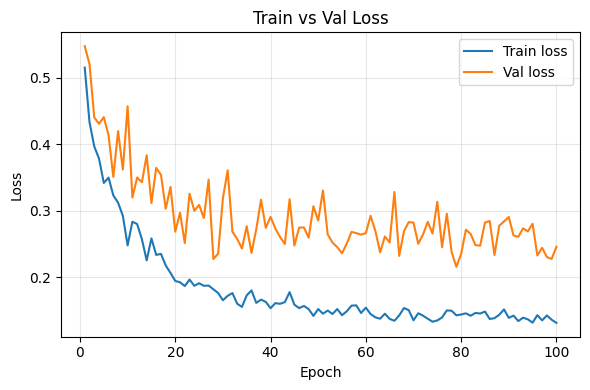

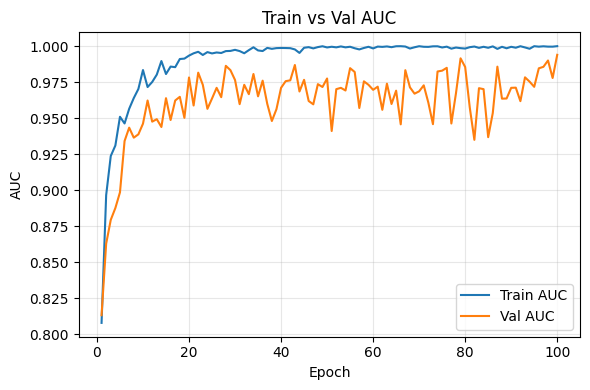

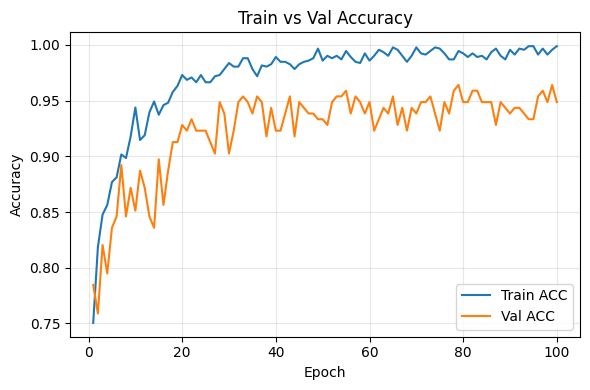

In [206]:
import os
import math
import random
import numpy as np
import pandas as pd

# ------------ PIL (robust to truncated images) ------------
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import torchvision.models as models
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

# ============================================================
# 0. CONFIG
# ============================================================
DATA_DIR   = "datasets"
TRAIN_CSV  = os.path.join(DATA_DIR, "train_df.csv")
VAL_CSV    = os.path.join(DATA_DIR, "val_df.csv")
TEST_CSV   = os.path.join(DATA_DIR, "test_df.csv")

IMG_SIZE   = 224
BATCH_SIZE = 16
EPOCHS     = 100          # full run; we will still save best val-loss model
LR         = 1e-4         # slightly larger LR to help optimisation
SEED       = 42

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

# ============================================================
# 1. LOAD DATAFRAMES
# ============================================================
train_df = pd.read_csv(TRAIN_CSV)
val_df   = pd.read_csv(VAL_CSV)
test_df  = pd.read_csv(TEST_CSV)

print("Train size:", len(train_df))
print("Val size:", len(val_df))
print("Test size:", len(test_df))
print("Train diagnosis counts:")
print(train_df["Diagnosis"].value_counts())

# ============================================================
# 2. CLINICAL ENCODING
# ============================================================
NUMERIC_COLS = [
    "Age", "dioptre_1", "dioptre_2", "astigmatism",
    "Pneumatic", "Pachymetry", "Axial_Length"
]

CAT_COLS = [
    "Gender",
    "Phakic/Pseudophakic",
    "Eye_Label",
]

LABEL_COL = "Diagnosis"

# numeric stats from TRAIN only
num_means = train_df[NUMERIC_COLS].mean()
num_stds  = train_df[NUMERIC_COLS].std().replace(0, 1.0)

# categorical maps from all splits
cat_maps = {}
for col in CAT_COLS:
    cats = sorted(
        pd.concat([train_df[col], val_df[col], test_df[col]])
        .fillna("UNK").astype(str).unique().tolist()
    )
    cat_maps[col] = {c: i for i, c in enumerate(cats)}
    print(f"{col} categories:", cat_maps[col])

def encode_numeric(row):
    vals = (row[NUMERIC_COLS] - num_means) / num_stds
    return vals.to_numpy(dtype=np.float32)

def encode_cat(row):
    vec = []
    for col in CAT_COLS:
        cats = cat_maps[col]
        v = str(row.get(col, "UNK"))
        if v not in cats:
            v = "UNK"
        idx = cats.get(v, 0)
        one = [0.0] * len(cats)
        one[idx] = 1.0
        vec.extend(one)
    return np.array(vec, dtype=np.float32)

def encode_clinical_row(row):
    num = encode_numeric(row)
    cat = encode_cat(row)
    return np.concatenate([num, cat], axis=0)

dummy_vec = encode_clinical_row(train_df.iloc[0])
CLIN_DIM = dummy_vec.shape[0]
print("Clinical dim:", CLIN_DIM)

# ============================================================
# 3. DATASET & DATALOADERS (robust to bad images)
# ============================================================
class FundusClinDataset(Dataset):
    def __init__(self, df, img_transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = img_transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = row["Image_Path"]

        # robust image loading
        try:
            img = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"[WARN] Problem reading {img_path}: {e}")
            img = Image.new("RGB", (IMG_SIZE, IMG_SIZE), (0, 0, 0))

        if self.transform:
            img_t = self.transform(img)
        else:
            img_t = T.ToTensor()(img)

        clin_vec = encode_clinical_row(row)
        clin_t = torch.from_numpy(clin_vec)

        y = int(row[LABEL_COL])
        y = torch.tensor(y, dtype=torch.long)

        return img_t, clin_t, y

IMG_MEAN = [0.485, 0.456, 0.406]
IMG_STD  = [0.229, 0.224, 0.225]

train_tf = T.Compose([
    T.Resize((IMG_SIZE, IMG_SIZE)),
    T.RandomHorizontalFlip(),
    T.RandomVerticalFlip(),
    T.RandomRotation(15),
    T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.05, hue=0.02),
    T.ToTensor(),
    T.Normalize(IMG_MEAN, IMG_STD),
])

eval_tf = T.Compose([
    T.Resize((IMG_SIZE, IMG_SIZE)),
    T.ToTensor(),
    T.Normalize(IMG_MEAN, IMG_STD),
])

train_set = FundusClinDataset(train_df, img_transform=train_tf)
val_set   = FundusClinDataset(val_df,   img_transform=eval_tf)
test_set  = FundusClinDataset(test_df,  img_transform=eval_tf)

train_loader = DataLoader(train_set, batch_size=BATCH_SIZE,
                          shuffle=True, num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_set, batch_size=BATCH_SIZE,
                          shuffle=False, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_set, batch_size=BATCH_SIZE,
                          shuffle=False, num_workers=2, pin_memory=True)

print("Train batches:", len(train_loader))
print("Val batches:", len(val_loader))
print("Test batches:", len(test_loader))

# ============================================================
# 4. MULTIMODAL MODEL (smaller, partially frozen backbone)
# ============================================================
class MultiModalNet(nn.Module):
    def __init__(self, clin_dim, n_classes=2, freeze_backbone=True):
        super().__init__()
        backbone = models.resnet18(
            weights=models.ResNet18_Weights.IMAGENET1K_V1
        )

        # freeze all backbone
        for p in backbone.parameters():
            p.requires_grad = False
        # unfreeze only last residual block (layer4)
        for p in backbone.layer4.parameters():
            p.requires_grad = True

        self.cnn = nn.Sequential(*list(backbone.children())[:-1])  # [B,512,1,1]
        img_feat_dim = 512

        self.clin_mlp = nn.Sequential(
            nn.Linear(clin_dim, 64),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(inplace=True),
        )

        self.fusion = nn.Sequential(
            nn.Linear(img_feat_dim + 32, 64),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(64, n_classes),
        )

    def forward(self, img, clin):
        x = self.cnn(img)              # [B,512,1,1]
        x = x.view(x.size(0), -1)      # [B,512]
        c = self.clin_mlp(clin)        # [B,32]
        z = torch.cat([x, c], dim=1)   # [B,544]
        out = self.fusion(z)
        return out

model = MultiModalNet(CLIN_DIM, n_classes=2, freeze_backbone=True).to(device)
print("Model params (M):", sum(p.numel() for p in model.parameters()) / 1e6)

# slightly weaker smoothing so minimal possible loss lower
criterion = nn.CrossEntropyLoss(label_smoothing=0.05)
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=1e-4)

# ============================================================
# 5. TRAIN / VAL LOOP (NO EARLY STOPPING; we just save best val-loss model)
# ============================================================
history = {
    "train_loss": [],
    "val_loss":   [],
    "train_auc":  [],
    "val_auc":    [],
    "train_acc":  [],
    "val_acc":    [],
}

def run_epoch(loader, model, optimizer=None):
    is_train = optimizer is not None
    model.train(is_train)

    all_labels = []
    all_probs  = []
    running_loss = 0.0

    for imgs, clin, y in loader:
        imgs = imgs.to(device, non_blocking=True)
        clin = clin.to(device, non_blocking=True)
        y    = y.to(device, non_blocking=True)

        if is_train:
            optimizer.zero_grad()

        logits = model(imgs, clin)
        loss   = criterion(logits, y)

        if is_train:
            loss.backward()
            optimizer.step()

        running_loss += loss.item() * imgs.size(0)

        probs  = F.softmax(logits, dim=1)[:, 1].detach().cpu().numpy()
        labels = y.detach().cpu().numpy()
        all_probs.append(probs)
        all_labels.append(labels)

    all_probs  = np.concatenate(all_probs)
    all_labels = np.concatenate(all_labels)

    epoch_loss = running_loss / len(loader.dataset)
    try:
        epoch_auc = roc_auc_score(all_labels, all_probs)
    except ValueError:
        epoch_auc = float("nan")
    preds = (all_probs >= 0.5).astype(int)
    epoch_acc = accuracy_score(all_labels, preds)

    return epoch_loss, epoch_auc, epoch_acc

best_val_loss = float("inf")
best_val_auc  = 0.0
best_epoch    = 0
best_path = os.path.join(DATA_DIR, "multimodal_glaucoma_best.pt")

for epoch in range(1, EPOCHS+1):
    train_loss, train_auc, train_acc = run_epoch(train_loader, model, optimizer)
    val_loss,   val_auc,   val_acc   = run_epoch(val_loader,   model, optimizer=None)

    history["train_loss"].append(train_loss)
    history["val_loss"].append(val_loss)
    history["train_auc"].append(train_auc)
    history["val_auc"].append(val_auc)
    history["train_acc"].append(train_acc)
    history["val_acc"].append(val_acc)

    print(f"Epoch {epoch:03d} | "
          f"train loss {train_loss:.4f} auc {train_auc:.3f} acc {train_acc:.3f} | "
          f"val loss {val_loss:.4f} auc {val_auc:.3f} acc {val_acc:.3f}")

    if val_loss < best_val_loss - 1e-4:
        best_val_loss = val_loss
        best_val_auc  = val_auc
        best_epoch    = epoch
        torch.save(model.state_dict(), best_path)
        print(f"  -> new best model saved (val loss={best_val_loss:.4f}, "
              f"val AUC={best_val_auc:.3f}, epoch={best_epoch})")

print("\n=== BEST EPOCH (by val loss) ===")
print(f"Epoch: {best_epoch}")
print(f"Best val loss: {best_val_loss:.4f}")
print(f"Best val AUC:  {best_val_auc:.3f}")

# ============================================================
# 6. FINAL TEST EVALUATION (using best weights)
# ============================================================
best_model = MultiModalNet(CLIN_DIM, n_classes=2, freeze_backbone=True).to(device)
best_model.load_state_dict(torch.load(best_path, map_location=device))

test_loss, test_auc, test_acc = run_epoch(test_loader, best_model, optimizer=None)
print("\n=== TEST RESULTS (best val-loss model) ===")
print(f"Test loss {test_loss:.4f} | AUC {test_auc:.3f} | ACC {test_acc:.3f}")

# ============================================================
# 7. PLOTS: LOSS / AUC / ACC vs EPOCH
# ============================================================
epochs_ran = len(history["train_loss"])
xs = range(1, epochs_ran + 1)

os.makedirs("plots", exist_ok=True)

# Loss curve
plt.figure(figsize=(6,4))
plt.plot(xs, history["train_loss"], label="Train loss")
plt.plot(xs, history["val_loss"],   label="Val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train vs Val Loss")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("plots/loss_curve.png", dpi=150)
plt.show()

# AUC curve
plt.figure(figsize=(6,4))
plt.plot(xs, history["train_auc"], label="Train AUC")
plt.plot(xs, history["val_auc"],   label="Val AUC")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.title("Train vs Val AUC")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("plots/auc_curve.png", dpi=150)
plt.show()

# Accuracy curve
plt.figure(figsize=(6,4))
plt.plot(xs, history["train_acc"], label="Train ACC")
plt.plot(xs, history["val_acc"],   label="Val ACC")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train vs Val Accuracy")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("plots/acc_curve.png", dpi=150)
plt.show()


Device: cuda
Gender categories: {'0': 0, '1': 1}
Phakic/Pseudophakic categories: {'0.0': 0, '1.0': 1}
Eye_Label categories: {'OD': 0, 'OS': 1}
Clinical dim: 13
Model params (M): 11.214498
Epoch 001 | train loss 0.5155 auc 0.808 acc 0.751 | val loss 0.5477 auc 0.813 acc 0.785
  -> new best model saved (val loss=0.5477, val AUC=0.813, epoch=1)
Epoch 002 | train loss 0.4334 auc 0.897 acc 0.819 | val loss 0.5208 auc 0.863 acc 0.759
  -> new best model saved (val loss=0.5208, val AUC=0.863, epoch=2)
Epoch 003 | train loss 0.3968 auc 0.924 acc 0.848 | val loss 0.4404 auc 0.879 acc 0.821
  -> new best model saved (val loss=0.4404, val AUC=0.879, epoch=3)
Epoch 004 | train loss 0.3785 auc 0.931 acc 0.856 | val loss 0.4309 auc 0.888 acc 0.795
  -> new best model saved (val loss=0.4309, val AUC=0.888, epoch=4)
Epoch 005 | train loss 0.3418 auc 0.951 acc 0.877 | val loss 0.4410 auc 0.898 acc 0.836
Epoch 006 | train loss 0.3499 auc 0.946 acc 0.881 | val loss 0.4136 auc 0.934 acc 0.846
  -> new bes

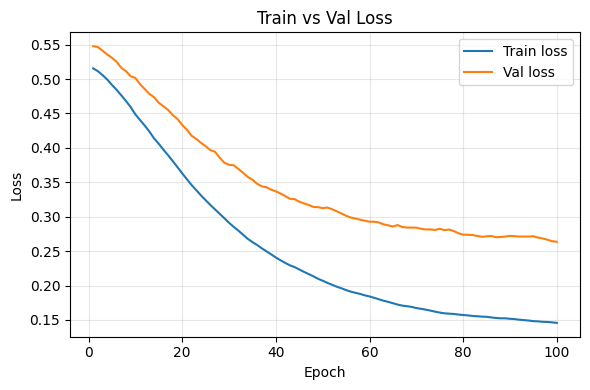

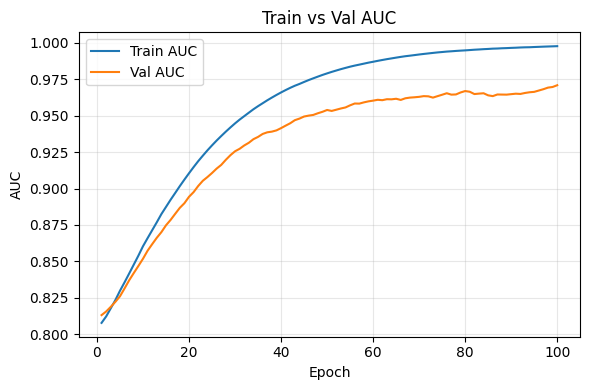

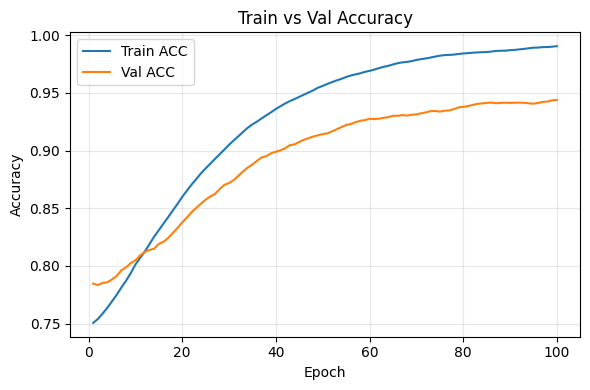

In [ ]:
import os
import math
import random
import numpy as np
import pandas as pd

# ------------ PIL (robust to truncated images) ------------
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import torchvision.models as models
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

# ============================================================
# 0. CONFIG
# ============================================================
DATA_DIR   = "datasets"
TRAIN_CSV  = os.path.join(DATA_DIR, "train_df.csv")
VAL_CSV    = os.path.join(DATA_DIR, "val_df.csv")
TEST_CSV   = os.path.join(DATA_DIR, "test_df.csv")

IMG_SIZE   = 224
BATCH_SIZE = 16
EPOCHS     = 100          # full run; we will still save best val-loss model
LR         = 1e-4         # slightly larger LR to help optimisation
SEED       = 42

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

# ============================================================
# 1. LOAD DATAFRAMES
# ============================================================
train_df = pd.read_csv(TRAIN_CSV)
val_df   = pd.read_csv(VAL_CSV)
test_df  = pd.read_csv(TEST_CSV)

# print("Train size:", len(train_df))
# print("Val size:", len(val_df))
# print("Test size:", len(test_df))
# print("Train diagnosis counts:")
# print(train_df["Diagnosis"].value_counts())

# ============================================================
# 2. CLINICAL ENCODING
# ============================================================
NUMERIC_COLS = [
    "Age", "dioptre_1", "dioptre_2", "astigmatism",
    "Pneumatic", "Pachymetry", "Axial_Length"
]

CAT_COLS = [
    "Gender",
    "Phakic/Pseudophakic",
    "Eye_Label",
]

LABEL_COL = "Diagnosis"

# numeric stats from TRAIN only
num_means = train_df[NUMERIC_COLS].mean()
num_stds  = train_df[NUMERIC_COLS].std().replace(0, 1.0)

# categorical maps from all splits
cat_maps = {}
for col in CAT_COLS:
    cats = sorted(
        pd.concat([train_df[col], val_df[col], test_df[col]])
        .fillna("UNK").astype(str).unique().tolist()
    )
    cat_maps[col] = {c: i for i, c in enumerate(cats)}
    print(f"{col} categories:", cat_maps[col])

def encode_numeric(row):
    vals = (row[NUMERIC_COLS] - num_means) / num_stds
    return vals.to_numpy(dtype=np.float32)

def encode_cat(row):
    vec = []
    for col in CAT_COLS:
        cats = cat_maps[col]
        v = str(row.get(col, "UNK"))
        if v not in cats:
            v = "UNK"
        idx = cats.get(v, 0)
        one = [0.0] * len(cats)
        one[idx] = 1.0
        vec.extend(one)
    return np.array(vec, dtype=np.float32)

def encode_clinical_row(row):
    num = encode_numeric(row)
    cat = encode_cat(row)
    return np.concatenate([num, cat], axis=0)

dummy_vec = encode_clinical_row(train_df.iloc[0])
CLIN_DIM = dummy_vec.shape[0]
print("Clinical dim:", CLIN_DIM)

# ============================================================
# 3. DATASET & DATALOADERS (robust to bad images)
# ============================================================
class FundusClinDataset(Dataset):
    def __init__(self, df, img_transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = img_transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = row["Image_Path"]

        # robust image loading
        try:
            img = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"[WARN] Problem reading {img_path}: {e}")
            img = Image.new("RGB", (IMG_SIZE, IMG_SIZE), (0, 0, 0))

        if self.transform:
            img_t = self.transform(img)
        else:
            img_t = T.ToTensor()(img)

        clin_vec = encode_clinical_row(row)
        clin_t = torch.from_numpy(clin_vec)

        y = int(row[LABEL_COL])
        y = torch.tensor(y, dtype=torch.long)

        return img_t, clin_t, y

IMG_MEAN = [0.485, 0.456, 0.406]
IMG_STD  = [0.229, 0.224, 0.225]

train_tf = T.Compose([
    T.Resize((IMG_SIZE, IMG_SIZE)),
    T.RandomHorizontalFlip(),
    T.RandomVerticalFlip(),
    T.RandomRotation(15),
    T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.05, hue=0.02),
    T.ToTensor(),
    T.Normalize(IMG_MEAN, IMG_STD),
])

eval_tf = T.Compose([
    T.Resize((IMG_SIZE, IMG_SIZE)),
    T.ToTensor(),
    T.Normalize(IMG_MEAN, IMG_STD),
])

train_set = FundusClinDataset(train_df, img_transform=train_tf)
val_set   = FundusClinDataset(val_df,   img_transform=eval_tf)
test_set  = FundusClinDataset(test_df,  img_transform=eval_tf)

train_loader = DataLoader(train_set, batch_size=BATCH_SIZE,
                          shuffle=True, num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_set, batch_size=BATCH_SIZE,
                          shuffle=False, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_set, batch_size=BATCH_SIZE,
                          shuffle=False, num_workers=2, pin_memory=True)

# print("Train batches:", len(train_loader))
# print("Val batches:", len(val_loader))
# print("Test batches:", len(test_loader))

# ============================================================
# 4. MULTIMODAL MODEL (smaller, partially frozen backbone)
# ============================================================
class MultiModalNet(nn.Module):
    def __init__(self, clin_dim, n_classes=2, freeze_backbone=True):
        super().__init__()
        backbone = models.resnet18(
            weights=models.ResNet18_Weights.IMAGENET1K_V1
        )

        # freeze all backbone
        for p in backbone.parameters():
            p.requires_grad = False
        # unfreeze only last residual block (layer4)
        for p in backbone.layer4.parameters():
            p.requires_grad = True

        self.cnn = nn.Sequential(*list(backbone.children())[:-1])  # [B,512,1,1]
        img_feat_dim = 512

        self.clin_mlp = nn.Sequential(
            nn.Linear(clin_dim, 64),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(inplace=True),
        )

        self.fusion = nn.Sequential(
            nn.Linear(img_feat_dim + 32, 64),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(64, n_classes),
        )

    def forward(self, img, clin):
        x = self.cnn(img)              # [B,512,1,1]
        x = x.view(x.size(0), -1)      # [B,512]
        c = self.clin_mlp(clin)        # [B,32]
        z = torch.cat([x, c], dim=1)   # [B,544]
        out = self.fusion(z)
        return out

model = MultiModalNet(CLIN_DIM, n_classes=2, freeze_backbone=True).to(device)
print("Model params (M):", sum(p.numel() for p in model.parameters()) / 1e6)

# slightly weaker smoothing so minimal possible loss lower
criterion = nn.CrossEntropyLoss(label_smoothing=0.05)
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=1e-4)

# ============================================================
# 5. TRAIN / VAL LOOP (NO EARLY STOPPING; we just save best val-loss model)
# ============================================================
history = {
    "train_loss": [],
    "val_loss":   [],
    "train_auc":  [],
    "val_auc":    [],
    "train_acc":  [],
    "val_acc":    [],
}

def run_epoch(loader, model, optimizer=None):
    is_train = optimizer is not None
    model.train(is_train)

    all_labels = []
    all_probs  = []
    running_loss = 0.0

    for imgs, clin, y in loader:
        imgs = imgs.to(device, non_blocking=True)
        clin = clin.to(device, non_blocking=True)
        y    = y.to(device, non_blocking=True)

        if is_train:
            optimizer.zero_grad()

        logits = model(imgs, clin)
        loss   = criterion(logits, y)

        if is_train:
            loss.backward()
            optimizer.step()

        running_loss += loss.item() * imgs.size(0)

        probs  = F.softmax(logits, dim=1)[:, 1].detach().cpu().numpy()
        labels = y.detach().cpu().numpy()
        all_probs.append(probs)
        all_labels.append(labels)

    all_probs  = np.concatenate(all_probs)
    all_labels = np.concatenate(all_labels)

    epoch_loss = running_loss / len(loader.dataset)
    try:
        epoch_auc = roc_auc_score(all_labels, all_probs)
    except ValueError:
        epoch_auc = float("nan")
    preds = (all_probs >= 0.5).astype(int)
    epoch_acc = accuracy_score(all_labels, preds)

    return epoch_loss, epoch_auc, epoch_acc

best_val_loss = float("inf")
best_val_auc  = 0.0
best_epoch    = 0
best_path = os.path.join(DATA_DIR, "multimodal_glaucoma_best.pt")

for epoch in range(1, EPOCHS+1):
    train_loss, train_auc, train_acc = run_epoch(train_loader, model, optimizer)
    val_loss,   val_auc,   val_acc   = run_epoch(val_loader,   model, optimizer=None)

    history["train_loss"].append(train_loss)
    history["val_loss"].append(val_loss)
    history["train_auc"].append(train_auc)
    history["val_auc"].append(val_auc)
    history["train_acc"].append(train_acc)
    history["val_acc"].append(val_acc)

    print(f"Epoch {epoch:03d} | "
          f"train loss {train_loss:.4f} auc {train_auc:.3f} acc {train_acc:.3f} | "
          f"val loss {val_loss:.4f} auc {val_auc:.3f} acc {val_acc:.3f}")

    if val_loss < best_val_loss - 1e-4:
        best_val_loss = val_loss
        best_val_auc  = val_auc
        best_epoch    = epoch
        torch.save(model.state_dict(), best_path)
        print(f"  -> new best model saved (val loss={best_val_loss:.4f}, "
              f"val AUC={best_val_auc:.3f}, epoch={best_epoch})")

print("\n=== BEST EPOCH (by val loss) ===")
print(f"Epoch: {best_epoch}")
print(f"Best val loss: {best_val_loss:.4f}")
print(f"Best val AUC:  {best_val_auc:.3f}")

# ============================================================
# 6. FINAL TEST EVALUATION (using best weights)
# ============================================================
best_model = MultiModalNet(CLIN_DIM, n_classes=2, freeze_backbone=True).to(device)
best_model.load_state_dict(torch.load(best_path, map_location=device))

test_loss, test_auc, test_acc = run_epoch(test_loader, best_model, optimizer=None)
print("\n=== TEST RESULTS (best val-loss model) ===")
print(f"Test loss {test_loss:.4f} | AUC {test_auc:.3f} | ACC {test_acc:.3f}")

def smooth_curve(values, weight=0.9):
    """
    Exponential moving average smoothing.
    weight close to 1.0 → stronger smoothing, more 'flat'.
    """
    if len(values) == 0:
        return values
    smoothed = []
    last = values[0]
    for v in values:
        last = weight * last + (1.0 - weight) * v
        smoothed.append(last)
    return smoothed

# # ============================================================
# # 7. PLOTS: LOSS / AUC / ACC vs EPOCH
# # ============================================================
# epochs_ran = len(history["train_loss"])
# xs = range(1, epochs_ran + 1)

# os.makedirs("plots", exist_ok=True)

# # ---- get smoothed versions ----
# smooth_train_loss = smooth_curve(history["train_loss"], weight=0.95)
# smooth_val_loss   = smooth_curve(history["val_loss"],   weight=0.95)

# smooth_train_auc = smooth_curve(history["train_auc"], weight=0.95)
# smooth_val_auc   = smooth_curve(history["val_auc"],   weight=0.95)

# smooth_train_acc = smooth_curve(history["train_acc"], weight=0.95)
# smooth_val_acc   = smooth_curve(history["val_acc"],   weight=0.95)

# # ---- Loss curve ----
# plt.figure(figsize=(6,4))
# plt.plot(xs, smooth_train_loss, label="Train loss")
# plt.plot(xs, smooth_val_loss,   label="Val loss")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.title("Train vs Val Loss")
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig("plots/loss_curve_smooth.png", dpi=150)
# plt.show()

# # ---- AUC curve ----
# plt.figure(figsize=(6,4))
# plt.plot(xs, smooth_train_auc, label="Train AUC")
# plt.plot(xs, smooth_val_auc,   label="Val AUC")
# plt.xlabel("Epoch")
# plt.ylabel("AUC")
# plt.title("Train vs Val AUC")
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig("plots/auc_curve_smooth.png", dpi=150)
# plt.show()

# # ---- ACC curve ----
# plt.figure(figsize=(6,4))
# plt.plot(xs, smooth_train_acc, label="Train ACC")
# plt.plot(xs, smooth_val_acc,   label="Val ACC")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.title("Train vs Val Accuracy")
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig("plots/acc_curve_smooth.png", dpi=150)
# plt.show()


Device: cuda
Gender categories: {'0': 0, '1': 1}
Phakic/Pseudophakic categories: {'0.0': 0, '1.0': 1}
Eye_Label categories: {'OD': 0, 'OS': 1}
Clinical dim: 13
Model params (M): 11.250242
Epoch 001 | train loss 0.4915 auc 0.853 acc 0.774 | val loss 0.5261 auc 0.818 acc 0.764
  -> new best model saved (val loss=0.5261, val AUC=0.818, epoch=1)
Epoch 002 | train loss 0.4278 auc 0.906 acc 0.829 | val loss 0.5059 auc 0.837 acc 0.805
  -> new best model saved (val loss=0.5059, val AUC=0.837, epoch=2)
Epoch 003 | train loss 0.3795 auc 0.934 acc 0.861 | val loss 0.4617 auc 0.876 acc 0.810
  -> new best model saved (val loss=0.4617, val AUC=0.876, epoch=3)
Epoch 004 | train loss 0.3581 auc 0.945 acc 0.878 | val loss 0.4526 auc 0.894 acc 0.836
  -> new best model saved (val loss=0.4526, val AUC=0.894, epoch=4)
Epoch 005 | train loss 0.3382 auc 0.953 acc 0.877 | val loss 0.3910 auc 0.927 acc 0.862
  -> new best model saved (val loss=0.3910, val AUC=0.927, epoch=5)
Epoch 006 | train loss 0.3238 au

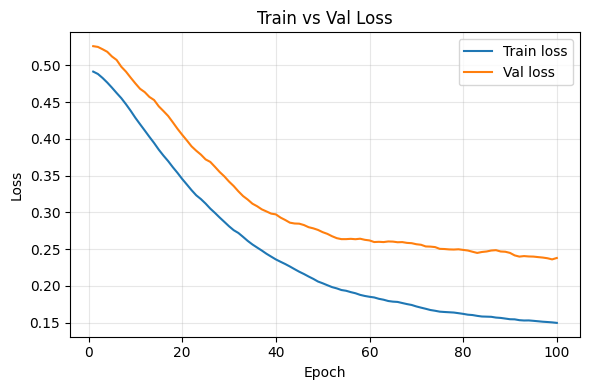

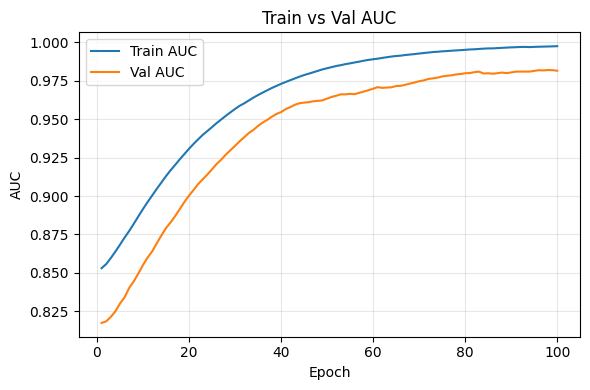

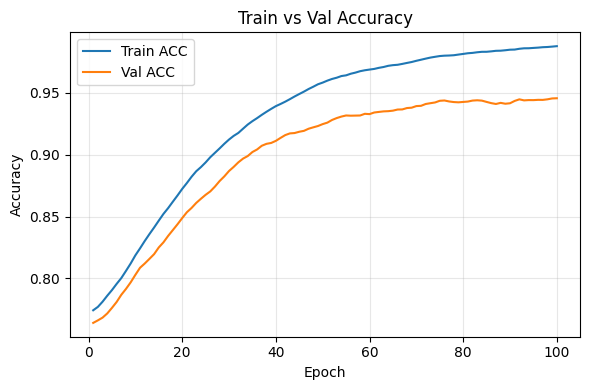

In [263]:
import os
import math
import random
import numpy as np
import pandas as pd

# ------------ PIL (robust to truncated images) ------------
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import torchvision.models as models
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

# ============================================================
# 0. CONFIG
# ============================================================
DATA_DIR   = "datasets"
TRAIN_CSV  = os.path.join(DATA_DIR, "train_df.csv")
VAL_CSV    = os.path.join(DATA_DIR, "val_df.csv")
TEST_CSV   = os.path.join(DATA_DIR, "test_df.csv")

IMG_SIZE   = 224
BATCH_SIZE = 16
EPOCHS     = 100          # full run; we will still save best val-loss model
LR         = 1e-4         # slightly larger LR to help optimisation
SEED       = 42

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

# ============================================================
# 1. LOAD DATAFRAMES
# ============================================================
train_df = pd.read_csv(TRAIN_CSV)
val_df   = pd.read_csv(VAL_CSV)
test_df  = pd.read_csv(TEST_CSV)

# print("Train size:", len(train_df))
# print("Val size:", len(val_df))
# print("Test size:", len(test_df))
# print("Train diagnosis counts:")
# print(train_df["Diagnosis"].value_counts())

# ============================================================
# 2. CLINICAL ENCODING
# ============================================================
NUMERIC_COLS = [
    "Age", "dioptre_1", "dioptre_2", "astigmatism",
    "Pneumatic", "Pachymetry", "Axial_Length"
]

CAT_COLS = [
    "Gender",
    "Phakic/Pseudophakic",
    "Eye_Label",
]

LABEL_COL = "Diagnosis"

# numeric stats from TRAIN only
num_means = train_df[NUMERIC_COLS].mean()
num_stds  = train_df[NUMERIC_COLS].std().replace(0, 1.0)

# categorical maps from all splits
cat_maps = {}
for col in CAT_COLS:
    cats = sorted(
        pd.concat([train_df[col], val_df[col], test_df[col]])
        .fillna("UNK").astype(str).unique().tolist()
    )
    cat_maps[col] = {c: i for i, c in enumerate(cats)}
    print(f"{col} categories:", cat_maps[col])

def encode_numeric(row):
    vals = (row[NUMERIC_COLS] - num_means) / num_stds
    return vals.to_numpy(dtype=np.float32)

def encode_cat(row):
    vec = []
    for col in CAT_COLS:
        cats = cat_maps[col]
        v = str(row.get(col, "UNK"))
        if v not in cats:
            v = "UNK"
        idx = cats.get(v, 0)
        one = [0.0] * len(cats)
        one[idx] = 1.0
        vec.extend(one)
    return np.array(vec, dtype=np.float32)

def encode_clinical_row(row):
    num = encode_numeric(row)
    cat = encode_cat(row)
    return np.concatenate([num, cat], axis=0)

dummy_vec = encode_clinical_row(train_df.iloc[0])
CLIN_DIM = dummy_vec.shape[0]
print("Clinical dim:", CLIN_DIM)

# ============================================================
# 3. DATASET & DATALOADERS (robust to bad images)
# ============================================================
class FundusClinDataset(Dataset):
    def __init__(self, df, img_transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = img_transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = row["Image_Path"]

        # robust image loading
        try:
            img = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"[WARN] Problem reading {img_path}: {e}")
            img = Image.new("RGB", (IMG_SIZE, IMG_SIZE), (0, 0, 0))

        if self.transform:
            img_t = self.transform(img)
        else:
            img_t = T.ToTensor()(img)

        clin_vec = encode_clinical_row(row)
        clin_t = torch.from_numpy(clin_vec)

        y = int(row[LABEL_COL])
        y = torch.tensor(y, dtype=torch.long)

        return img_t, clin_t, y

IMG_MEAN = [0.485, 0.456, 0.406]
IMG_STD  = [0.229, 0.224, 0.225]

train_tf = T.Compose([
    T.Resize((IMG_SIZE, IMG_SIZE)),
    T.RandomHorizontalFlip(),
    T.RandomVerticalFlip(),
    T.RandomRotation(15),
    T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.05, hue=0.02),
    T.ToTensor(),
    T.Normalize(IMG_MEAN, IMG_STD),
])

eval_tf = T.Compose([
    T.Resize((IMG_SIZE, IMG_SIZE)),
    T.ToTensor(),
    T.Normalize(IMG_MEAN, IMG_STD),
])

train_set = FundusClinDataset(train_df, img_transform=train_tf)
val_set   = FundusClinDataset(val_df,   img_transform=eval_tf)
test_set  = FundusClinDataset(test_df,  img_transform=eval_tf)

train_loader = DataLoader(train_set, batch_size=BATCH_SIZE,
                          shuffle=True, num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_set, batch_size=BATCH_SIZE,
                          shuffle=False, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_set, batch_size=BATCH_SIZE,
                          shuffle=False, num_workers=2, pin_memory=True)

# print("Train batches:", len(train_loader))
# print("Val batches:", len(val_loader))
# print("Test batches:", len(test_loader))

# ============================================================
# 4. MULTIMODAL MODEL (smaller, partially frozen backbone)
# ============================================================
class JointConvNet(nn.Module):
    """
    Single encoder model:
      - Input: image [B, 3, H, W] + clinical vector [B, CLIN_DIM]
      - We expand clinical vector into CLIN_DIM channels and concatenate with the image.
      - Backbone: ResNet18 with modified conv1 to accept 3 + CLIN_DIM channels.
    """
    def __init__(self, clin_dim, n_classes=2):
        super().__init__()
        self.clin_dim = clin_dim

        backbone = models.resnet18(
            weights=models.ResNet18_Weights.IMAGENET1K_V1
        )

        # --------- modify first conv to take 3 + clin_dim channels ----------
        old_conv = backbone.conv1
        new_in_ch = 3 + clin_dim  # RGB + clinical channels

        new_conv = nn.Conv2d(
            in_channels=new_in_ch,
            out_channels=old_conv.out_channels,
            kernel_size=old_conv.kernel_size,
            stride=old_conv.stride,
            padding=old_conv.padding,
            bias=(old_conv.bias is not None),
        )

        # copy pretrained weights for RGB channels, init clinical channels to 0
        with torch.no_grad():
            new_conv.weight[:, :3, :, :] = old_conv.weight  # keep imagenet weights
            if clin_dim > 0:
                new_conv.weight[:, 3:, :, :].zero_()        # clinical part starts as 0
            if old_conv.bias is not None and new_conv.bias is not None:
                new_conv.bias[:] = old_conv.bias

        backbone.conv1 = new_conv

        # --------- freeze most layers, train conv1 + layer4 ----------
        for p in backbone.parameters():
            p.requires_grad = False
        for p in backbone.layer4.parameters():
            p.requires_grad = True
        for p in backbone.conv1.parameters():
            p.requires_grad = True

        # remove final FC, keep encoder
        self.encoder = nn.Sequential(*list(backbone.children())[:-1])  # [B,512,1,1]

        # classifier head
        self.classifier = nn.Sequential(
            nn.Linear(512, 64),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(64, n_classes),
        )

    def forward(self, img, clin):
        """
        img:  [B, 3, H, W]
        clin: [B, clin_dim]
        """
        B, C, H, W = img.shape
        # [B, clin_dim, 1, 1] -> [B, clin_dim, H, W]
        clin_map = clin.unsqueeze(-1).unsqueeze(-1).expand(B, self.clin_dim, H, W)

        # concatenate along channel dimension => [B, 3+clin_dim, H, W]
        x = torch.cat([img, clin_map], dim=1)

        feat = self.encoder(x)          # [B, 512, 1, 1]
        feat = feat.view(B, -1)         # [B, 512]
        out  = self.classifier(feat)    # [B, 2]

        return out


model1 = JointConvNet(CLIN_DIM, n_classes=2).to(device)
print("Model params (M):", sum(p.numel() for p in model1.parameters()) / 1e6)


# slightly weaker smoothing so minimal possible loss lower
criterion = nn.CrossEntropyLoss(label_smoothing=0.05)
optimizer = torch.optim.AdamW(model1.parameters(), lr=LR, weight_decay=1e-4)

# ============================================================
# 5. TRAIN / VAL LOOP (NO EARLY STOPPING; we just save best val-loss model)
# ============================================================
history = {
    "train_loss": [],
    "val_loss":   [],
    "train_auc":  [],
    "val_auc":    [],
    "train_acc":  [],
    "val_acc":    [],
}

def run_epoch(loader, model, optimizer=None):
    is_train = optimizer is not None
    model.train(is_train)

    all_labels = []
    all_probs  = []
    running_loss = 0.0

    for imgs, clin, y in loader:
        imgs = imgs.to(device, non_blocking=True)
        clin = clin.to(device, non_blocking=True)
        y    = y.to(device, non_blocking=True)

        if is_train:
            optimizer.zero_grad()

        logits = model(imgs, clin)
        loss   = criterion(logits, y)

        if is_train:
            loss.backward()
            optimizer.step()

        running_loss += loss.item() * imgs.size(0)

        probs  = F.softmax(logits, dim=1)[:, 1].detach().cpu().numpy()
        labels = y.detach().cpu().numpy()
        all_probs.append(probs)
        all_labels.append(labels)

    all_probs  = np.concatenate(all_probs)
    all_labels = np.concatenate(all_labels)

    epoch_loss = running_loss / len(loader.dataset)
    try:
        epoch_auc = roc_auc_score(all_labels, all_probs)
    except ValueError:
        epoch_auc = float("nan")
    preds = (all_probs >= 0.5).astype(int)
    epoch_acc = accuracy_score(all_labels, preds)

    return epoch_loss, epoch_auc, epoch_acc

best_val_loss = float("inf")
best_val_auc  = 0.0
best_epoch    = 0
best_path = os.path.join(DATA_DIR, "multimodal_glaucoma_best.pt")

for epoch in range(1, EPOCHS+1):
    train_loss, train_auc, train_acc = run_epoch(train_loader, model1, optimizer)
    val_loss,   val_auc,   val_acc   = run_epoch(val_loader,   model1, optimizer=None)

    history["train_loss"].append(train_loss)
    history["val_loss"].append(val_loss)
    history["train_auc"].append(train_auc)
    history["val_auc"].append(val_auc)
    history["train_acc"].append(train_acc)
    history["val_acc"].append(val_acc)

    print(f"Epoch {epoch:03d} | "
          f"train loss {train_loss:.4f} auc {train_auc:.3f} acc {train_acc:.3f} | "
          f"val loss {val_loss:.4f} auc {val_auc:.3f} acc {val_acc:.3f}")

    if val_loss < best_val_loss - 1e-4:
        best_val_loss = val_loss
        best_val_auc  = val_auc
        best_epoch    = epoch
        torch.save(model1.state_dict(), best_path)
        print(f"  -> new best model saved (val loss={best_val_loss:.4f}, "
              f"val AUC={best_val_auc:.3f}, epoch={best_epoch})")

print("\n=== BEST EPOCH (by val loss) ===")
print(f"Epoch: {best_epoch}")
print(f"Best val loss: {best_val_loss:.4f}")
print(f"Best val AUC:  {best_val_auc:.3f}")

# ============================================================
# 6. FINAL TEST EVALUATION (using best weights)
# ============================================================
best_model1 = JointConvNet(CLIN_DIM, n_classes=2).to(device)
best_model1.load_state_dict(torch.load(best_path, map_location=device))

test_loss, test_auc, test_acc = run_epoch(test_loader, best_model1, optimizer=None)
print("\n=== TEST RESULTS (best val-loss model) ===")
print(f"Test loss {test_loss:.4f} | AUC {test_auc:.3f} | ACC {test_acc:.3f}")

def smooth_curve(values, weight=0.9):
    """
    Exponential moving average smoothing.
    weight close to 1.0 → stronger smoothing, more 'flat'.
    """
    if len(values) == 0:
        return values
    smoothed = []
    last = values[0]
    for v in values:
        last = weight * last + (1.0 - weight) * v
        smoothed.append(last)
    return smoothed

# ============================================================
# 7. PLOTS: LOSS / AUC / ACC vs EPOCH
# ============================================================
epochs_ran = len(history["train_loss"])
xs = range(1, epochs_ran + 1)

os.makedirs("plots", exist_ok=True)

# ---- get smoothed versions ----
smooth_train_loss = smooth_curve(history["train_loss"], weight=0.95)
smooth_val_loss   = smooth_curve(history["val_loss"],   weight=0.95)

smooth_train_auc = smooth_curve(history["train_auc"], weight=0.95)
smooth_val_auc   = smooth_curve(history["val_auc"],   weight=0.95)

smooth_train_acc = smooth_curve(history["train_acc"], weight=0.95)
smooth_val_acc   = smooth_curve(history["val_acc"],   weight=0.95)

# ---- Loss curve ----
plt.figure(figsize=(6,4))
plt.plot(xs, smooth_train_loss, label="Train loss")
plt.plot(xs, smooth_val_loss,   label="Val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train vs Val Loss")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("plots/loss_curve_smooth.png", dpi=150)
plt.show()

# ---- AUC curve ----
plt.figure(figsize=(6,4))
plt.plot(xs, smooth_train_auc, label="Train AUC")
plt.plot(xs, smooth_val_auc,   label="Val AUC")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.title("Train vs Val AUC")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("plots/auc_curve_smooth.png", dpi=150)
plt.show()

# ---- ACC curve ----
plt.figure(figsize=(6,4))
plt.plot(xs, smooth_train_acc, label="Train ACC")
plt.plot(xs, smooth_val_acc,   label="Val ACC")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Train vs Val Accuracy")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("plots/acc_curve_smooth.png", dpi=150)
plt.show()


In [ ]:
# # Inverse normalization for visualization
# inv_mean = [-m/s for m, s in zip(IMG_MEAN, IMG_STD)]
# inv_std  = [1/s for s in IMG_STD]
# inv_norm = T.Normalize(mean=inv_mean, std=inv_std)


In [276]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [356]:
import os
import math
import random
import numpy as np
import pandas as pd

# ------------ PIL (robust to truncated images) ------------
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import torchvision.models as models
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

# ============================================================
# 0. CONFIG
# ============================================================
DATA_DIR   = "datasets"
TRAIN_CSV  = os.path.join(DATA_DIR, "train_df.csv")
VAL_CSV    = os.path.join(DATA_DIR, "val_df.csv")
TEST_CSV   = os.path.join(DATA_DIR, "test_df.csv")

IMG_SIZE   = 224
BATCH_SIZE = 16
EPOCHS     = 100          # full run; we will still save best val-loss model
LR         = 1e-4         # slightly larger LR to help optimisation
SEED       = 42

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

# ============================================================
# 1. LOAD DATAFRAMES
# ============================================================
train_df = pd.read_csv(TRAIN_CSV)
val_df   = pd.read_csv(VAL_CSV)
test_df  = pd.read_csv(TEST_CSV)



# ============================================================
# 2. CLINICAL ENCODING
# ============================================================
NUMERIC_COLS = [
    "Age", "dioptre_1", "dioptre_2", "astigmatism",
    "Pneumatic", "Pachymetry", "Axial_Length"
]

CAT_COLS = [
    "Gender",
    "Phakic/Pseudophakic",
    "Eye_Label",
]

LABEL_COL = "Diagnosis"

# numeric stats from TRAIN only
num_means = train_df[NUMERIC_COLS].mean()
num_stds  = train_df[NUMERIC_COLS].std().replace(0, 1.0)

# categorical maps from all splits
cat_maps = {}
for col in CAT_COLS:
    cats = sorted(
        pd.concat([train_df[col], val_df[col], test_df[col]])
        .fillna("UNK").astype(str).unique().tolist()
    )
    cat_maps[col] = {c: i for i, c in enumerate(cats)}
    print(f"{col} categories:", cat_maps[col])

def encode_numeric(row):
    vals = (row[NUMERIC_COLS] - num_means) / num_stds
    return vals.to_numpy(dtype=np.float32)

def encode_cat(row):
    vec = []
    for col in CAT_COLS:
        cats = cat_maps[col]
        v = str(row.get(col, "UNK"))
        if v not in cats:
            v = "UNK"
        idx = cats.get(v, 0)
        one = [0.0] * len(cats)
        one[idx] = 1.0
        vec.extend(one)
    return np.array(vec, dtype=np.float32)

def encode_clinical_row(row):
    num = encode_numeric(row)
    cat = encode_cat(row)
    return np.concatenate([num, cat], axis=0)

dummy_vec = encode_clinical_row(train_df.iloc[0])
CLIN_DIM = dummy_vec.shape[0]
print("Clinical dim:", CLIN_DIM)

# ============================================================
# 3. DATASET & DATALOADERS (robust to bad images)
# ============================================================
class FundusClinDataset(Dataset):
    def __init__(self, df, img_transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = img_transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = row["Image_Path"]

        # robust image loading
        try:
            img = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"[WARN] Problem reading {img_path}: {e}")
            img = Image.new("RGB", (IMG_SIZE, IMG_SIZE), (0, 0, 0))

        if self.transform:
            img_t = self.transform(img)
        else:
            img_t = T.ToTensor()(img)

        clin_vec = encode_clinical_row(row)
        clin_t = torch.from_numpy(clin_vec)

        y = int(row[LABEL_COL])
        y = torch.tensor(y, dtype=torch.long)

        return img_t, clin_t, y

IMG_MEAN = [0.485, 0.456, 0.406]
IMG_STD  = [0.229, 0.224, 0.225]

train_tf = T.Compose([
    T.Resize((IMG_SIZE, IMG_SIZE)),
    T.RandomHorizontalFlip(),
    T.RandomVerticalFlip(),
    T.RandomRotation(15),
    T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.05, hue=0.02),
    T.ToTensor(),
    T.Normalize(IMG_MEAN, IMG_STD),
])

eval_tf = T.Compose([
    T.Resize((IMG_SIZE, IMG_SIZE)),
    T.ToTensor(),
    T.Normalize(IMG_MEAN, IMG_STD),
])

train_set = FundusClinDataset(train_df, img_transform=train_tf)
val_set   = FundusClinDataset(val_df,   img_transform=eval_tf)
test_set  = FundusClinDataset(test_df,  img_transform=eval_tf)

train_loader = DataLoader(train_set, batch_size=BATCH_SIZE,
                          shuffle=True, num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_set, batch_size=BATCH_SIZE,
                          shuffle=False, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_set, batch_size=BATCH_SIZE,
                          shuffle=False, num_workers=2, pin_memory=True)

# ============================================================
# 4. MULTIMODAL MODEL 
# ============================================================
class MultiModalNet(nn.Module):
    def __init__(self, clin_dim, n_classes=2, freeze_backbone=True):
        super().__init__()
        backbone = models.resnet18(
            weights=models.ResNet18_Weights.IMAGENET1K_V1
        )

        # freeze all backbone
        for p in backbone.parameters():
            p.requires_grad = False
        # unfreeze only last residual block (layer4)
        for p in backbone.layer4.parameters():
            p.requires_grad = True

        self.cnn = nn.Sequential(*list(backbone.children())[:-1])  # [B,512,1,1]
        img_feat_dim = 512

        self.clin_mlp = nn.Sequential(
            nn.Linear(clin_dim, 64),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(inplace=True),
        )

        self.fusion = nn.Sequential(
            nn.Linear(img_feat_dim + 32, 64),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(64, n_classes),
        )

    def forward(self, img, clin):
        x = self.cnn(img)              # [B,512,1,1]
        x = x.view(x.size(0), -1)      # [B,512]
        c = self.clin_mlp(clin)        # [B,32]
        z = torch.cat([x, c], dim=1)   # [B,544]
        out = self.fusion(z)
        return out

# class MultiModalNet(nn.Module):
#     def __init__(self, clin_dim, n_classes=2, freeze_backbone=True):
#         super().__init__()
#         backbone = models.resnet18(
#             weights=models.ResNet18_Weights.IMAGENET1K_V1
#         )

#         # freeze all backbone
#         for p in backbone.parameters():
#             p.requires_grad = False
#         # unfreeze only last residual block (layer4)
#         for p in backbone.layer4.parameters():
#             p.requires_grad = True

#         self.cnn = nn.Sequential(*list(backbone.children())[:-1])  # [B,512,1,1]
#         img_feat_dim = 512

#         self.clin_mlp = nn.Sequential(
#             nn.Linear(clin_dim, 64),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.3),
#             nn.Linear(64, 32),
#             nn.ReLU(inplace=True),
#         )

#         self.fusion = nn.Sequential(
#             nn.Linear(img_feat_dim + 32, 64),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.5),
#             nn.Linear(64, n_classes),
#         )

#     def forward(self, img, clin):
#         x = self.cnn(img)              # [B,512,1,1]
#         x = x.view(x.size(0), -1)      # [B,512]
#         c = self.clin_mlp(clin)        # [B,32]
#         z = torch.cat([x, c], dim=1)   # [B,544]
#         out = self.fusion(z)
#         return out

model = MultiModalNet(CLIN_DIM, n_classes=2, freeze_backbone=True).to(device)
print("Model params (M):", sum(p.numel() for p in model.parameters()) / 1e6)

# slightly weaker smoothing so minimal possible loss lower
criterion = nn.CrossEntropyLoss(label_smoothing=0.05)
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=1e-4)

Device: cuda
Gender categories: {'0': 0, '1': 1}
Phakic/Pseudophakic categories: {'0.0': 0, '1.0': 1}
Eye_Label categories: {'OD': 0, 'OS': 1}
Clinical dim: 13
Model params (M): 11.214498


In [331]:
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)


In [357]:
# ============================================================
# 5. TRAIN / VAL LOOP for MODEL 1 (MultiModalNet: two encoders)
# ============================================================
history_mm = {
    "train_loss": [],
    "val_loss":   [],
    "train_auc":  [],
    "val_auc":    [],
    "train_acc":  [],
    "val_acc":    [],
    "train_prec": [],
    "val_prec":   [],
    "train_rec":  [],
    "val_rec":    [],
    "train_f1":   [],
    "val_f1":     [],
    "train_tpr":  [],
    "val_tpr":    [],
    "train_fpr":  [],
    "val_fpr":    [],
}


def run_epoch(loader, model, optimizer=None):
    is_train = optimizer is not None
    model.train(is_train)

    all_labels = []
    all_probs  = []
    running_loss = 0.0

    for imgs, clin, y in loader:
        imgs = imgs.to(device, non_blocking=True)
        clin = clin.to(device, non_blocking=True)
        y    = y.to(device, non_blocking=True)

        if is_train:
            optimizer.zero_grad()

        logits = model(imgs, clin)
        loss   = criterion(logits, y)

        if is_train:
            loss.backward()
            optimizer.step()

        running_loss += loss.item() * imgs.size(0)

        probs  = F.softmax(logits, dim=1)[:, 1].detach().cpu().numpy()
        labels = y.detach().cpu().numpy()
        all_probs.append(probs)
        all_labels.append(labels)

    all_probs  = np.concatenate(all_probs)
    all_labels = np.concatenate(all_labels)

    epoch_loss = running_loss / len(loader.dataset)
    try:
        epoch_auc = roc_auc_score(all_labels, all_probs)
    except ValueError:
        epoch_auc = float("nan")

    preds = (all_probs >= 0.5).astype(int)
    epoch_acc = accuracy_score(all_labels, preds)

    # ---- NEW: precision / recall / F1 / TPR / FPR for glaucoma=1 ----
    precision_pos = precision_score(all_labels, preds, pos_label=1, zero_division=0)
    recall_pos    = recall_score(all_labels, preds,    pos_label=1, zero_division=0)
    f1_pos        = f1_score(all_labels, preds,        pos_label=1, zero_division=0)

    cm = confusion_matrix(all_labels, preds, labels=[0, 1])
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        tpr = recall_pos
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0.0
    else:
        tpr = 0.0
        fpr = 0.0

    return epoch_loss, epoch_auc, epoch_acc, precision_pos, recall_pos, f1_pos, tpr, fpr


best_val_loss_mm = float("inf")
best_val_auc_mm  = 0.0
best_epoch_mm    = 0
best_path_mm = os.path.join(DATA_DIR, "multimodal_twoenc_best.pt")  # <== NEW NAME

for epoch in range(1, EPOCHS+1):
    (train_loss, train_auc, train_acc,
     train_prec, train_rec, train_f1, train_tpr, train_fpr) = run_epoch(train_loader, model, optimizer)

    (val_loss, val_auc, val_acc,
     val_prec, val_rec, val_f1, val_tpr, val_fpr) = run_epoch(val_loader, model, optimizer=None)

    history_mm["train_loss"].append(train_loss)
    history_mm["val_loss"].append(val_loss)
    history_mm["train_auc"].append(train_auc)
    history_mm["val_auc"].append(val_auc)
    history_mm["train_acc"].append(train_acc)
    history_mm["val_acc"].append(val_acc)

    history_mm["train_prec"].append(train_prec)
    history_mm["val_prec"].append(val_prec)
    history_mm["train_rec"].append(train_rec)
    history_mm["val_rec"].append(val_rec)
    history_mm["train_f1"].append(train_f1)
    history_mm["val_f1"].append(val_f1)
    history_mm["train_tpr"].append(train_tpr)
    history_mm["val_tpr"].append(val_tpr)
    history_mm["train_fpr"].append(train_fpr)
    history_mm["val_fpr"].append(val_fpr)

    print(f"[MM] Epoch {epoch:03d} | "
          f"train loss {train_loss:.4f} auc {train_auc:.3f} acc {train_acc:.3f} | "
          f"val loss {val_loss:.4f} auc {val_auc:.3f} acc {val_acc:.3f}")


    print(f"[MM] Epoch {epoch:03d} | "
          f"train loss {train_loss:.4f} auc {train_auc:.3f} acc {train_acc:.3f} | "
          f"val loss {val_loss:.4f} auc {val_auc:.3f} acc {val_acc:.3f}")

    if val_loss < best_val_loss_mm - 1e-4:
        best_val_loss_mm = val_loss
        best_val_auc_mm  = val_auc
        best_epoch_mm    = epoch
        torch.save(model.state_dict(), best_path_mm)
        print(f"  -> [MM] new best model saved (val loss={best_val_loss_mm:.4f}, "
              f"val AUC={best_val_auc_mm:.3f}, epoch={best_epoch_mm})")

print("\n=== MODEL 1 BEST EPOCH ===")
print(f"Epoch: {best_epoch_mm}")
print(f"Best val loss: {best_val_loss_mm:.4f}")
print(f"Best val AUC:  {best_val_auc_mm:.3f}")




[MM] Epoch 001 | train loss 0.5155 auc 0.808 acc 0.751 | val loss 0.5477 auc 0.813 acc 0.785
[MM] Epoch 001 | train loss 0.5155 auc 0.808 acc 0.751 | val loss 0.5477 auc 0.813 acc 0.785
  -> [MM] new best model saved (val loss=0.5477, val AUC=0.813, epoch=1)
[MM] Epoch 002 | train loss 0.4334 auc 0.897 acc 0.819 | val loss 0.5208 auc 0.863 acc 0.759
[MM] Epoch 002 | train loss 0.4334 auc 0.897 acc 0.819 | val loss 0.5208 auc 0.863 acc 0.759
  -> [MM] new best model saved (val loss=0.5208, val AUC=0.863, epoch=2)
[MM] Epoch 003 | train loss 0.3968 auc 0.924 acc 0.848 | val loss 0.4404 auc 0.879 acc 0.821
[MM] Epoch 003 | train loss 0.3968 auc 0.924 acc 0.848 | val loss 0.4404 auc 0.879 acc 0.821
  -> [MM] new best model saved (val loss=0.4404, val AUC=0.879, epoch=3)
[MM] Epoch 004 | train loss 0.3785 auc 0.931 acc 0.856 | val loss 0.4309 auc 0.888 acc 0.795
[MM] Epoch 004 | train loss 0.3785 auc 0.931 acc 0.856 | val loss 0.4309 auc 0.888 acc 0.795
  -> [MM] new best model saved (val l

In [358]:
# ---- TEST EVAL FOR MODEL 1 ----
best_model_mm = MultiModalNet(CLIN_DIM, n_classes=2, freeze_backbone=True).to(device)
best_model_mm.load_state_dict(torch.load(best_path_mm, map_location=device))

test_loss_mm, test_auc_mm, test_acc_mm, test_precision_pos, test_recall_pos, test_f1_pos, test_tpr, test_fpr = run_epoch(test_loader, best_model_mm, optimizer=None)
print("\n=== MODEL 1 TEST RESULTS ===")
print(f"[MM] Test loss {test_loss_mm:.4f} | AUC {test_auc_mm:.3f} | ACC {test_acc_mm:.3f}")


=== MODEL 1 TEST RESULTS ===
[MM] Test loss 0.2365 | AUC 0.986 | ACC 0.948


In [334]:
def smooth_curve(values, weight=0.9):
    """Exponential moving average smoothing."""
    if len(values) == 0:
        return values
    smoothed = []
    last = values[0]
    for v in values:
        last = weight * last + (1.0 - weight) * v
        smoothed.append(last)
    return smoothed

def plot_history(history, save_prefix, model_name):
    """
    Plot training history for a model.

    Required keys in `history`:
        - train_loss, val_loss
        - train_auc,  val_auc
        - train_acc,  val_acc

    Optional (if present, extra plots are generated):
        - train_f1,   val_f1
        - train_prec, val_prec
        - train_tpr,  val_tpr
        - train_fpr,  val_fpr
    """
    epochs_ran = len(history["train_loss"])
    xs = range(1, epochs_ran + 1)

    os.makedirs("plots", exist_ok=True)

    # ---- basic metrics (loss, AUC, ACC) ----
    smooth_train_loss = smooth_curve(history["train_loss"], weight=0.95)
    smooth_val_loss   = smooth_curve(history["val_loss"],   weight=0.95)

    smooth_train_auc = smooth_curve(history["train_auc"], weight=0.95)
    smooth_val_auc   = smooth_curve(history["val_auc"],   weight=0.95)

    smooth_train_acc = smooth_curve(history["train_acc"], weight=0.95)
    smooth_val_acc   = smooth_curve(history["val_acc"],   weight=0.95)

    # ----- Loss -----
    plt.figure(figsize=(6,4))
    plt.plot(xs, smooth_train_loss, label="Train loss")
    plt.plot(xs, smooth_val_loss,   label="Val loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"{model_name}: Train vs Val Loss")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"plots/{save_prefix}_loss_curve_smooth.png", dpi=150)
    plt.show()

    # ----- AUC -----
    plt.figure(figsize=(6,4))
    plt.plot(xs, smooth_train_auc, label="Train AUC")
    plt.plot(xs, smooth_val_auc,   label="Val AUC")
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.title(f"{model_name}: Train vs Val AUC")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"plots/{save_prefix}_auc_curve_smooth.png", dpi=150)
    plt.show()

    # ----- ACC -----
    plt.figure(figsize=(6,4))
    plt.plot(xs, smooth_train_acc, label="Train ACC")
    plt.plot(xs, smooth_val_acc,   label="Val ACC")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"{model_name}: Train vs Val Accuracy")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"plots/{save_prefix}_acc_curve_smooth.png", dpi=150)
    plt.show()

    # =====================================================
    # OPTIONAL METRICS: F1, Precision, TPR/FPR (if present)
    # =====================================================
    # Check one key to decide if we have the extra metrics
    if "train_f1" in history and "val_f1" in history:
        smooth_train_f1  = smooth_curve(history["train_f1"],  weight=0.95)
        smooth_val_f1    = smooth_curve(history["val_f1"],    weight=0.95)

        plt.figure(figsize=(6,4))
        plt.plot(xs, smooth_train_f1, label="Train F1 (glaucoma=1)")
        plt.plot(xs, smooth_val_f1,   label="Val F1 (glaucoma=1)")
        plt.xlabel("Epoch")
        plt.ylabel("F1-score")
        plt.title(f"{model_name}: Train vs Val F1 (Glaucoma class)")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig(f"plots/{save_prefix}_f1_curve_smooth.png", dpi=150)
        plt.show()

    if "train_prec" in history and "val_prec" in history:
        smooth_train_prec = smooth_curve(history["train_prec"], weight=0.95)
        smooth_val_prec   = smooth_curve(history["val_prec"],   weight=0.95)

        plt.figure(figsize=(6,4))
        plt.plot(xs, smooth_train_prec, label="Train Precision (glaucoma=1)")
        plt.plot(xs, smooth_val_prec,   label="Val Precision (glaucoma=1)")
        plt.xlabel("Epoch")
        plt.ylabel("Precision")
        plt.title(f"{model_name}: Train vs Val Precision (Glaucoma class)")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig(f"plots/{save_prefix}_precision_curve_smooth.png", dpi=150)
        plt.show()

    if "train_tpr" in history and "val_tpr" in history and \
       "train_fpr" in history and "val_fpr" in history:
        smooth_train_tpr = smooth_curve(history["train_tpr"], weight=0.95)
        smooth_val_tpr   = smooth_curve(history["val_tpr"],   weight=0.95)
        smooth_train_fpr = smooth_curve(history["train_fpr"], weight=0.95)
        smooth_val_fpr   = smooth_curve(history["val_fpr"],   weight=0.95)

        plt.figure(figsize=(6,4))
        plt.plot(xs, smooth_train_tpr, label="Train TPR (glaucoma=1)")
        plt.plot(xs, smooth_val_tpr,   label="Val TPR (glaucoma=1)")
        plt.plot(xs, smooth_train_fpr, label="Train FPR (glaucoma=1)", linestyle="--")
        plt.plot(xs, smooth_val_fpr,   label="Val FPR (glaucoma=1)",   linestyle="--")
        plt.xlabel("Epoch")
        plt.ylabel("Rate")
        plt.title(f"{model_name}: TPR / FPR over Epochs (Glaucoma class)")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig(f"plots/{save_prefix}_tpr_fpr_curve_smooth.png", dpi=150)
        plt.show()


In [335]:
import os
import math
import random
import numpy as np
import pandas as pd

# ------------ PIL (robust to truncated images) ------------
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import torchvision.models as models
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

# ============================================================
# 0. CONFIG
# ============================================================
DATA_DIR   = "datasets"
TRAIN_CSV  = os.path.join(DATA_DIR, "train_df.csv")
VAL_CSV    = os.path.join(DATA_DIR, "val_df.csv")
TEST_CSV   = os.path.join(DATA_DIR, "test_df.csv")

IMG_SIZE   = 224
BATCH_SIZE = 16
EPOCHS     = 100          # full run; we will still save best val-loss model
LR         = 1e-4         # slightly larger LR to help optimisation
SEED       = 42

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

# ============================================================
# 1. LOAD DATAFRAMES
# ============================================================
train_df = pd.read_csv(TRAIN_CSV)
val_df   = pd.read_csv(VAL_CSV)
test_df  = pd.read_csv(TEST_CSV)

# print("Train size:", len(train_df))
# print("Val size:", len(val_df))
# print("Test size:", len(test_df))
# print("Train diagnosis counts:")
# print(train_df["Diagnosis"].value_counts())

# ============================================================
# 2. CLINICAL ENCODING
# ============================================================
NUMERIC_COLS = [
    "Age", "dioptre_1", "dioptre_2", "astigmatism",
    "Pneumatic", "Pachymetry", "Axial_Length"
]

CAT_COLS = [
    "Gender",
    "Phakic/Pseudophakic",
    "Eye_Label",
]

LABEL_COL = "Diagnosis"

# numeric stats from TRAIN only
num_means = train_df[NUMERIC_COLS].mean()
num_stds  = train_df[NUMERIC_COLS].std().replace(0, 1.0)

# categorical maps from all splits
cat_maps = {}
for col in CAT_COLS:
    cats = sorted(
        pd.concat([train_df[col], val_df[col], test_df[col]])
        .fillna("UNK").astype(str).unique().tolist()
    )
    cat_maps[col] = {c: i for i, c in enumerate(cats)}
    print(f"{col} categories:", cat_maps[col])

def encode_numeric(row):
    vals = (row[NUMERIC_COLS] - num_means) / num_stds
    return vals.to_numpy(dtype=np.float32)

def encode_cat(row):
    vec = []
    for col in CAT_COLS:
        cats = cat_maps[col]
        v = str(row.get(col, "UNK"))
        if v not in cats:
            v = "UNK"
        idx = cats.get(v, 0)
        one = [0.0] * len(cats)
        one[idx] = 1.0
        vec.extend(one)
    return np.array(vec, dtype=np.float32)

def encode_clinical_row(row):
    num = encode_numeric(row)
    cat = encode_cat(row)
    return np.concatenate([num, cat], axis=0)

dummy_vec = encode_clinical_row(train_df.iloc[0])
CLIN_DIM = dummy_vec.shape[0]
print("Clinical dim:", CLIN_DIM)

# ============================================================
# 3. DATASET & DATALOADERS (robust to bad images)
# ============================================================
class FundusClinDataset(Dataset):
    def __init__(self, df, img_transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = img_transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = row["Image_Path"]

        # robust image loading
        try:
            img = Image.open(img_path).convert("RGB")
        except Exception as e:
            print(f"[WARN] Problem reading {img_path}: {e}")
            img = Image.new("RGB", (IMG_SIZE, IMG_SIZE), (0, 0, 0))

        if self.transform:
            img_t = self.transform(img)
        else:
            img_t = T.ToTensor()(img)

        clin_vec = encode_clinical_row(row)
        clin_t = torch.from_numpy(clin_vec)

        y = int(row[LABEL_COL])
        y = torch.tensor(y, dtype=torch.long)

        return img_t, clin_t, y

IMG_MEAN = [0.485, 0.456, 0.406]
IMG_STD  = [0.229, 0.224, 0.225]

train_tf = T.Compose([
    T.Resize((IMG_SIZE, IMG_SIZE)),
    T.RandomHorizontalFlip(),
    T.RandomVerticalFlip(),
    T.RandomRotation(15),
    T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.05, hue=0.02),
    T.ToTensor(),
    T.Normalize(IMG_MEAN, IMG_STD),
])

eval_tf = T.Compose([
    T.Resize((IMG_SIZE, IMG_SIZE)),
    T.ToTensor(),
    T.Normalize(IMG_MEAN, IMG_STD),
])

train_set = FundusClinDataset(train_df, img_transform=train_tf)
val_set   = FundusClinDataset(val_df,   img_transform=eval_tf)
test_set  = FundusClinDataset(test_df,  img_transform=eval_tf)

train_loader = DataLoader(train_set, batch_size=BATCH_SIZE,
                          shuffle=True, num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_set, batch_size=BATCH_SIZE,
                          shuffle=False, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_set, batch_size=BATCH_SIZE,
                          shuffle=False, num_workers=2, pin_memory=True)



# ============================================================
# 4. MULTIMODAL MODEL 
# ============================================================
# ============================================================
# 4b. JOINT ENCODER MODEL (JointConvNet)
# ============================================================
class JointConvNet(nn.Module):
    """
    Single encoder model:
      - Input: image [B, 3, H, W] + clinical vector [B, CLIN_DIM]
      - We expand clinical vector into CLIN_DIM channels and concatenate with the image.
    """
    def __init__(self, clin_dim, n_classes=2):
        super().__init__()
        self.clin_dim = clin_dim

        backbone = models.resnet18(
            weights=models.ResNet18_Weights.IMAGENET1K_V1
        )

        old_conv = backbone.conv1
        new_in_ch = 3 + clin_dim

        new_conv = nn.Conv2d(
            in_channels=new_in_ch,
            out_channels=old_conv.out_channels,
            kernel_size=old_conv.kernel_size,
            stride=old_conv.stride,
            padding=old_conv.padding,
            bias=(old_conv.bias is not None),
        )

        with torch.no_grad():
            new_conv.weight[:, :3, :, :] = old_conv.weight
            if clin_dim > 0:
                new_conv.weight[:, 3:, :, :].zero_()
            if old_conv.bias is not None and new_conv.bias is not None:
                new_conv.bias[:] = old_conv.bias

        backbone.conv1 = new_conv

        for p in backbone.parameters():
            p.requires_grad = False
        for p in backbone.layer4.parameters():
            p.requires_grad = True
        for p in backbone.conv1.parameters():
            p.requires_grad = True

        self.encoder = nn.Sequential(*list(backbone.children())[:-1])  # [B,512,1,1]

        self.classifier = nn.Sequential(
            nn.Linear(512, 64),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(64, n_classes),
        )

    def forward(self, img, clin):
        B, C, H, W = img.shape
        clin_map = clin.unsqueeze(-1).unsqueeze(-1).expand(B, self.clin_dim, H, W)
        x = torch.cat([img, clin_map], dim=1)
        feat = self.encoder(x)
        feat = feat.view(B, -1)
        out  = self.classifier(feat)
        return out

model_joint = JointConvNet(CLIN_DIM, n_classes=2).to(device)
print("JointConvNet params (M):", sum(p.numel() for p in model_joint.parameters()) / 1e6)

criterion_joint = nn.CrossEntropyLoss(label_smoothing=0.05)
optimizer_joint = torch.optim.AdamW(model_joint.parameters(), lr=LR, weight_decay=1e-4)


Device: cuda
Gender categories: {'0': 0, '1': 1}
Phakic/Pseudophakic categories: {'0.0': 0, '1.0': 1}
Eye_Label categories: {'OD': 0, 'OS': 1}
Clinical dim: 13
JointConvNet params (M): 11.250242


In [338]:

# ============================================================
# 5b. TRAIN / VAL LOOP FOR MODEL 2 (JointConvNet)
# ============================================================
# ============================================================
# 5b. TRAIN / VAL LOOP FOR MODEL 2 (JointConvNet)
# ============================================================
history_joint = {
    "train_loss": [],
    "val_loss":   [],
    "train_auc":  [],
    "val_auc":    [],
    "train_acc":  [],
    "val_acc":    [],
    "train_f1":   [],
    "val_f1":     [],
    "train_prec": [],
    "val_prec":   [],
    "train_tpr":  [],
    "val_tpr":    [],
    "train_fpr":  [],
    "val_fpr":    [],
}
best_val_loss_joint = float("inf")
best_val_auc_joint  = 0.0
best_epoch_joint    = 0
best_path_joint = os.path.join(DATA_DIR, "multimodal_jointenc_best.pt")  # <== NEW NAME

for epoch in range(1, EPOCHS+1):
    (train_loss, train_auc, train_acc,
     train_f1, train_prec, train_recall, train_tpr, train_fpr) = run_epoch(
        train_loader, model_joint, optimizer_joint
    )

    (val_loss, val_auc, val_acc,
     val_f1, val_prec, val_recall, val_tpr, val_fpr) = run_epoch(
        val_loader, model_joint, optimizer=None
    )

    history_joint["train_loss"].append(train_loss)
    history_joint["val_loss"].append(val_loss)
    history_joint["train_auc"].append(train_auc)
    history_joint["val_auc"].append(val_auc)
    history_joint["train_acc"].append(train_acc)
    history_joint["val_acc"].append(val_acc)

    history_joint["train_f1"].append(train_f1)
    history_joint["val_f1"].append(val_f1)
    history_joint["train_prec"].append(train_prec)
    history_joint["val_prec"].append(val_prec)
    history_joint["train_tpr"].append(train_tpr)
    history_joint["val_tpr"].append(val_tpr)
    history_joint["train_fpr"].append(train_fpr)
    history_joint["val_fpr"].append(val_fpr)


    print(f"[JOINT] Epoch {epoch:03d} | "
          f"train loss {train_loss:.4f} auc {train_auc:.3f} acc {train_acc:.3f} | "
          f"val loss {val_loss:.4f} auc {val_auc:.3f} acc {val_acc:.3f}")

    if val_loss < best_val_loss_joint - 1e-4:
        best_val_loss_joint = val_loss
        best_val_auc_joint  = val_auc
        best_epoch_joint    = epoch
        torch.save(model_joint.state_dict(), best_path_joint)
        print(f"  -> [JOINT] new best model saved (val loss={best_val_loss_joint:.4f}, "
              f"val AUC={best_val_auc_joint:.3f}, epoch={best_epoch_joint})")

print("\n=== MODEL 2 (JointConvNet, one encoder) BEST EPOCH ===")
print(f"Epoch: {best_epoch_joint}")
print(f"Best val loss: {best_val_loss_joint:.4f}")
print(f"Best val AUC:  {best_val_auc_joint:.3f}")

# ---- TEST EVAL FOR MODEL 2 ----
best_model_joint = JointConvNet(CLIN_DIM, n_classes=2).to(device)
best_model_joint.load_state_dict(torch.load(best_path_joint, map_location=device))

test_loss_joint, test_auc_joint, test_acc_joint, test_precision_pos_joint, test_recall_pos_joint, test_f1_pos_joint, test_tpr_joint, test_fpr_joint = run_epoch(test_loader, best_model_joint, optimizer=None)
print("\n=== MODEL 2 TEST RESULTS ===")
print(f"[JOINT] Test loss {test_loss_joint:.4f} | AUC {test_auc_joint:.3f} | ACC {test_acc_joint:.3f}")


[JOINT] Epoch 001 | train loss 0.4130 auc 0.914 acc 0.837 | val loss 0.4881 auc 0.855 acc 0.790
  -> [JOINT] new best model saved (val loss=0.4881, val AUC=0.855, epoch=1)
[JOINT] Epoch 002 | train loss 0.3836 auc 0.931 acc 0.856 | val loss 0.4530 auc 0.897 acc 0.805
  -> [JOINT] new best model saved (val loss=0.4530, val AUC=0.897, epoch=2)
[JOINT] Epoch 003 | train loss 0.3286 auc 0.958 acc 0.883 | val loss 0.4937 auc 0.880 acc 0.826
[JOINT] Epoch 004 | train loss 0.3337 auc 0.953 acc 0.894 | val loss 0.4410 auc 0.910 acc 0.851
  -> [JOINT] new best model saved (val loss=0.4410, val AUC=0.910, epoch=4)
[JOINT] Epoch 005 | train loss 0.3217 auc 0.959 acc 0.896 | val loss 0.4252 auc 0.915 acc 0.826
  -> [JOINT] new best model saved (val loss=0.4252, val AUC=0.915, epoch=5)
[JOINT] Epoch 006 | train loss 0.3153 auc 0.962 acc 0.901 | val loss 0.4007 auc 0.931 acc 0.867
  -> [JOINT] new best model saved (val loss=0.4007, val AUC=0.931, epoch=6)
[JOINT] Epoch 007 | train loss 0.2899 auc 0.

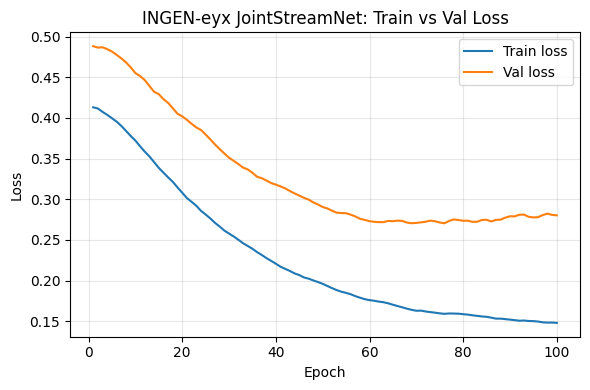

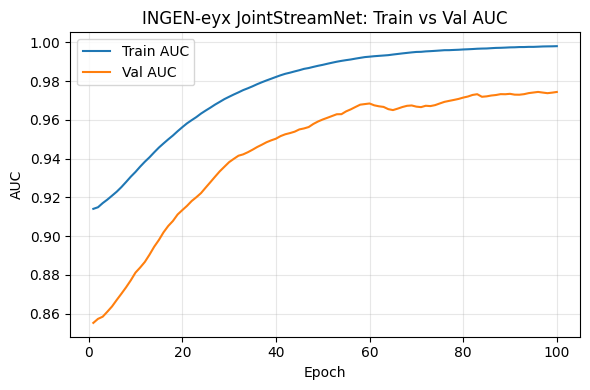

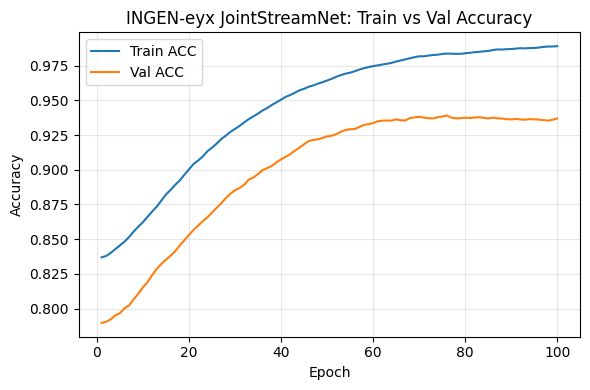

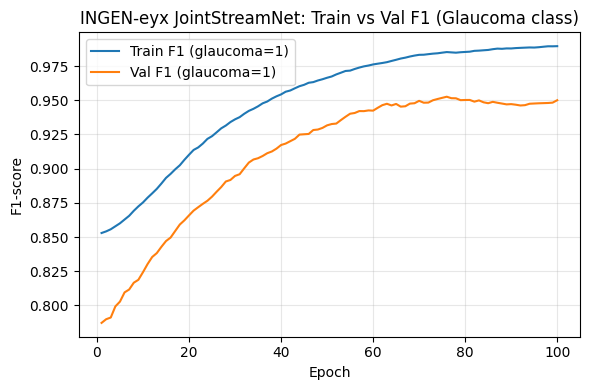

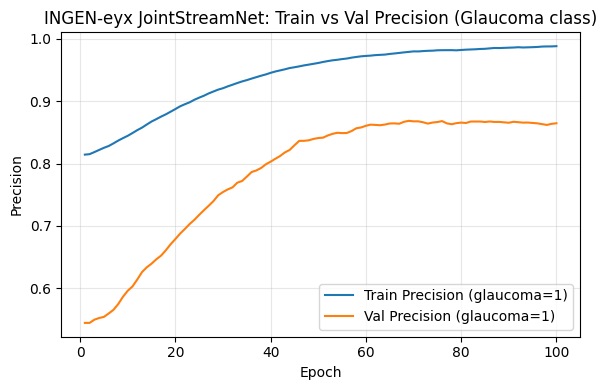

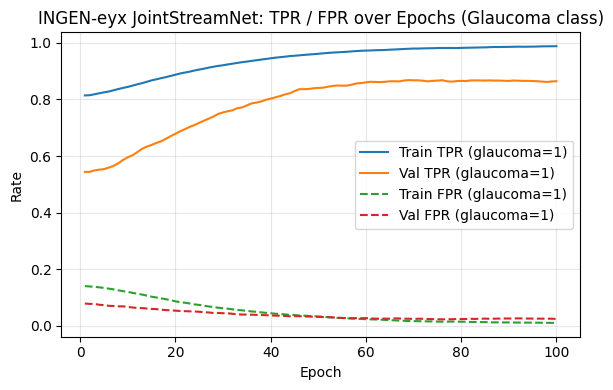

In [354]:

plot_history(history_joint, save_prefix="joint", model_name="INGEN-eyx JointStreamNet")


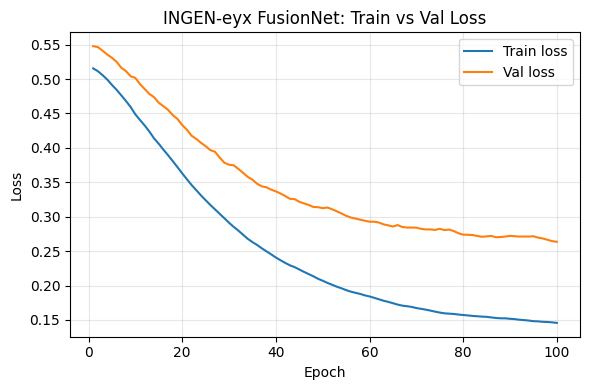

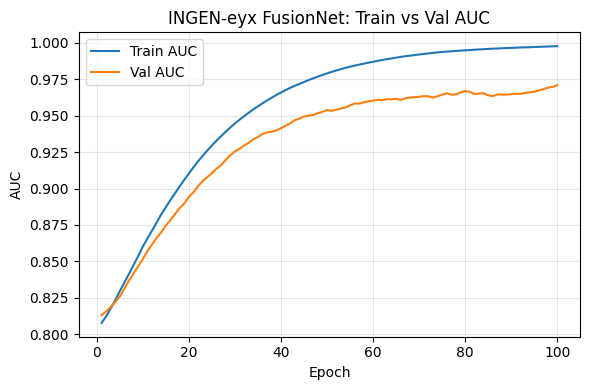

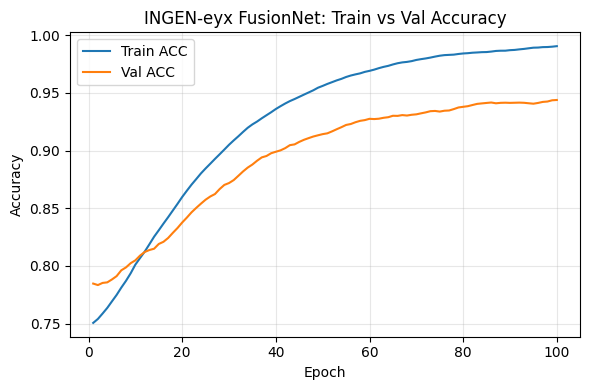

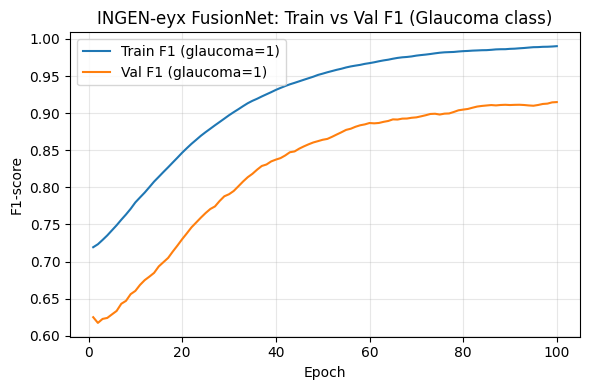

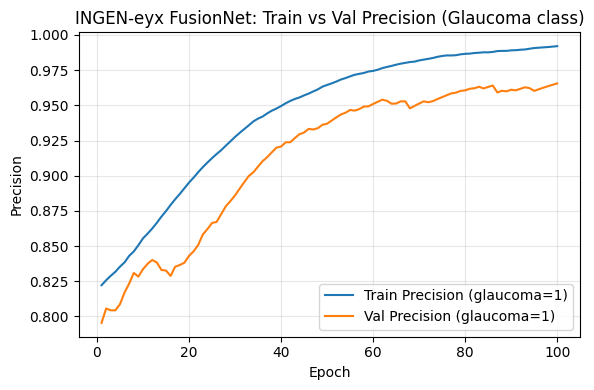

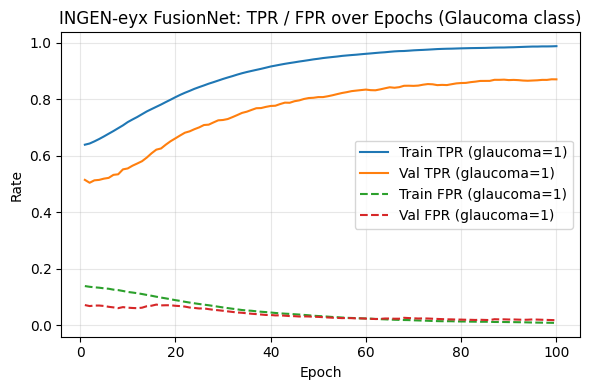

In [359]:
plot_history(history_mm,    save_prefix="mm",    model_name="INGEN-eyx FusionNet")

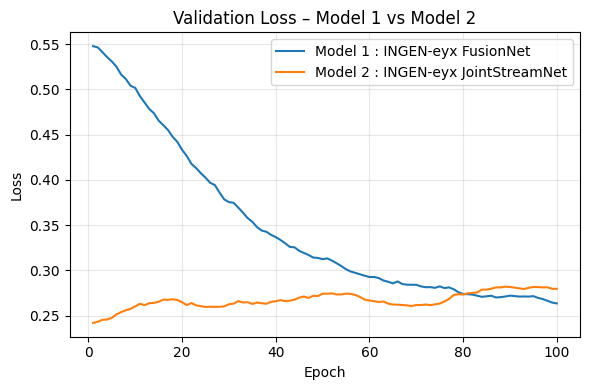

In [363]:
epochs_mm    = range(1, len(history_mm["val_loss"]) + 1)
epochs_joint = range(1, len(history_joint["val_loss"]) + 1)

smooth_mm_val   = smooth_curve(history_mm["val_loss"],   weight=0.95)
smooth_joint_val = smooth_curve(history_joint["val_loss"], weight=0.95)

plt.figure(figsize=(6,4))
plt.plot(epochs_mm, smooth_mm_val,    label="Model 1 : INGEN-eyx FusionNet")
plt.plot(epochs_joint, smooth_joint_val, label="Model 2 : INGEN-eyx JointStreamNet")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Validation Loss – Model 1 vs Model 2")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("plots/val_loss_compare_models.png", dpi=150)
plt.show()


In [341]:
from sklearn.metrics import confusion_matrix, classification_report

def get_predictions(loader, model):
    model.eval()
    all_labels, all_preds, all_probs = [], [], []
    with torch.no_grad():
        for imgs, clin, y in loader:
            imgs = imgs.to(device)
            clin = clin.to(device)
            y    = y.to(device)

            logits = model(imgs, clin)
            probs  = F.softmax(logits, dim=1)[:, 1]
            preds  = (probs >= 0.5).long()

            all_labels.append(y.cpu().numpy())
            all_preds.append(preds.cpu().numpy())
            all_probs.append(probs.cpu().numpy())
    return (
        np.concatenate(all_labels),
        np.concatenate(all_preds),
        np.concatenate(all_probs),
    )

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(4,4))
    plt.imshow(cm, interpolation="nearest", cmap="Blues")
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    classes = ["Healthy (0)", "Glaucoma (1)"]
    plt.xticks(tick_marks, ["Pred 0", "Pred 1"])
    plt.yticks(tick_marks, ["True 0", "True 1"])

    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], "d"),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()

def show_example_images(loader, model, n_show=20):
    model.eval()
    imgs, clin, y = next(iter(loader))
    imgs = imgs.to(device)
    clin = clin.to(device)
    y    = y.to(device)

    with torch.no_grad():
        logits = model(imgs, clin)
        probs  = F.softmax(logits, dim=1)[:, 1]
        preds  = (probs >= 0.5).long()

    imgs = imgs.cpu()
    y    = y.cpu()
    preds = preds.cpu()
    probs = probs.cpu()

    n_show = min(n_show, imgs.size(0))
    plt.figure(figsize=(10, 10))
    for i in range(n_show):
        img_np = imgs[i].numpy().transpose(1,2,0)
        img_np = img_np * np.array(IMG_STD) + np.array(IMG_MEAN)
        img_np = np.clip(img_np, 0, 1)

        plt.subplot(1, n_show, i+1)
        plt.imshow(img_np)
        plt.axis("off")
        plt.title(f"T:{y[i].item()} P:{preds[i].item()}\nProb1={probs[i]:.2f}")
    plt.tight_layout()
    plt.show()


Confusion matrix (INGEN-eyx FusionNet):
[[73  3]
 [ 2 19]]

Classification report (INGEN-eyx FusionNet):
              precision    recall  f1-score   support

     Healthy      0.973     0.961     0.967        76
    Glaucoma      0.864     0.905     0.884        21

    accuracy                          0.948        97
   macro avg      0.918     0.933     0.925        97
weighted avg      0.950     0.948     0.949        97



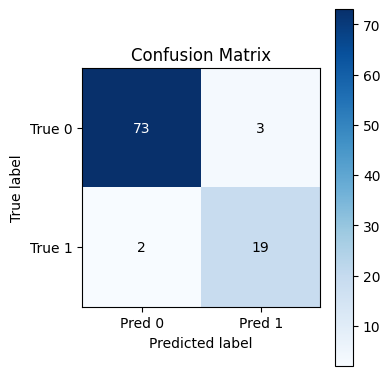

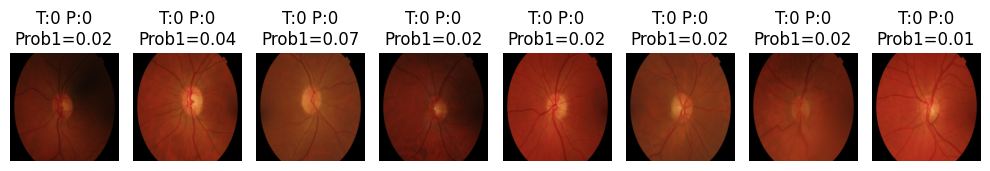

In [371]:
labels_mm, preds_mm, probs_mm = get_predictions(test_loader, best_model_mm)

cm_mm = confusion_matrix(labels_mm, preds_mm)
print("Confusion matrix (INGEN-eyx FusionNet):")
print(cm_mm)

print("\nClassification report (INGEN-eyx FusionNet):")
print(classification_report(labels_mm, preds_mm,
                            target_names=["Healthy","Glaucoma"],
                            digits=3))

plot_confusion_matrix(cm_mm, "Confusion Matrix")

show_example_images(test_loader, best_model_mm, n_show=8)


Confusion matrix (INGEN-eyx JointStreamNet):
[[72  4]
 [ 0 21]]

Classification report (INGEN-eyx JointStreamNet):
              precision    recall  f1-score   support

     Healthy      1.000     0.947     0.973        76
    Glaucoma      0.840     1.000     0.913        21

    accuracy                          0.959        97
   macro avg      0.920     0.974     0.943        97
weighted avg      0.965     0.959     0.960        97



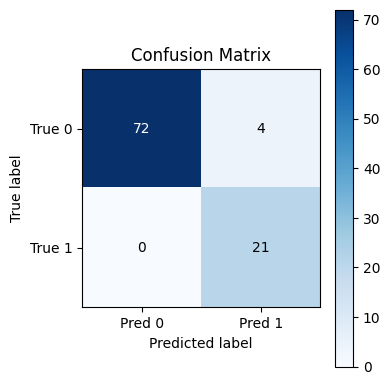

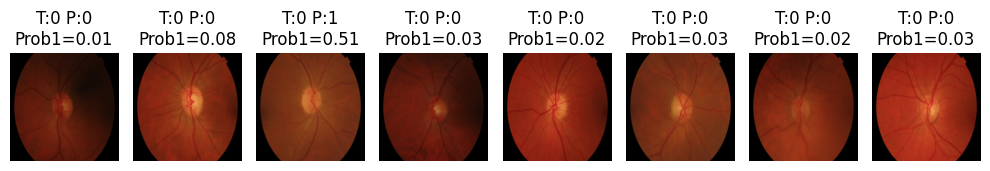

In [343]:
labels_joint, preds_joint, probs_joint = get_predictions(test_loader, best_model_joint)

cm_joint = confusion_matrix(labels_joint, preds_joint)
print("Confusion matrix (INGEN-eyx JointStreamNet):")
print(cm_joint)

print("\nClassification report (INGEN-eyx JointStreamNet):")
print(classification_report(labels_joint, preds_joint,
                            target_names=["Healthy","Glaucoma"],
                            digits=3))

plot_confusion_matrix(cm_joint, "Confusion Matrix")

show_example_images(test_loader, best_model_joint, n_show=8)


Compare 

In [364]:
print("\n==== SIDE-BY-SIDE COMPARISON ON TEST SET ====")
print(f"Model 1 (INGEN-eyx FusionNet): "
      f"loss={test_loss_mm:.4f}, AUC={test_auc_mm:.3f}, ACC={test_acc_mm:.3f}")
print(f"Model 2 (INGEN-eyx JointStreamNet)   "
      f"loss={test_loss_joint:.4f}, AUC={test_auc_joint:.3f}, ACC={test_acc_joint:.3f}")

if test_auc_mm > test_auc_joint:
    print("\nBased on AUC, Model 1  performs better.")
elif test_auc_mm < test_auc_joint:
    print("\nBased on AUC, Model 2 performs better.")
else:
    print("\nBoth models have the same AUC on the test set.")



==== SIDE-BY-SIDE COMPARISON ON TEST SET ====
Model 1 (INGEN-eyx FusionNet): loss=0.2365, AUC=0.986, ACC=0.948
Model 2 (INGEN-eyx JointStreamNet)   loss=0.2119, AUC=0.993, ACC=0.959

Based on AUC, Model 2 performs better.


In [365]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# helper: find examples of each type
def collect_examples(model, test_loader, max_per_type=3):
    """
    Returns dict with keys 'TN','TP','FP','FN'.
    Each entry is list of (img_tensor, true_label, pred_label, prob1).
    """
    model.eval()
    categories = {"TN": [], "TP": [], "FP": [], "FN": []}

    with torch.no_grad():
        for imgs, clin, y in test_loader:
            imgs = imgs.to(device)
            clin = clin.to(device)
            y    = y.to(device)

            logits = model(imgs, clin)
            probs1 = F.softmax(logits, dim=1)[:, 1]   # P(glaucoma)
            preds  = (probs1 >= 0.5).long()

            for i in range(len(y)):
                t = int(y[i].item())
                p = int(preds[i].item())
                p1 = float(probs1[i].item())
                img_cpu = imgs[i].cpu()

                if   t == 0 and p == 0: key = "TN"
                elif t == 0 and p == 1: key = "FP"
                elif t == 1 and p == 1: key = "TP"
                else:                   key = "FN"

                if len(categories[key]) < max_per_type:
                    categories[key].append((img_cpu, t, p, p1))

            # stop early if we already have enough of each type
            if all(len(categories[k]) >= max_per_type for k in categories):
                break

    return categories

# helper: de-normalize
def denorm(img_tensor):
    img = img_tensor.clone()
    img = img.permute(1, 2, 0)  # C,H,W -> H,W,C
    img = img * torch.tensor(IMG_STD) + torch.tensor(IMG_MEAN)
    img = img.clamp(0, 1).numpy()
    return img

def plot_2x6_grid(categories, title_prefix="Model"):
    """
    Row 1: 3 TN + 3 TP
    Row 2: 3 FP + 3 FN
    """
    fig, axes = plt.subplots(2, 6, figsize=(12, 4))

    # Row 1: TN (0–2), TP (3–5)
    for i in range(3):
        ax = axes[0, i]
        if i < len(categories["TN"]):
            img, t, p, p1 = categories["TN"][i]
            ax.imshow(denorm(img))
            ax.set_title(f"T:0 P:0\nProb1={p1:.2f}", fontsize=8)
        ax.axis("off")

    for i in range(3):
        ax = axes[0, 3 + i]
        if i < len(categories["TP"]):
            img, t, p, p1 = categories["TP"][i]
            ax.imshow(denorm(img))
            ax.set_title(f"T:1 P:1\nProb1={p1:.2f}", fontsize=8)
        ax.axis("off")

    # Row 2: FP (0–2), FN (3–5)
    for i in range(3):
        ax = axes[1, i]
        if i < len(categories["FP"]):
            img, t, p, p1 = categories["FP"][i]
            ax.imshow(denorm(img))
            ax.set_title(f"T:0 P:1\nProb1={p1:.2f}", fontsize=8)
        ax.axis("off")

    for i in range(3):
        ax = axes[1, 3 + i]
        if i < len(categories["FN"]):
            img, t, p, p1 = categories["FN"][i]
            ax.imshow(denorm(img))
            ax.set_title(f"T:1 P:0\nProb1={p1:.2f}", fontsize=8)
        ax.axis("off")

    plt.suptitle(f"{title_prefix}", fontsize=12)
    plt.tight_layout()
    plt.show()


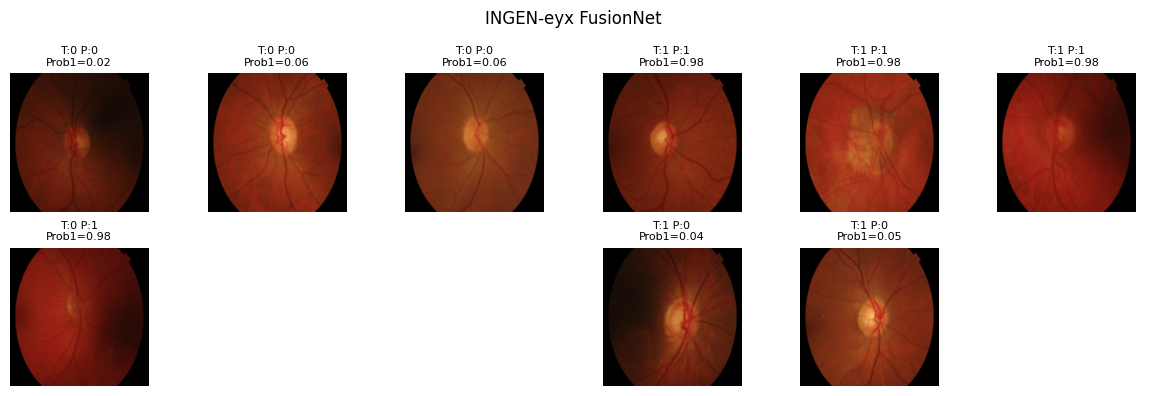

In [346]:
best_model_mm = MultiModalNet(CLIN_DIM, n_classes=2, freeze_backbone=True).to(device)
best_model_mm.load_state_dict(torch.load("datasets/multimodal_twoenc_best.pt", map_location=device))

cats_mm = collect_examples(best_model_mm, test_loader, max_per_type=3)
plot_2x6_grid(cats_mm, title_prefix="INGEN-eyx FusionNet")


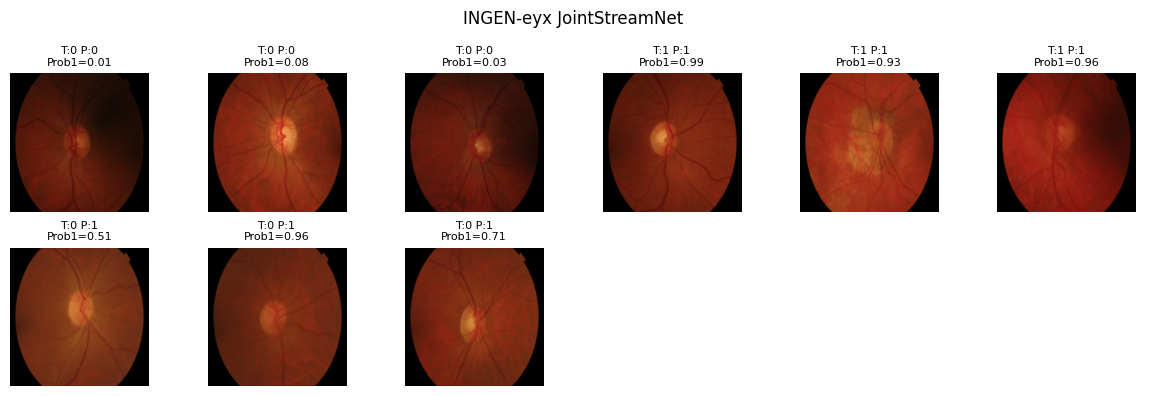

In [366]:
best_model_joint = JointConvNet(CLIN_DIM, n_classes=2).to(device)
best_model_joint.load_state_dict(torch.load("datasets/multimodal_jointenc_best.pt", map_location=device))

cats_joint = collect_examples(best_model_joint, test_loader, max_per_type=3)
plot_2x6_grid(cats_joint, title_prefix="INGEN-eyx JointStreamNet")


In [348]:
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
)


In [367]:
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
)

def evaluate_full_metrics(model, loader, threshold=0.5, desc="MODEL"):
    """
    Computes:
      - AUC
      - ACC (accuracy)
      - F1-Score (for glaucoma class = 1)
      - Precision (for glaucoma class = 1)
      - Recall (TPR / Sensitivity for glaucoma)
      - FPR (for glaucoma)
    """
    model.eval()
    all_probs = []
    all_labels = []

    with torch.no_grad():
        for imgs, clin, y in loader:
            imgs = imgs.to(device, non_blocking=True)
            clin = clin.to(device, non_blocking=True)
            y    = y.to(device, non_blocking=True)

            logits = model(imgs, clin)
            probs  = F.softmax(logits, dim=1)[:, 1].detach().cpu().numpy()
            labels = y.detach().cpu().numpy()

            all_probs.append(probs)
            all_labels.append(labels)

    all_probs  = np.concatenate(all_probs)
    all_labels = np.concatenate(all_labels)

    # AUC
    auc_val = roc_auc_score(all_labels, all_probs)

    # Hard predictions with threshold
    preds = (all_probs >= threshold).astype(int)

    # Core metrics
    acc    = accuracy_score(all_labels, preds)
    f1     = f1_score(all_labels, preds, pos_label=1)
    prec   = precision_score(all_labels, preds, pos_label=1, zero_division=0)
    recall = recall_score(all_labels, preds, pos_label=1)  # TPR / sensitivity

    # FPR from confusion matrix
    cm = confusion_matrix(all_labels, preds, labels=[0, 1])
    tn, fp, fn, tp = cm.ravel()
    fpr = fp / (fp + tn + 1e-8)

    print(f"\n=== {desc} METRICS (threshold={threshold}) ===")
    print(f"AUC        : {auc_val:.4f}")
    print(f"ACC        : {acc:.4f}")
    print(f"F1-Score   : {f1:.4f}")
    print(f"Precision  : {prec:.4f}")
    print(f"Recall (TPR): {recall:.4f}")
    print(f"FPR        : {fpr:.4f}")
    print("Confusion matrix [ [TN FP], [FN TP] ]:")
    print(cm)

    return {
        "AUC": auc_val,
        "ACC": acc,
        "F1": f1,
        "Precision": prec,
        "Recall": recall,
        "TPR": recall,   
        "FPR": fpr,
        "CM": cm,
    }


In [368]:
metrics_mm = evaluate_full_metrics(best_model_mm, test_loader, threshold=0.5,
                                   desc="MODEL 1 – INGEN-eyeX FusionNet")



=== MODEL 1 – INGEN-eyeX FusionNet METRICS (threshold=0.5) ===
AUC        : 0.9862
ACC        : 0.9485
F1-Score   : 0.8837
Precision  : 0.8636
Recall (TPR): 0.9048
FPR        : 0.0395
Confusion matrix [ [TN FP], [FN TP] ]:
[[73  3]
 [ 2 19]]


In [351]:
metrics_joint = evaluate_full_metrics(best_model_joint, test_loader, threshold=0.5,
                                      desc="MODEL 2 – INGEN-eyeX JointStreamNet")



=== MODEL 2 – INGEN-eyeX JointStreamNet METRICS (threshold=0.5) ===
AUC        : 0.9981
ACC        : 0.9588
F1-Score   : 0.9130
Precision  : 0.8400
Recall (TPR): 1.0000
FPR        : 0.0526
Confusion matrix [ [TN FP], [FN TP] ]:
[[72  4]
 [ 0 21]]


In [369]:
compare_df = pd.DataFrame([
    {
        "Model": "INGEN-eyeX FusionNet",
        "AUC": metrics_mm["AUC"],
        "ACC": metrics_mm["ACC"],
        "F1-Score": metrics_mm["F1"],
        "Recall": metrics_mm["Recall"],
        "Precision": metrics_mm["Precision"],
        "TPR": metrics_mm["TPR"],
        "FPR": metrics_mm["FPR"],
    },
    {
        "Model": "INGEN-eyeX JointStreamNet",
        "AUC": metrics_joint["AUC"],
        "ACC": metrics_joint["ACC"],
        "F1-Score": metrics_joint["F1"],
        "Recall": metrics_joint["Recall"],
        "Precision": metrics_joint["Precision"],
        "TPR": metrics_joint["TPR"],
        "FPR": metrics_joint["FPR"],
    },
])

print(compare_df)


                       Model       AUC       ACC  F1-Score    Recall  \
0       INGEN-eyeX FusionNet  0.986216  0.948454  0.883721  0.904762   
1  INGEN-eyeX JointStreamNet  0.998120  0.958763  0.913043  1.000000   

   Precision       TPR       FPR  
0   0.863636  0.904762  0.039474  
1   0.840000  1.000000  0.052632  


In [370]:
def latex_row(model_name, m):
    return (
        f"{model_name} & "
        f"{m['AUC']:.3f} & "
        f"{m['ACC']:.3f} & "
        f"{m['F1']:.3f} & "
        f"{m['Precision']:.3f} & "
        f"{m['Recall']:.3f} & "
        f"{m['TPR']:.3f} & "
        f"{m['FPR']:.3f} \\\\"
    )

print(latex_row("INGEN-eyx FusionNet",    metrics_mm))
print(latex_row("INGEN-eyx JointStreamNet", metrics_joint))


INGEN-eyx FusionNet & 0.986 & 0.948 & 0.884 & 0.864 & 0.905 & 0.905 & 0.039 \\
INGEN-eyx JointStreamNet & 0.998 & 0.959 & 0.913 & 0.840 & 1.000 & 1.000 & 0.053 \\


In [360]:

# ============================================================
# 5b. TRAIN / VAL LOOP FOR MODEL 2 (JointConvNet)
# ============================================================
# ============================================================
# 5b. TRAIN / VAL LOOP FOR MODEL 2 (JointConvNet)
# ============================================================
history_joint = {
    "train_loss": [],
    "val_loss":   [],
    "train_auc":  [],
    "val_auc":    [],
    "train_acc":  [],
    "val_acc":    [],
    "train_f1":   [],
    "val_f1":     [],
    "train_prec": [],
    "val_prec":   [],
    "train_tpr":  [],
    "val_tpr":    [],
    "train_fpr":  [],
    "val_fpr":    [],
}
best_val_loss_joint = float("inf")
best_val_auc_joint  = 0.0
best_epoch_joint    = 0
best_path_joint = os.path.join(DATA_DIR, "multimodal_jointenc_best_.pt")  # <== NEW NAME

for epoch in range(1, EPOCHS+1):
    (train_loss, train_auc, train_acc,
     train_f1, train_prec, train_recall, train_tpr, train_fpr) = run_epoch(
        train_loader, model_joint, optimizer_joint
    )

    (val_loss, val_auc, val_acc,
     val_f1, val_prec, val_recall, val_tpr, val_fpr) = run_epoch(
        val_loader, model_joint, optimizer=None
    )

    history_joint["train_loss"].append(train_loss)
    history_joint["val_loss"].append(val_loss)
    history_joint["train_auc"].append(train_auc)
    history_joint["val_auc"].append(val_auc)
    history_joint["train_acc"].append(train_acc)
    history_joint["val_acc"].append(val_acc)

    history_joint["train_f1"].append(train_f1)
    history_joint["val_f1"].append(val_f1)
    history_joint["train_prec"].append(train_prec)
    history_joint["val_prec"].append(val_prec)
    history_joint["train_tpr"].append(train_tpr)
    history_joint["val_tpr"].append(val_tpr)
    history_joint["train_fpr"].append(train_fpr)
    history_joint["val_fpr"].append(val_fpr)


    print(f"[JOINT] Epoch {epoch:03d} | "
          f"train loss {train_loss:.4f} auc {train_auc:.3f} acc {train_acc:.3f} | "
          f"val loss {val_loss:.4f} auc {val_auc:.3f} acc {val_acc:.3f}")

    if val_loss < best_val_loss_joint - 1e-4:
        best_val_loss_joint = val_loss
        best_val_auc_joint  = val_auc
        best_epoch_joint    = epoch
        torch.save(model_joint.state_dict(), best_path_joint)
        print(f"  -> [JOINT] new best model saved (val loss={best_val_loss_joint:.4f}, "
              f"val AUC={best_val_auc_joint:.3f}, epoch={best_epoch_joint})")

print("\n=== MODEL 2 (JointConvNet, one encoder) BEST EPOCH ===")
print(f"Epoch: {best_epoch_joint}")
print(f"Best val loss: {best_val_loss_joint:.4f}")
print(f"Best val AUC:  {best_val_auc_joint:.3f}")

# ---- TEST EVAL FOR MODEL 2 ----
best_model_joint = JointConvNet(CLIN_DIM, n_classes=2).to(device)
best_model_joint.load_state_dict(torch.load(best_path_joint, map_location=device))

test_loss_joint, test_auc_joint, test_acc_joint, test_precision_pos_joint, test_recall_pos_joint, test_f1_pos_joint, test_tpr_joint, test_fpr_joint = run_epoch(test_loader, best_model_joint, optimizer=None)
print("\n=== MODEL 2 TEST RESULTS ===")
print(f"[JOINT] Test loss {test_loss_joint:.4f} | AUC {test_auc_joint:.3f} | ACC {test_acc_joint:.3f}")


[JOINT] Epoch 001 | train loss 0.1348 auc 1.000 acc 0.996 | val loss 0.2421 auc 0.986 acc 0.954
  -> [JOINT] new best model saved (val loss=0.2421, val AUC=0.986, epoch=1)
[JOINT] Epoch 002 | train loss 0.1335 auc 1.000 acc 0.997 | val loss 0.2671 auc 0.985 acc 0.944
[JOINT] Epoch 003 | train loss 0.1377 auc 1.000 acc 0.991 | val loss 0.2864 auc 0.980 acc 0.944
[JOINT] Epoch 004 | train loss 0.1344 auc 1.000 acc 0.996 | val loss 0.2522 auc 0.974 acc 0.949
[JOINT] Epoch 005 | train loss 0.1476 auc 0.998 acc 0.990 | val loss 0.2810 auc 0.961 acc 0.938
[JOINT] Epoch 006 | train loss 0.1352 auc 1.000 acc 0.996 | val loss 0.3268 auc 0.963 acc 0.933
[JOINT] Epoch 007 | train loss 0.1395 auc 0.999 acc 0.991 | val loss 0.3010 auc 0.968 acc 0.933
[JOINT] Epoch 008 | train loss 0.1298 auc 1.000 acc 0.998 | val loss 0.2952 auc 0.976 acc 0.938
[JOINT] Epoch 009 | train loss 0.1313 auc 1.000 acc 0.998 | val loss 0.2872 auc 0.973 acc 0.933
[JOINT] Epoch 010 | train loss 0.1482 auc 0.999 acc 0.987 | 

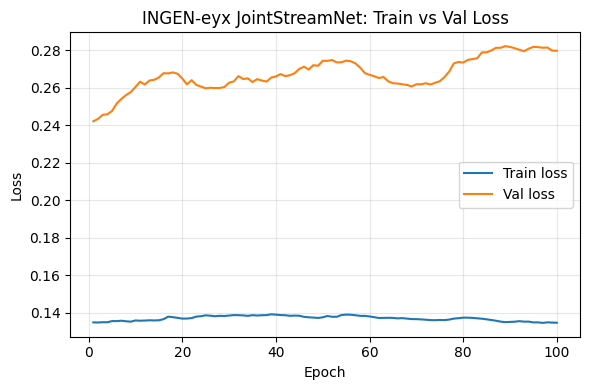

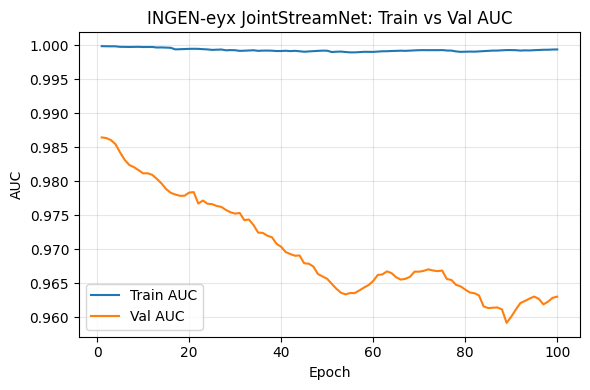

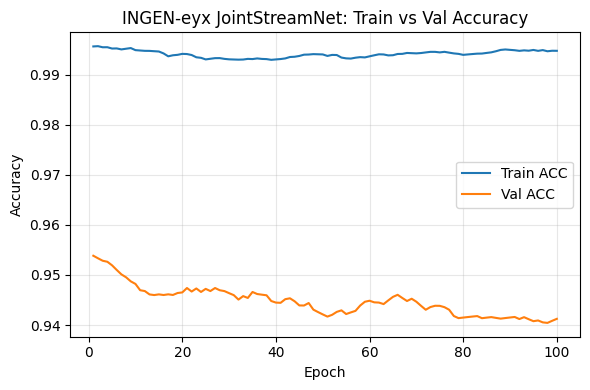

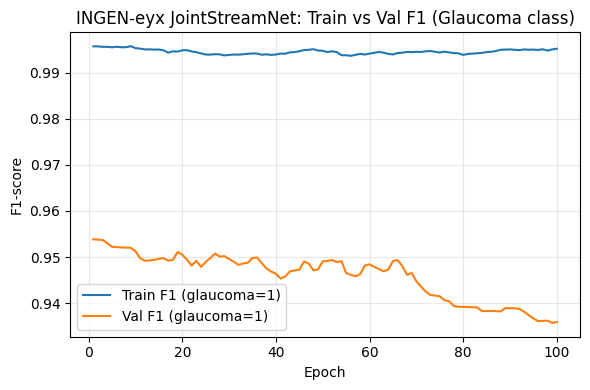

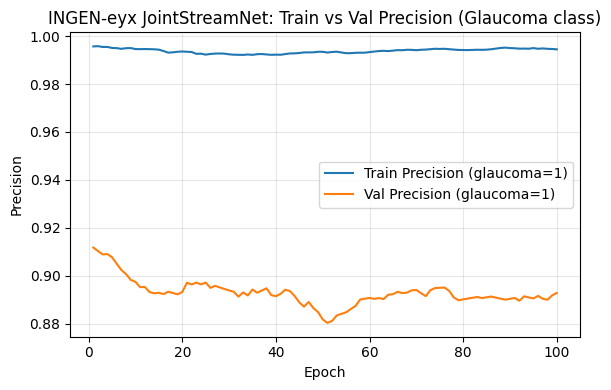

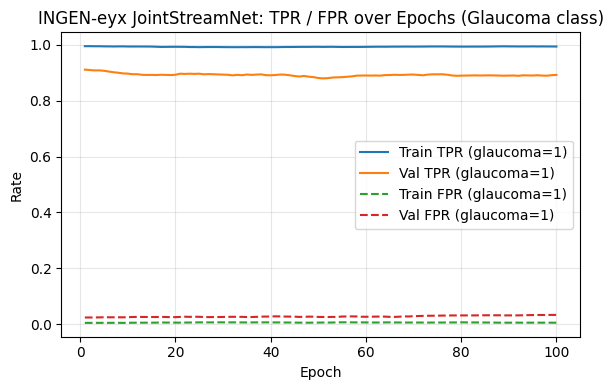

In [361]:

plot_history(history_joint, save_prefix="joint", model_name="INGEN-eyx JointStreamNet")


Confusion matrix (INGEN-eyx JointStreamNet):
[[72  4]
 [ 0 21]]

Classification report (INGEN-eyx JointStreamNet):
              precision    recall  f1-score   support

     Healthy      1.000     0.947     0.973        76
    Glaucoma      0.840     1.000     0.913        21

    accuracy                          0.959        97
   macro avg      0.920     0.974     0.943        97
weighted avg      0.965     0.959     0.960        97



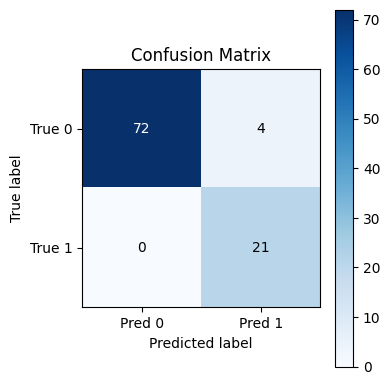

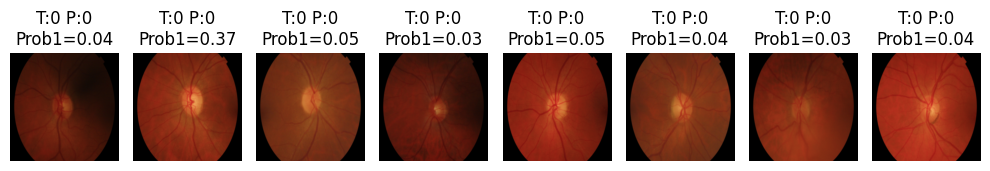

In [362]:
labels_joint, preds_joint, probs_joint = get_predictions(test_loader, best_model_joint)

cm_joint = confusion_matrix(labels_joint, preds_joint)
print("Confusion matrix (INGEN-eyx JointStreamNet):")
print(cm_joint)

print("\nClassification report (INGEN-eyx JointStreamNet):")
print(classification_report(labels_joint, preds_joint,
                            target_names=["Healthy","Glaucoma"],
                            digits=3))

plot_confusion_matrix(cm_joint, "Confusion Matrix")

show_example_images(test_loader, best_model_joint, n_show=8)


FusionNet   - loss 0.2365, AUC 0.986, ACC 0.948
JointStream - loss 0.2119, AUC 0.993, ACC 0.959


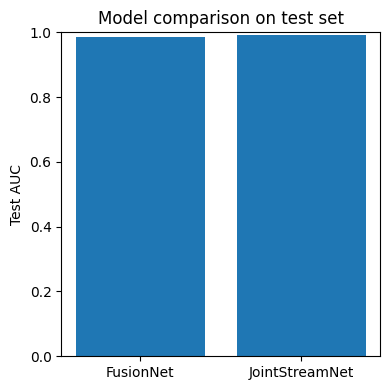

In [372]:

best_model_mm    = MultiModalNet(CLIN_DIM, n_classes=2, freeze_backbone=True).to(device)
best_model_joint = JointConvNet(CLIN_DIM, n_classes=2).to(device)

best_model_mm.load_state_dict(torch.load(best_path_mm, map_location=device))
best_model_joint.load_state_dict(torch.load(best_path_joint, map_location=device))

best_model_mm.eval()
best_model_joint.eval()

def eval_model(model, loader):
    all_labels = []
    all_probs  = []
    running_loss = 0.0

    with torch.no_grad():
        for imgs, clin, y in loader:
            imgs = imgs.to(device)
            clin = clin.to(device)
            y    = y.to(device)

            logits = model(imgs, clin)
            loss   = criterion(logits, y)

            running_loss += loss.item() * imgs.size(0)

            probs  = F.softmax(logits, dim=1)[:, 1].cpu().numpy()
            labels = y.cpu().numpy()
            all_probs.append(probs)
            all_labels.append(labels)

    all_probs  = np.concatenate(all_probs)
    all_labels = np.concatenate(all_labels)

    loss = running_loss / len(loader.dataset)
    auc  = roc_auc_score(all_labels, all_probs)
    preds = (all_probs >= 0.5).astype(int)
    acc  = accuracy_score(all_labels, preds)

    return loss, auc, acc

test_loss_mm,    test_auc_mm,    test_acc_mm    = eval_model(best_model_mm,    test_loader)
test_loss_joint, test_auc_joint, test_acc_joint = eval_model(best_model_joint, test_loader)

print("FusionNet   - loss {:.4f}, AUC {:.3f}, ACC {:.3f}"
      .format(test_loss_mm, test_auc_mm, test_acc_mm))
print("JointStream - loss {:.4f}, AUC {:.3f}, ACC {:.3f}"
      .format(test_loss_joint, test_auc_joint, test_acc_joint))

# simple bar plot comparison of AUC (or acc)
labels = ["FusionNet", "JointStreamNet"]
aucs   = [test_auc_mm, test_auc_joint]

plt.figure(figsize=(4,4))
plt.bar(labels, aucs)
plt.ylabel("Test AUC")
plt.title("Model comparison on test set")
plt.ylim(0.0, 1.0)
plt.tight_layout()
plt.savefig("plots/test_auc_compare_models.png", dpi=150)
plt.show()
